In [1]:
import pandas as pd
import numpy as np
from mystats import statistics
import math
import importlib
import constant as c
importlib.reload(c)
import similaritymeasures as sm
import constant
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
from scipy import stats
from mystats import statistics
import statsmodels.api as statsmodels
from statsmodels.formula.api import ols
from tqdm.notebook import tqdm
import statsmodels as ssm
import statsmodels.stats as ssms
import statsmodels.api as ssma
import statsmodels.formula.api as ssmf
import matplotlib.pyplot as plt
import matplotlib as mplt
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from scipy.interpolate import  make_interp_spline, BSpline, interp1d
import pingouin as pg
pd.set_option('display.precision', 3)

# df_models = pd.read_pickle('../results/model.pkl')
# df_models['height'] = df_models['height'].astype(int)
# df_models['length'] = df_models['length'].astype(int)
# df_models['width'] = df_models['width'].astype(int)
# df_models['horizontal_resolution'] = df_models['horizontal_resolution'].astype(int)
# Shoelace formula
def area(p):
    return np.abs(np.cross(p, np.roll(p, 1, axis=0)).sum()) / 2

def totalLength(points):
    distances = np.linalg.norm(points[1:] - points[:-1], axis=1)
    # Sum up the distances to get the total length
    return distances.sum()




df_logs = pd.read_pickle('../results/log.pkl')
df_logs['height'] = df_logs['height'].astype(int)
df_logs['length'] = df_logs['length'].astype(int)
df_logs['speed'] = df_logs['speed'].astype(int)
df_logs['strip'] = df_logs['strip'].astype(int)
df_logs['target_deltatime'] = df_logs['target_deltatime'].astype(int)
df_logs['deltatime_with_pitch'] = df_logs['deltatime_with_pitch'].astype(int)
df_logs['deltatime_without_pitch'] = df_logs['deltatime_without_pitch'].astype(int)
df_logs['error_with_pitch'] = df_logs['error_with_pitch'].astype(int)
df_logs['error_without_pitch'] = df_logs['error_without_pitch'].astype(int)

df_curves = pd.read_pickle('../results/trials.pkl')
df_curves['height'] = df_curves['height'].astype(int)
df_curves['length'] = df_curves['length'].astype(int)
df_curves['speed'] = df_curves['speed'].astype(int)
df_curves['strip'] = df_curves['strip'].astype(int)
df_curves['group'] = df_curves['group'].astype(int)
df_curves['result'] = df_curves['result'].astype(str)
df_curves['orientation'] = df_curves['orientation'].astype(int)

df_curves['est_xy_curve'] = df_curves['est_xy_curve'].to_numpy()
df_curves['est_x_curve'] = df_curves['est_x_curve'].to_numpy()
df_curves['est_y_curve'] = df_curves['est_y_curve'].to_numpy()
df_curves['est_x_width'] = df_curves['est_x_width'].astype(float)
df_curves['est_y_width'] = df_curves['est_y_width'].astype(float)
df_curves['width'] = df_curves['est_x_width'].astype(int)
df_curves['est_magnitude'] =  df_curves.apply(lambda row: totalLength(row['est_xy_curve']), axis=1)

df_curves['obs_xy_curve'] = df_curves['obs_xy_curve'].to_numpy()
df_curves['obs_x_curve'] = df_curves['obs_x_curve'].to_numpy()
df_curves['obs_y_curve'] = df_curves['obs_y_curve'].to_numpy()
df_curves['obs_x_width'] = df_curves['obs_x_width'].astype(float)
df_curves['obs_y_width'] = df_curves['obs_y_width'].astype(float)
df_curves['obs_magnitude'] = df_curves.apply(lambda row: totalLength(row['obs_xy_curve']), axis=1)


df_curves['obs_xy_scurve'] = df_curves['obs_xy_scurve'].to_numpy()
df_curves['obs_x_scurve'] = df_curves['obs_x_scurve'].to_numpy()
df_curves['obs_y_scurve'] = df_curves['obs_y_scurve'].to_numpy()
df_curves['obs_x_swidth'] = df_curves['obs_x_swidth'].astype(float)
df_curves['obs_y_swidth'] = df_curves['obs_y_swidth'].astype(float)
df_curves['obs_smagnitude'] =  df_curves.apply(lambda row: totalLength(row['obs_xy_scurve']), axis=1)

df_curves['obs_xy_ccurve'] = df_curves['obs_xy_ccurve'].to_numpy()
df_curves['obs_x_ccurve'] = df_curves['obs_x_ccurve'].to_numpy()
df_curves['obs_y_ccurve'] = df_curves['obs_y_ccurve'].to_numpy()
df_curves['obs_x_cwidth'] = df_curves['obs_x_cwidth'].astype(float)
df_curves['obs_y_cwidth'] = df_curves['obs_y_cwidth'].astype(float)
df_curves['obs_cmagnitude'] =  df_curves.apply(lambda row: totalLength(row['obs_xy_ccurve']), axis=1)


df_curves['xy_curve_error'] = df_curves['xy_curve_error'].astype(float)
df_curves['x_width_error'] = np.abs(df_curves['x_width_error'].astype(float))
df_curves['y_width_error'] = np.abs(df_curves['y_width_error'].astype(float))
df_curves['xy_width_error'] = np.abs(df_curves['xy_width_error'].astype(float))
df_curves['est_pitch'] = df_curves['est_pitch'].astype(float)
df_curves['est_horizontal_resolution'] = df_curves['est_horizontal_resolution'].astype(int)
df_curves['obs_pitch'] = df_curves['obs_pitch'].astype(float)
df_curves['pitch_error'] = df_curves['pitch_error'].astype(float)
df_curves['pitch_error_rate'] = df_curves['pitch_error_rate'].astype(float)
df_curves['x_width_accuracy'] = df_curves['obs_x_width']/df_curves['est_x_width']
df_curves['x_width_error_rate'] = df_curves['x_width_error']/df_curves['est_x_width']
df_curves['x_width_success_rate'] = 1.0 - df_curves['x_width_error_rate']
df_curves['y_width_error_rate'] = df_curves['y_width_error']/df_curves['est_y_width']
df_curves['y_width_success_rate'] = 1.0 - df_curves['y_width_error_rate']
# NB_GROUP = len(c.speed_factors) * len(c.strip_factors)
# display(df_curves.loc[np.isnan(df_curves['x_width_error']), :])

c:\Python38\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.1, the latest is 0.5.4.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
c:\Python38\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


# STATISTICS AND PLOTTING FUNCTION

In [2]:
import scipy
from matplotlib.patches import Rectangle

# all_factors_columns = ['speed',  'width', 'height', 'length']
# df = df_fidelities
# factor_column = "width"
# variable_column = "area"
# fmt = ".1%"
# vmin = 0.0
# vmax = 1.0
# cmap = "rocket"
# suptitle = "Display Shape Fidelity"
# suptitle_size = 24
# title = "Aggregate mean of the percentage of area matching\nbetween the observed curve and the expected one"
# title_size = 20

def heatmapRendering(df, ax, width_column, values_column_name, fmt, vmin, vmax, cmap, main_plot, fontcolor, kwargs):
    xy_labels_size = 18
    x_tickslabels_size = 14
    y_tickslabels_size = 14
    annotationlabels_size = 14
    # norm = matplotlib.colors.Normalize(-1,1)
    # colors = [[norm(-1.0), "white"],
    #         [norm(1.0), "black"]]
    # cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

    pivoted_curves = df.pivot_table( index=width_column,  columns="speed", values=values_column_name)
    #print(df_curves['est_x_width'].unique())
    pivoted_curves.sort_index(axis=0, ascending=False, inplace=True)
    # g = None
    # if '%' in fmt:
    #     g = sns.heatmap(ax=ax, data=pivoted_curves, cmap=cmap, vmin=vmin, vmax=vmax, annot=True, fmt=fmt, cbar_kws={'format': "%.3f%%"})
    # else:
    g = sns.heatmap(
        ax=ax, 
        data=pivoted_curves, 
        cmap=cmap, 
        vmin=vmin, 
        vmax=vmax,
        annot=True,
        annot_kws={"fontsize":annotationlabels_size},
        fmt=fmt,
        **kwargs
        )
    
    # for t in g.texts: 
    #     t.set_text("%d%%" %(int(float(t.get_text())*100)))
    for t in g.texts: 
        t.set_text("%d%%" %(int(float(t.get_text())*100)))

    # g.add_patch(Rectangle((3, 4), 1, 1, fill=False, edgecolor='blue', lw=3))
    # Get x-axis tick locations and labels
    ytick_labels = g.get_yticklabels()
    for i in range(len(ytick_labels)):
        rounded_est_x_width = int(float(ytick_labels[i].get_text()))
        df_closest = df.iloc[(df[width_column]-rounded_est_x_width).abs().argsort()[:1]]
        closest_height = df_closest['height'].values[0]
        closest_height_factor = c.height_factors[np.absolute(c.height_values-closest_height).argmin()]
        closest_length = df_closest['length'].values[0]
        closest_length_factor = c.length_factors[np.absolute(c.length_values-closest_length).argmin()]

        #ytick_labels[i].set_text("%d (%dmm, %dmm) (%dH, %dL)" %(rounded_est_x_width, closest_height, closest_length, closest_height_factor, closest_length_factor))
        #ytick_labels[i].set_text(f'$Width_{{troposkein}} = {rounded_est_x_width} mm$\n$Height_{{pole}}$ = {closest_height} mm | $Length_{{strip}}$ = {closest_length} mm' )
        if main_plot:
            ytick_labels[i].set_text(f'{rounded_est_x_width} mm\n({closest_height} mm, {closest_length} mm)' )
        else:
            ytick_labels[i].set_text(f'{rounded_est_x_width} mm' )


    
    g.set_yticklabels(ytick_labels, rotation=0, size=y_tickslabels_size, color=fontcolor)

    xtick_labels = g.get_xticklabels()
    for i in range(len(xtick_labels)):
        rpm_value = int(xtick_labels[i].get_text())
        xtick_labels[i].set_text(f"{rpm_value}\nRPM")
    g.set_xticklabels(xtick_labels, rotation=0, size=x_tickslabels_size, color=fontcolor)

    #if "%" in fmt:
    min_hm_val = vmin if vmin is not None else pivoted_curves.values.min()
    max_hm_val = vmax if vmax is not None else pivoted_curves.values.max()
    cbar = ax.collections[0].colorbar
    cbar_ticks = np.arange(0.0,1.01, 0.05)
    cbar_ticklabels = np.array(['%d%%' %(int(cbar_tick * 100)) for cbar_tick in cbar_ticks])
    filter_ticks = (cbar_ticks >= min_hm_val) & (cbar_ticks <= max_hm_val)
    cbar_ticks = cbar_ticks[filter_ticks] 
    cbar_ticklabels  = cbar_ticklabels[filter_ticks]
    cbar.set_ticks(cbar_ticks)
    cbar.set_ticklabels(cbar_ticklabels, color=fontcolor)


    ax.set_xlabel(f"$speed_{{base}}$", size=xy_labels_size, color=fontcolor)
    ax.set_ylabel(f"$width_{{troposkein}}$ ", size=xy_labels_size, color=fontcolor)
    if main_plot:
        ax.set_ylabel(f"$radius_{{display}}$\n($height_{{pole}}$, $length_{{strip}}$) ", size=xy_labels_size, color=fontcolor)
    else:
        ax.set_ylabel(f"$radius_{{display}}$ ", size=xy_labels_size, color=fontcolor)



def analyze(df, all_factors, factor, variable, suptitle,  title, fmt, vmin, vmax, cmap, facecolor, fontcolor, kwargs):
    suptitle_size = 20 #24
    title_size = 18 #20
    margin_titles_size = 12
    x_tickslabels_size = 10
    y_tickslabels_size = 10
    annotationlabels_size = 10
    # ALL FACTORS PLOTTING
    fg = sns.FacetGrid(df, row='height', col= 'length', despine=False, margin_titles=True)
    g = fg.map_dataframe(sns.lineplot, x="speed", y=variable)
    g.figure.subplots_adjust(wspace=0, hspace=0)
    #fg.fig.set_size_inches(30,20)
    fg.fig.subplots_adjust(top=0.9) # adjust the Figure in rp
    fg.fig.suptitle(suptitle, size=suptitle_size, x=0.5, horizontalalignment='center')
    for margin_title in fg._margin_titles_texts:
        margin_title_str = margin_title.get_text()
        height_value = int(margin_title_str.split("=")[1])
        margin_title.set_text(f'$Height_{{pole}}$ = {height_value} mm')
        margin_title.set_size(margin_titles_size)
    axes = fg.axes
    for iy, ix in np.ndindex(axes.shape):
        ax = axes[iy, ix] 
        ax_lines = ax.get_lines()
        if len(ax_lines):
            ax_lines[0].set_color('black')
        ax_title = ax.get_title()
        ax.set_xlabel(f'$Speed_{{base}}$', size= margin_titles_size)
        xticks = ax.get_xticks()
        ax_new_xtickslabels = [ "%d\nRPM" %ax_new_ytickslabel for ax_new_ytickslabel in  np.arange(150, 331, step=30)]
        ax.set_xticks(np.arange(150, 331, step=30), ax_new_xtickslabels, size=x_tickslabels_size)
        ax.set_xlim((130, 350))
        height_value =  int(fg._margin_titles_texts[iy].get_text().split("=")[1].split("mm")[0])
        length_value = int(axes[0, ix].get_title().split("mm")[0].split("=")[1])
        width_values = df.loc[(df['height'] == height_value) & (df['length'] == length_value), 'width'].unique()
        if len(width_values) > 0:
             width_value = int(width_values[0])
             ax.annotate(f'$Width_{{troposkein}}$ = {width_value} mm', xycoords ="axes fraction", xy=(0.5, 0.1), fontsize=margin_titles_size, horizontalalignment='center', verticalalignment='center')
        if iy == 0:
            ax.set_title(f'$Length_{{strip}}$ = {length_value} mm', size= margin_titles_size)
                #ax.set_title(f'$Height_{{pole}} = {height_value}$ | $Length_{{strip}} = {length_value}$ \n $Width_{{troposkein}} = {width_value}$', size=10)
        if ix == 0: 
            #ax.set_ylabel(f'$Height_{{pole}}$ = {height_value} mm', size= 10)
            ax.set_ylabel(title, size= title_size)
            if '%' in fmt:
                ax_new_ytickslabels = [ "%d%%" %ax_new_ytickslabel for ax_new_ytickslabel in np.arange(0.0, 110, step=20)]
                ax.set_yticks(np.arange(0.0, 1.1, step=0.2), ax_new_ytickslabels, size=y_tickslabels_size)
                ax.set_ylim(0.0,1.1)
    fg.fig.tight_layout(w_pad=1)
    plt.show()
    


    # lm = ssmf.ols(formula=f"{variable} ~ width/speed + (height * length * speed)", data=df).fit()
    # print(lm.summary())
    # table = ssms.anova.anova_lm(lm, typ=1) 
    # display(table.loc[table['PR(>F)'] < 0.05, :])
    # display(table)

    # table = pg.anova(data=df, dv=variable, between=['speed', 'height', 'length'], ss_type=2, detailed=True, effsize='np2')
    # display(table)



    #ssm.genmod.generalized_linear_model.glm(_y, _x, **kwargs).fit().predict(grid)

    corr_method = "pearson"
    fig, axes = plt.subplots(figsize=(30,5), nrows=1, ncols=len(all_factors), sharey=True)
    
    for i in range(len(all_factors)):
        current_factor = all_factors[i]
        corr_coef, corr_pvalue = scipy.stats.pearsonr(df[current_factor], df[variable])
        #sns.lineplot(ax=axes[i], data=df, x=current_factor, y=variable)
        sns.regplot(ax=axes[i], data=df, x=current_factor, y=variable, x_jitter=5)
        
        axes[i].annotate(f'coeff: {corr_coef:.2f}, pvalue: {corr_pvalue:.2f}', xycoords ="axes fraction", xy=(0.1, 0.9), fontsize=10, horizontalalignment='left', verticalalignment='top')
        axes[i].set_xlabel(current_factor)
    for ax in axes:
        ax.yaxis.set_tick_params(which='both', labelbottom=True)

    plt.show()
    fig = plt.figure(figsize=(7,14), facecolor=facecolor)
    #fig.suptitle(suptitle, fontsize=suptitle_size, x=0.5, horizontalalignment='center')
    ax1 = fig.add_subplot()
    heatmapRendering(df, ax1, factor, variable, fmt, vmin, vmax, cmap, True, fontcolor, kwargs)
    ax1.set_title(suptitle, fontsize=suptitle_size, color=fontcolor, x=0.5, horizontalalignment='center')
    plt.show()



    fig = plt.figure(figsize=(30,15), facecolor=facecolor)
    fig.suptitle(suptitle, fontsize=suptitle_size, color=fontcolor, x=0.5, horizontalalignment='center')
    widths = [1, 1]
    heights = [1.0, 0.83, 0.66, 0.5]
    gs = fig.add_gridspec(4,2, width_ratios=widths, height_ratios=heights)
    ax1 = fig.add_subplot(gs[:, 0])
    ax2 = fig.add_subplot(gs[0, 1])
    ax3 = fig.add_subplot(gs[1, 1])
    ax4 = fig.add_subplot(gs[2, 1])
    ax5 = fig.add_subplot(gs[3, 1])
    axes = [ax2, ax3, ax4, ax5]
    heatmapRendering(df, ax1, factor, variable, fmt, vmin, vmax, cmap, True, fontcolor, kwargs)
    ax1.set_title(title, fontsize=title_size, color=fontcolor, x=0.5, horizontalalignment='center')
    i = 0
    df_heights = df.groupby(['height'])
    for df_height_name, df_height_data in df_heights:
        heatmapRendering(df_height_data, axes[i], factor, variable, fmt, vmin, vmax, cmap, False, fontcolor, kwargs)
    # for factor_column in all_factors_columns:
    #     g = sns.regplot(ax=axes[i], data=df_curves, x=factor_column, y="missed_pixel_columns")
    #     g.set(ylim=(0, 1.0))
    #     axes[i].set_xlabel(factor_column)
        i=i+1
    plt.show()


# RAW PLOTTING OF CURVES

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

print(df_curves.length.unique())
curves_mm = df_curves.loc[(df_curves['height'] == 200) & (df_curves['length'] == 756) & (df_curves['speed'] == 150),  'obs_xy_curve'].to_numpy()
for curve_mm in curves_mm:
    g = sns.lineplot(y=curve_mm[:, 0], x=curve_mm[:, 1], color='red')
    g.set(ylim=(0, 500))
    g.set(xlim=(0, 500))
    plt.show()

# PIXEL PITCH ACCURACY

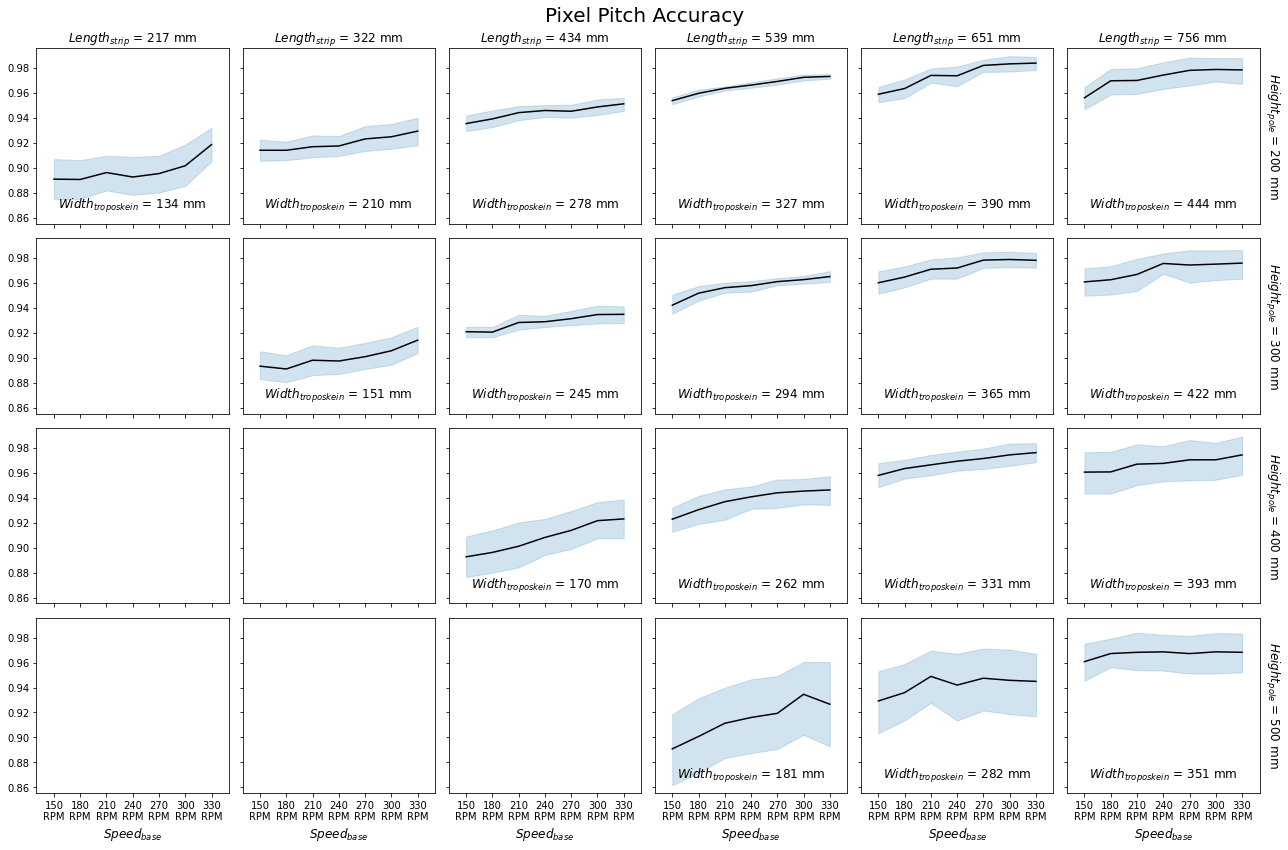

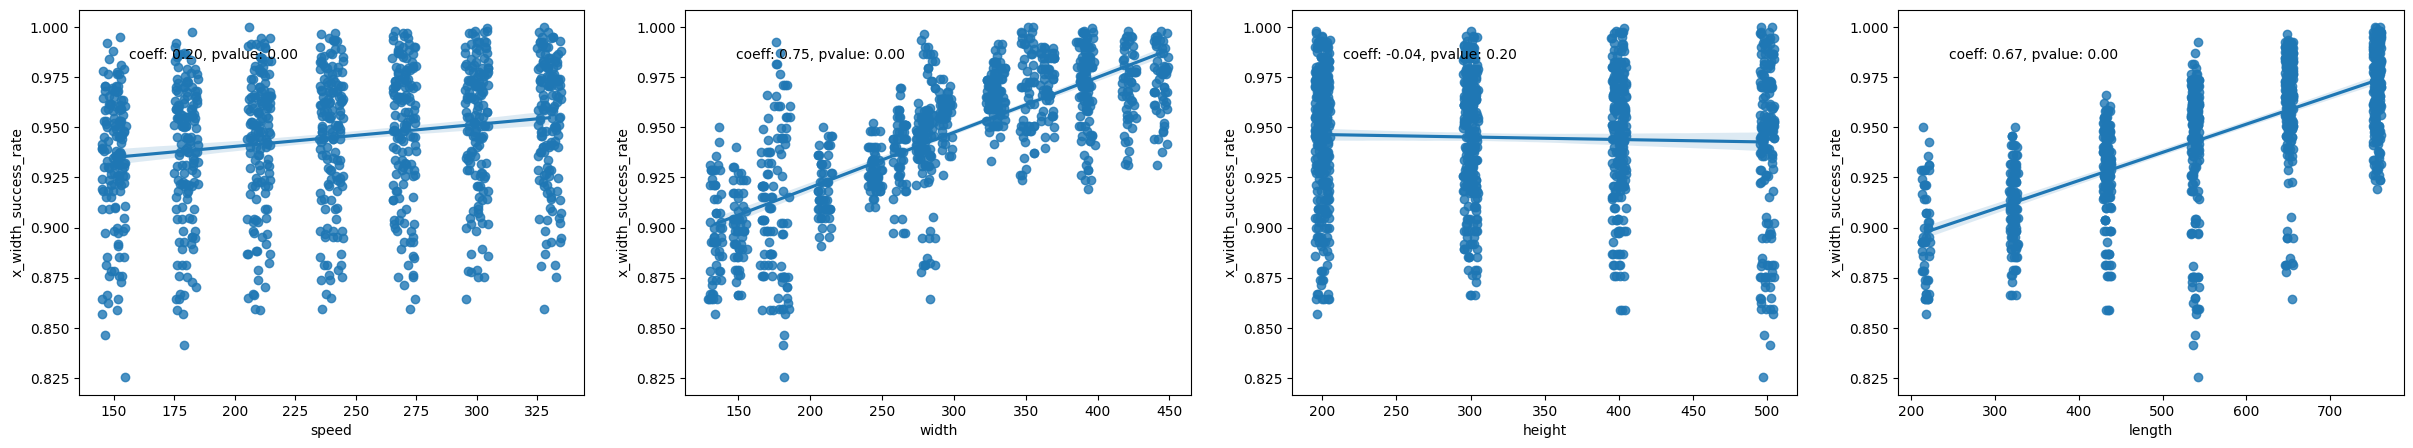

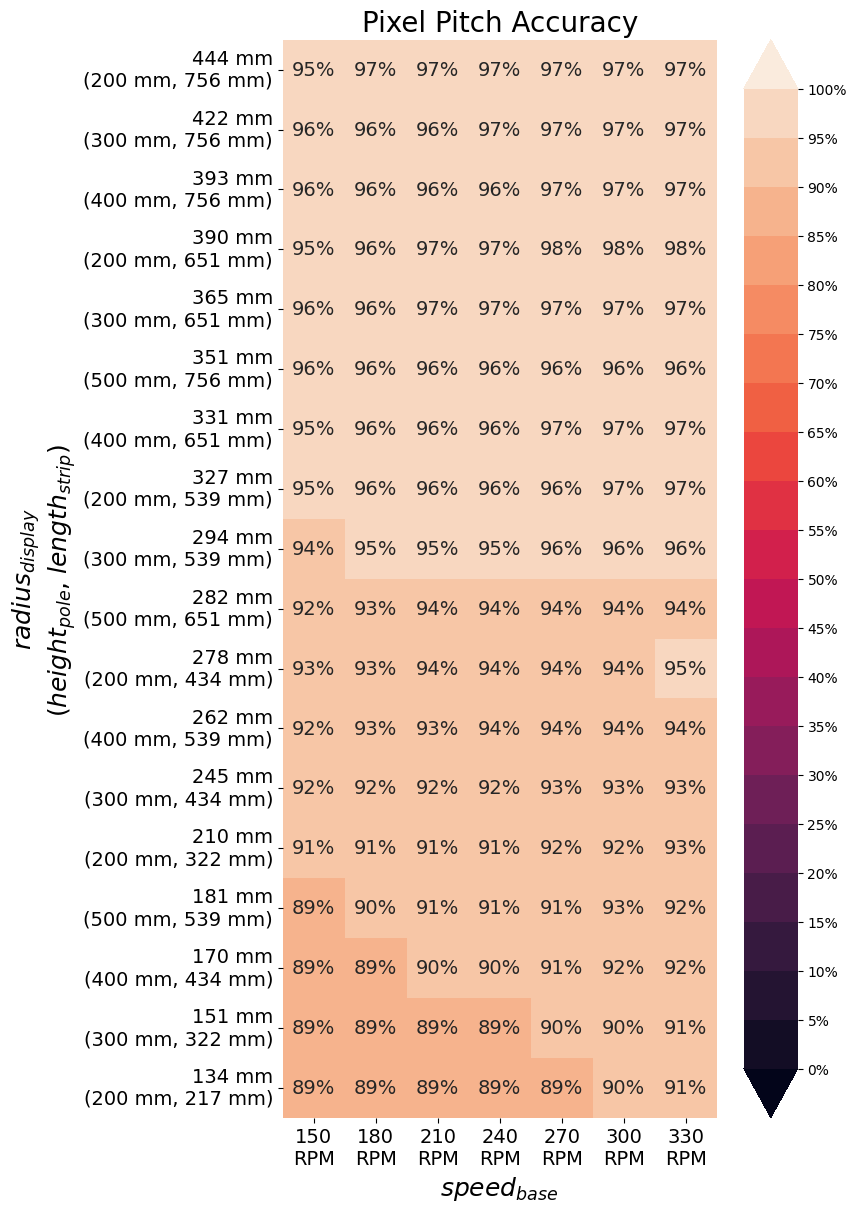

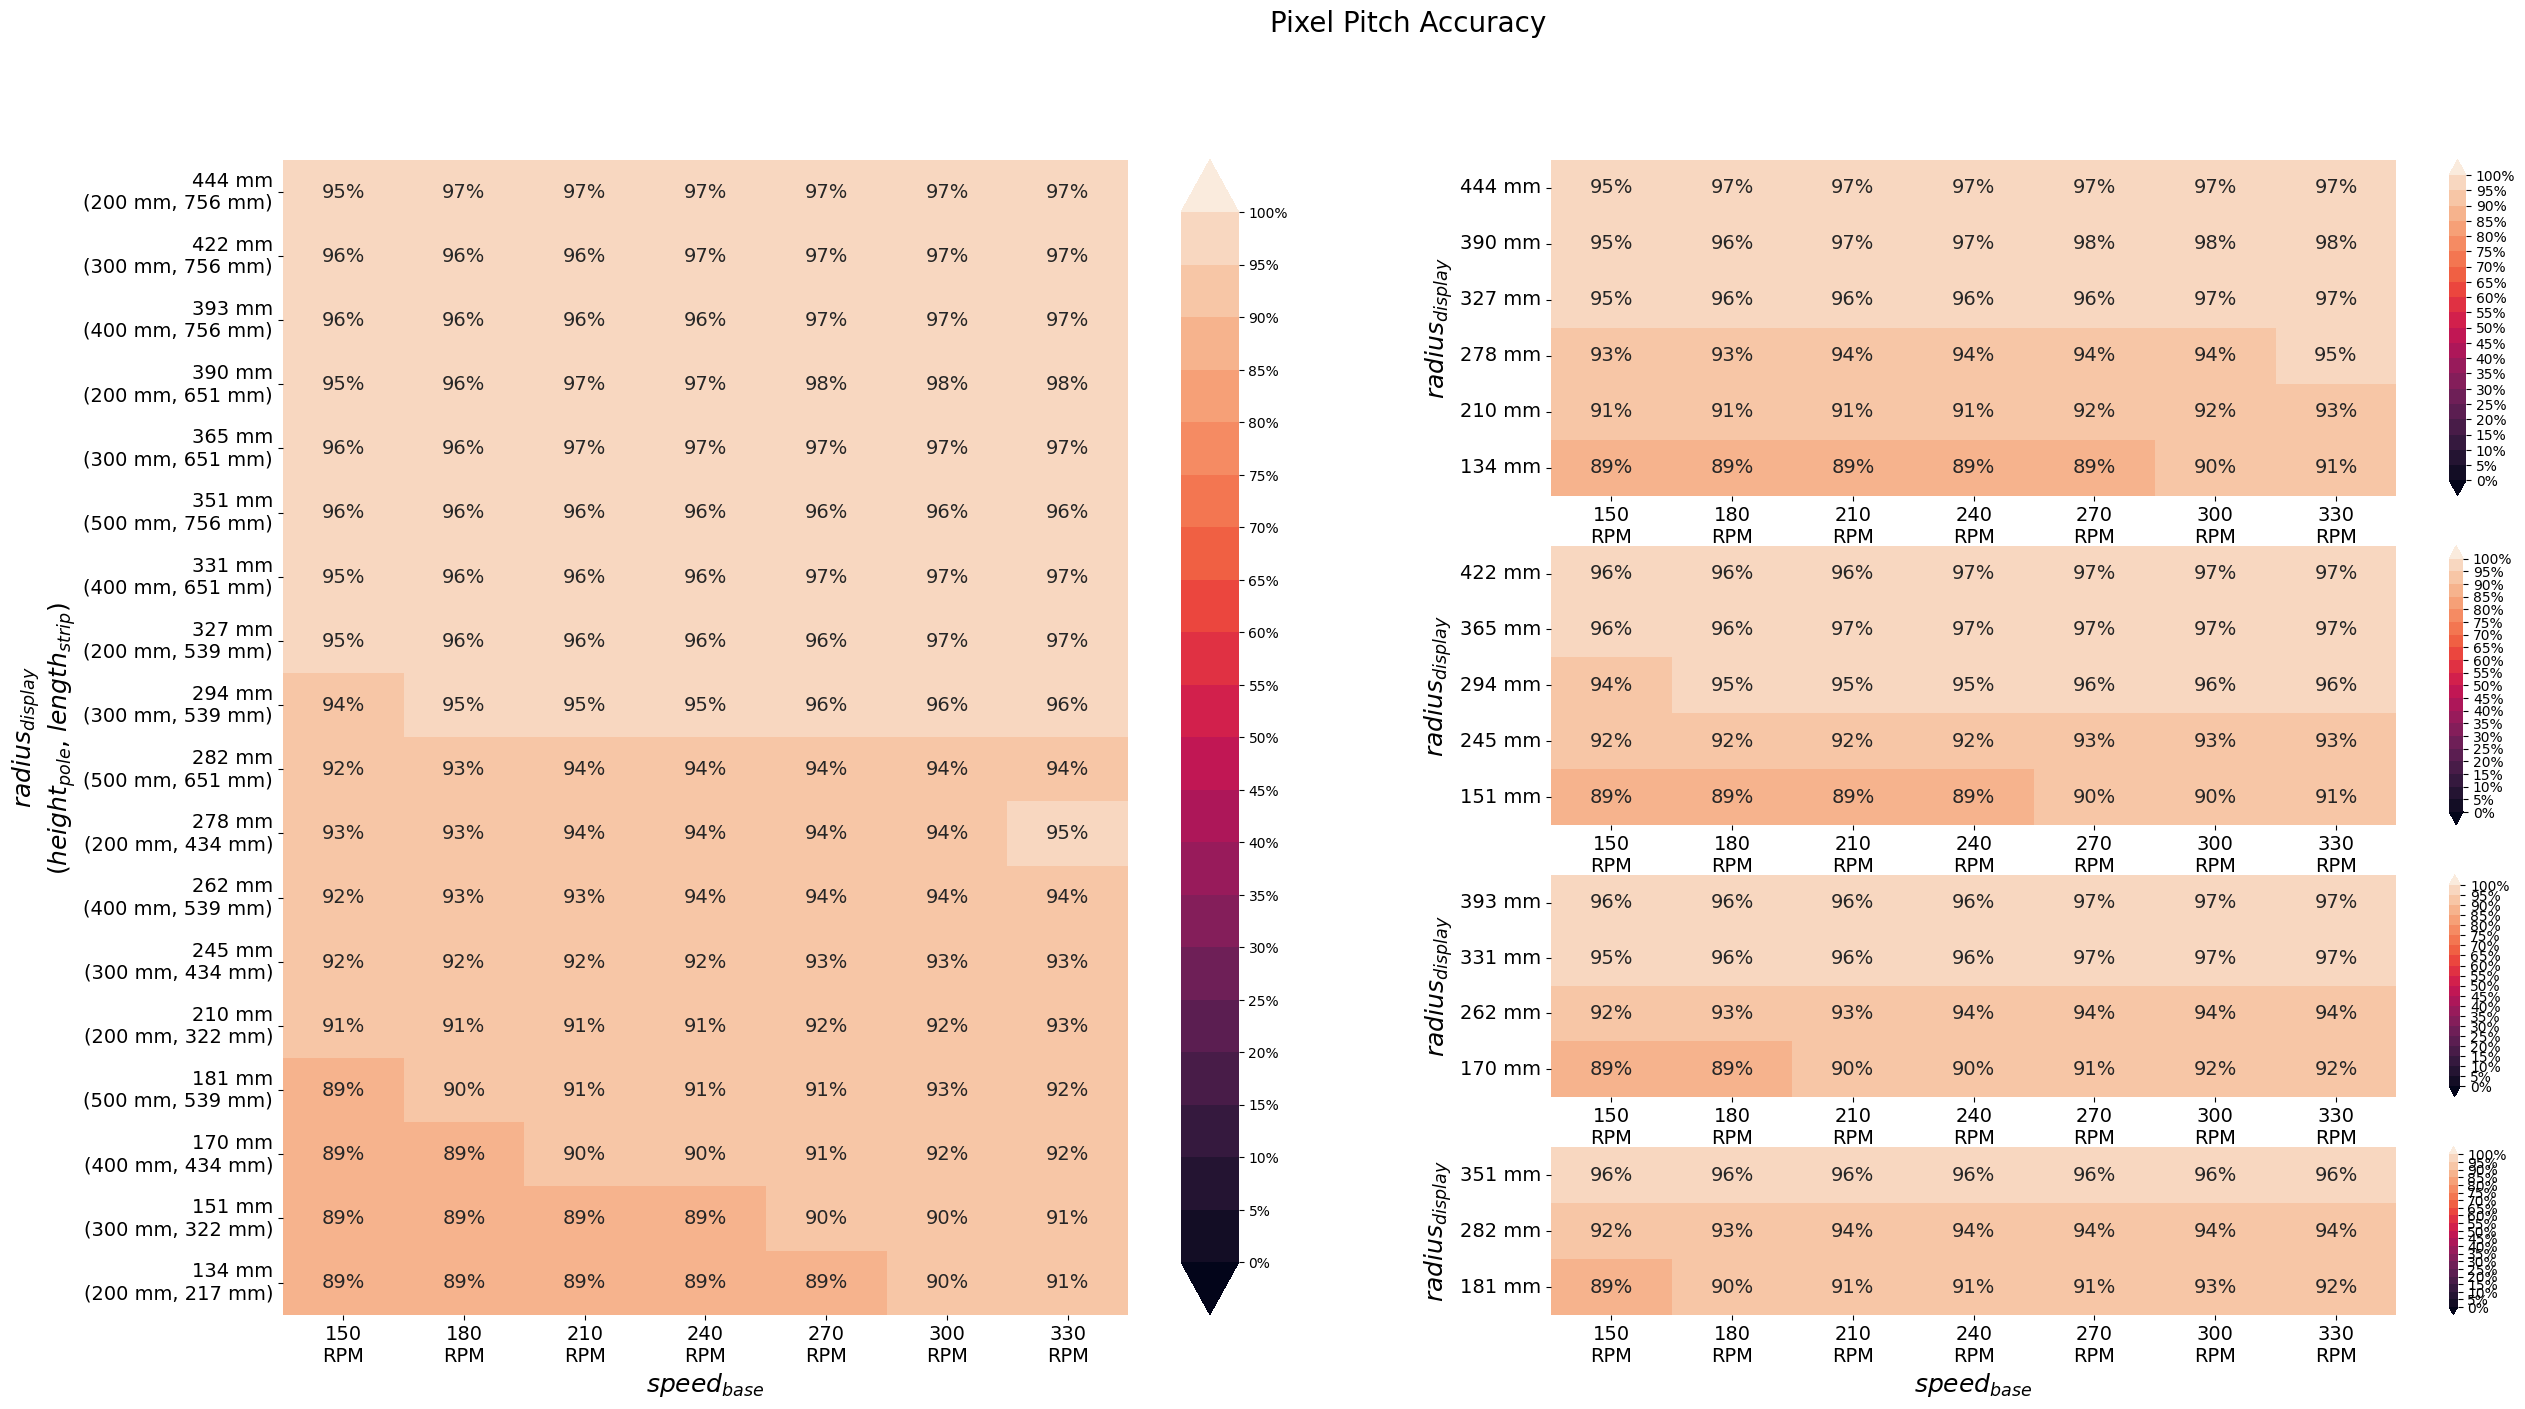

In [3]:

from matplotlib.colors import LogNorm, Normalize,BoundaryNorm
from matplotlib.ticker import MaxNLocator
all_factors_columns = ['speed',  'width', 'height', 'length']
factor_labels = [r'$speed_{base}$',  r'$radius_{display}$', r'$height_{pole}$', r'$length_{strip}$']
factor_postfixes = ['RPM',  'mm', 'mm', 'mm']

bounds = np.arange(0.0, 1.01, 0.05)
norm = BoundaryNorm(boundaries=bounds, ncolors=256, extend='both')
analyze(df=df_curves,
        all_factors = all_factors_columns,
        factor = "width",
        variable = "x_width_success_rate",
        suptitle = "Pixel Pitch Accuracy",
        title = "",
        fmt = ".3f",
        vmin = 0.0,
        vmax = 1.0,
        cmap = "rocket",
        facecolor="white",
        fontcolor="black",
        kwargs={'norm':norm}
        )

# PIXEL RESOLUTION INTEGRITY

1214298.1119402985 +/- 8218.981296368962 ns


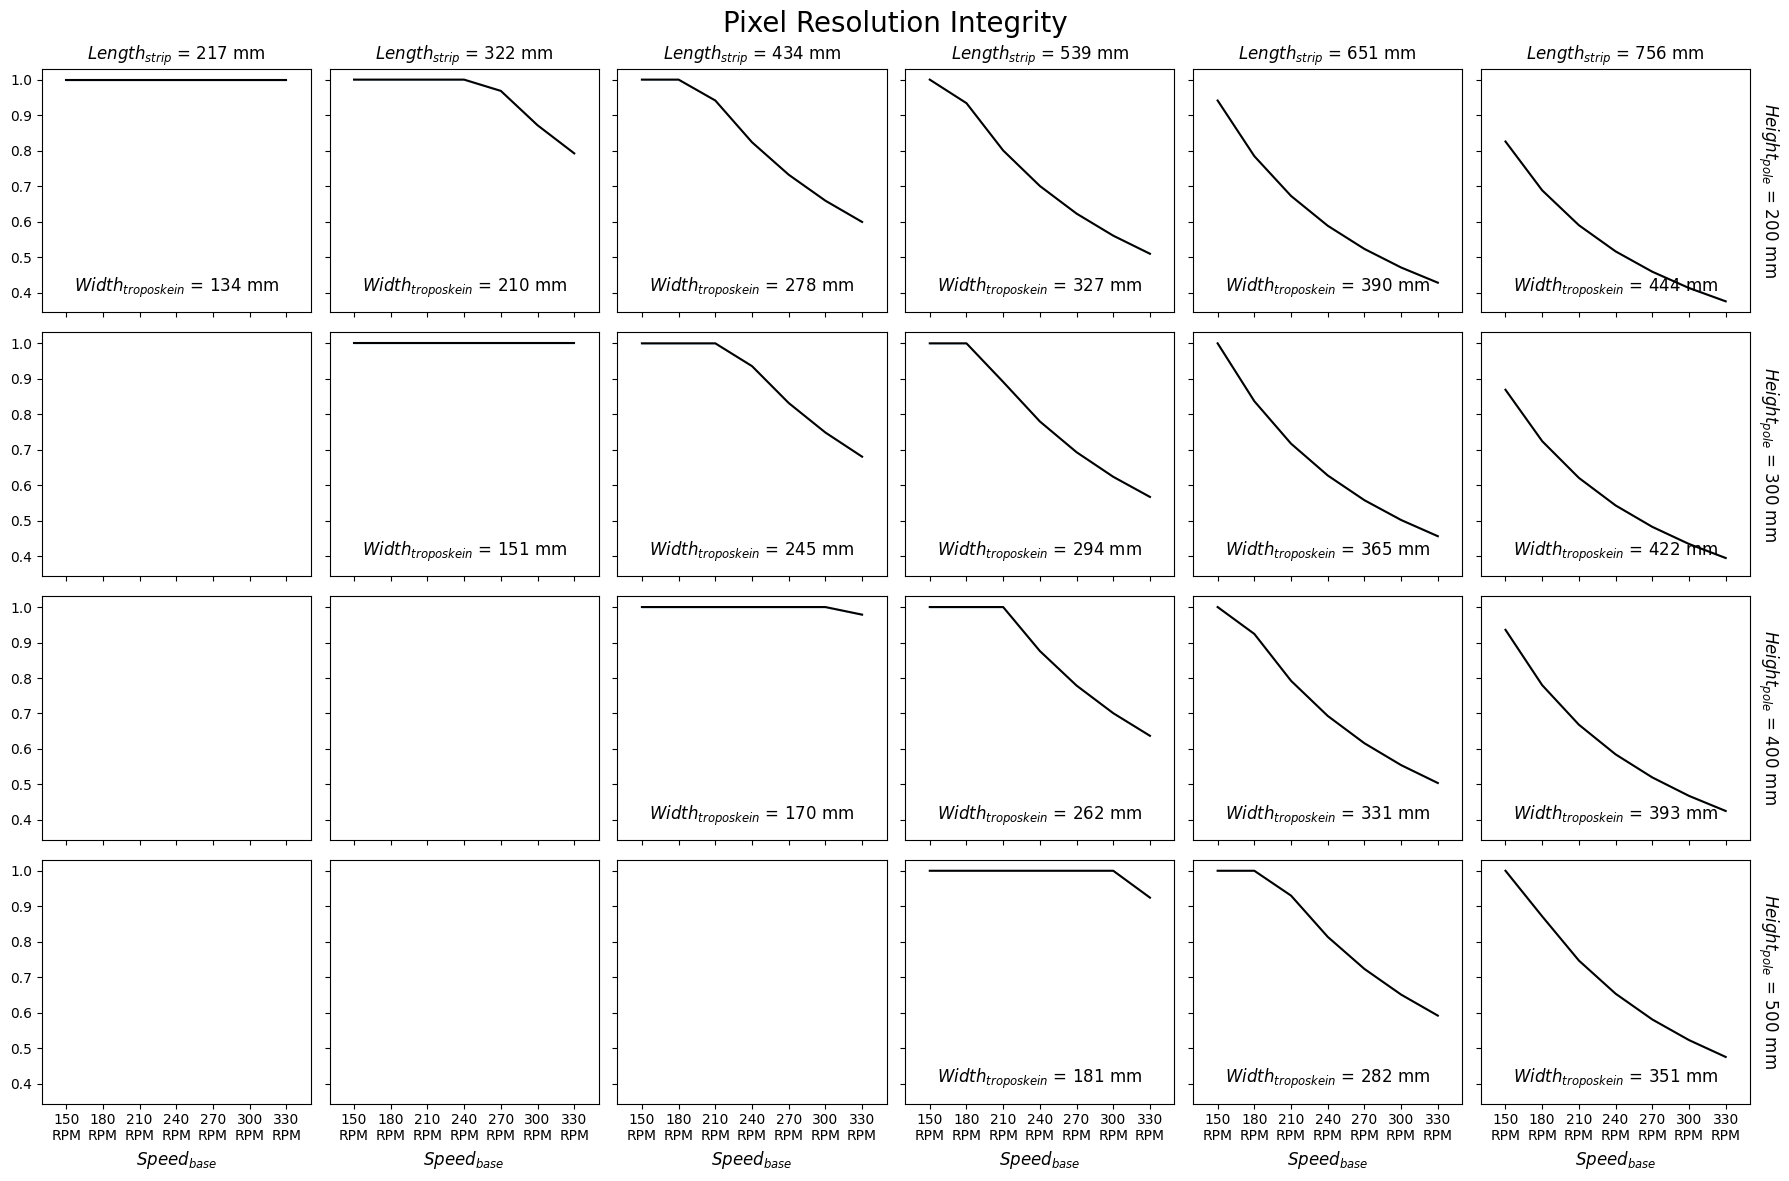

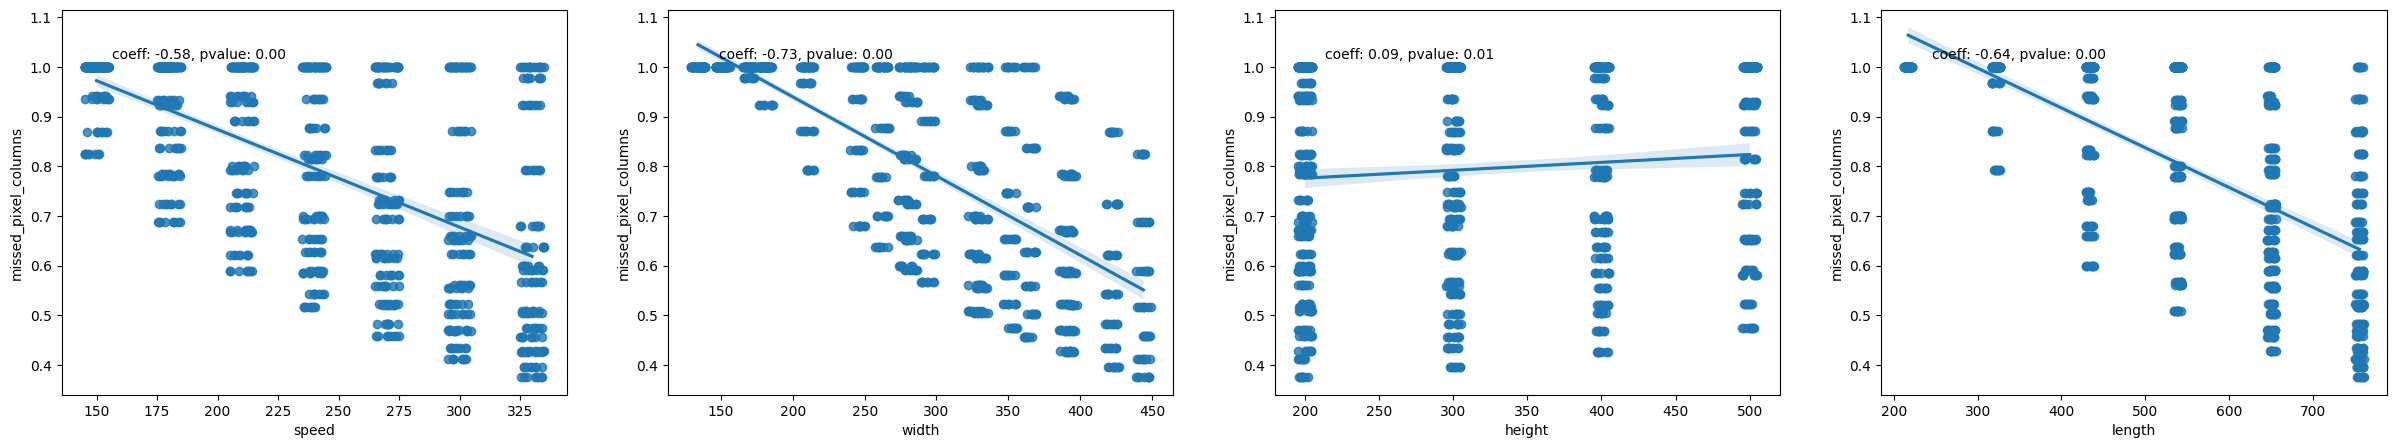

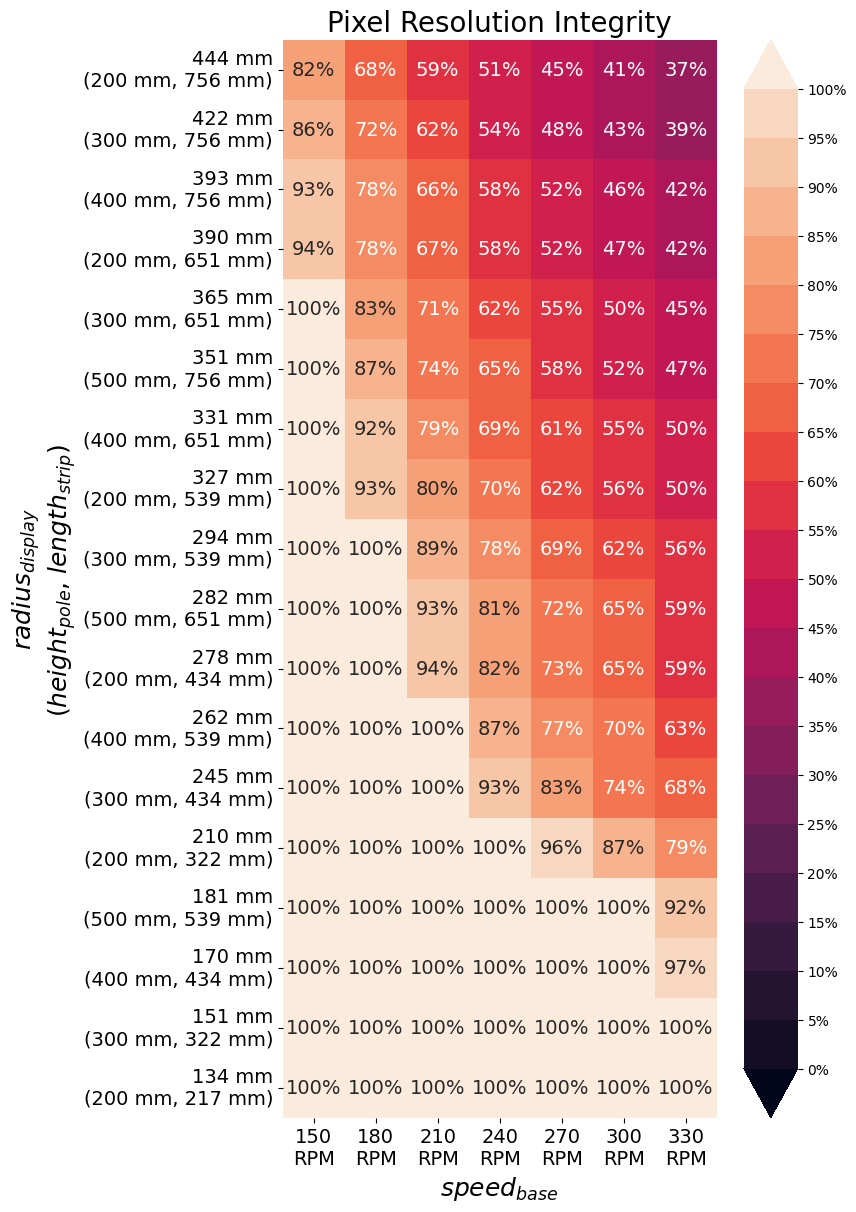

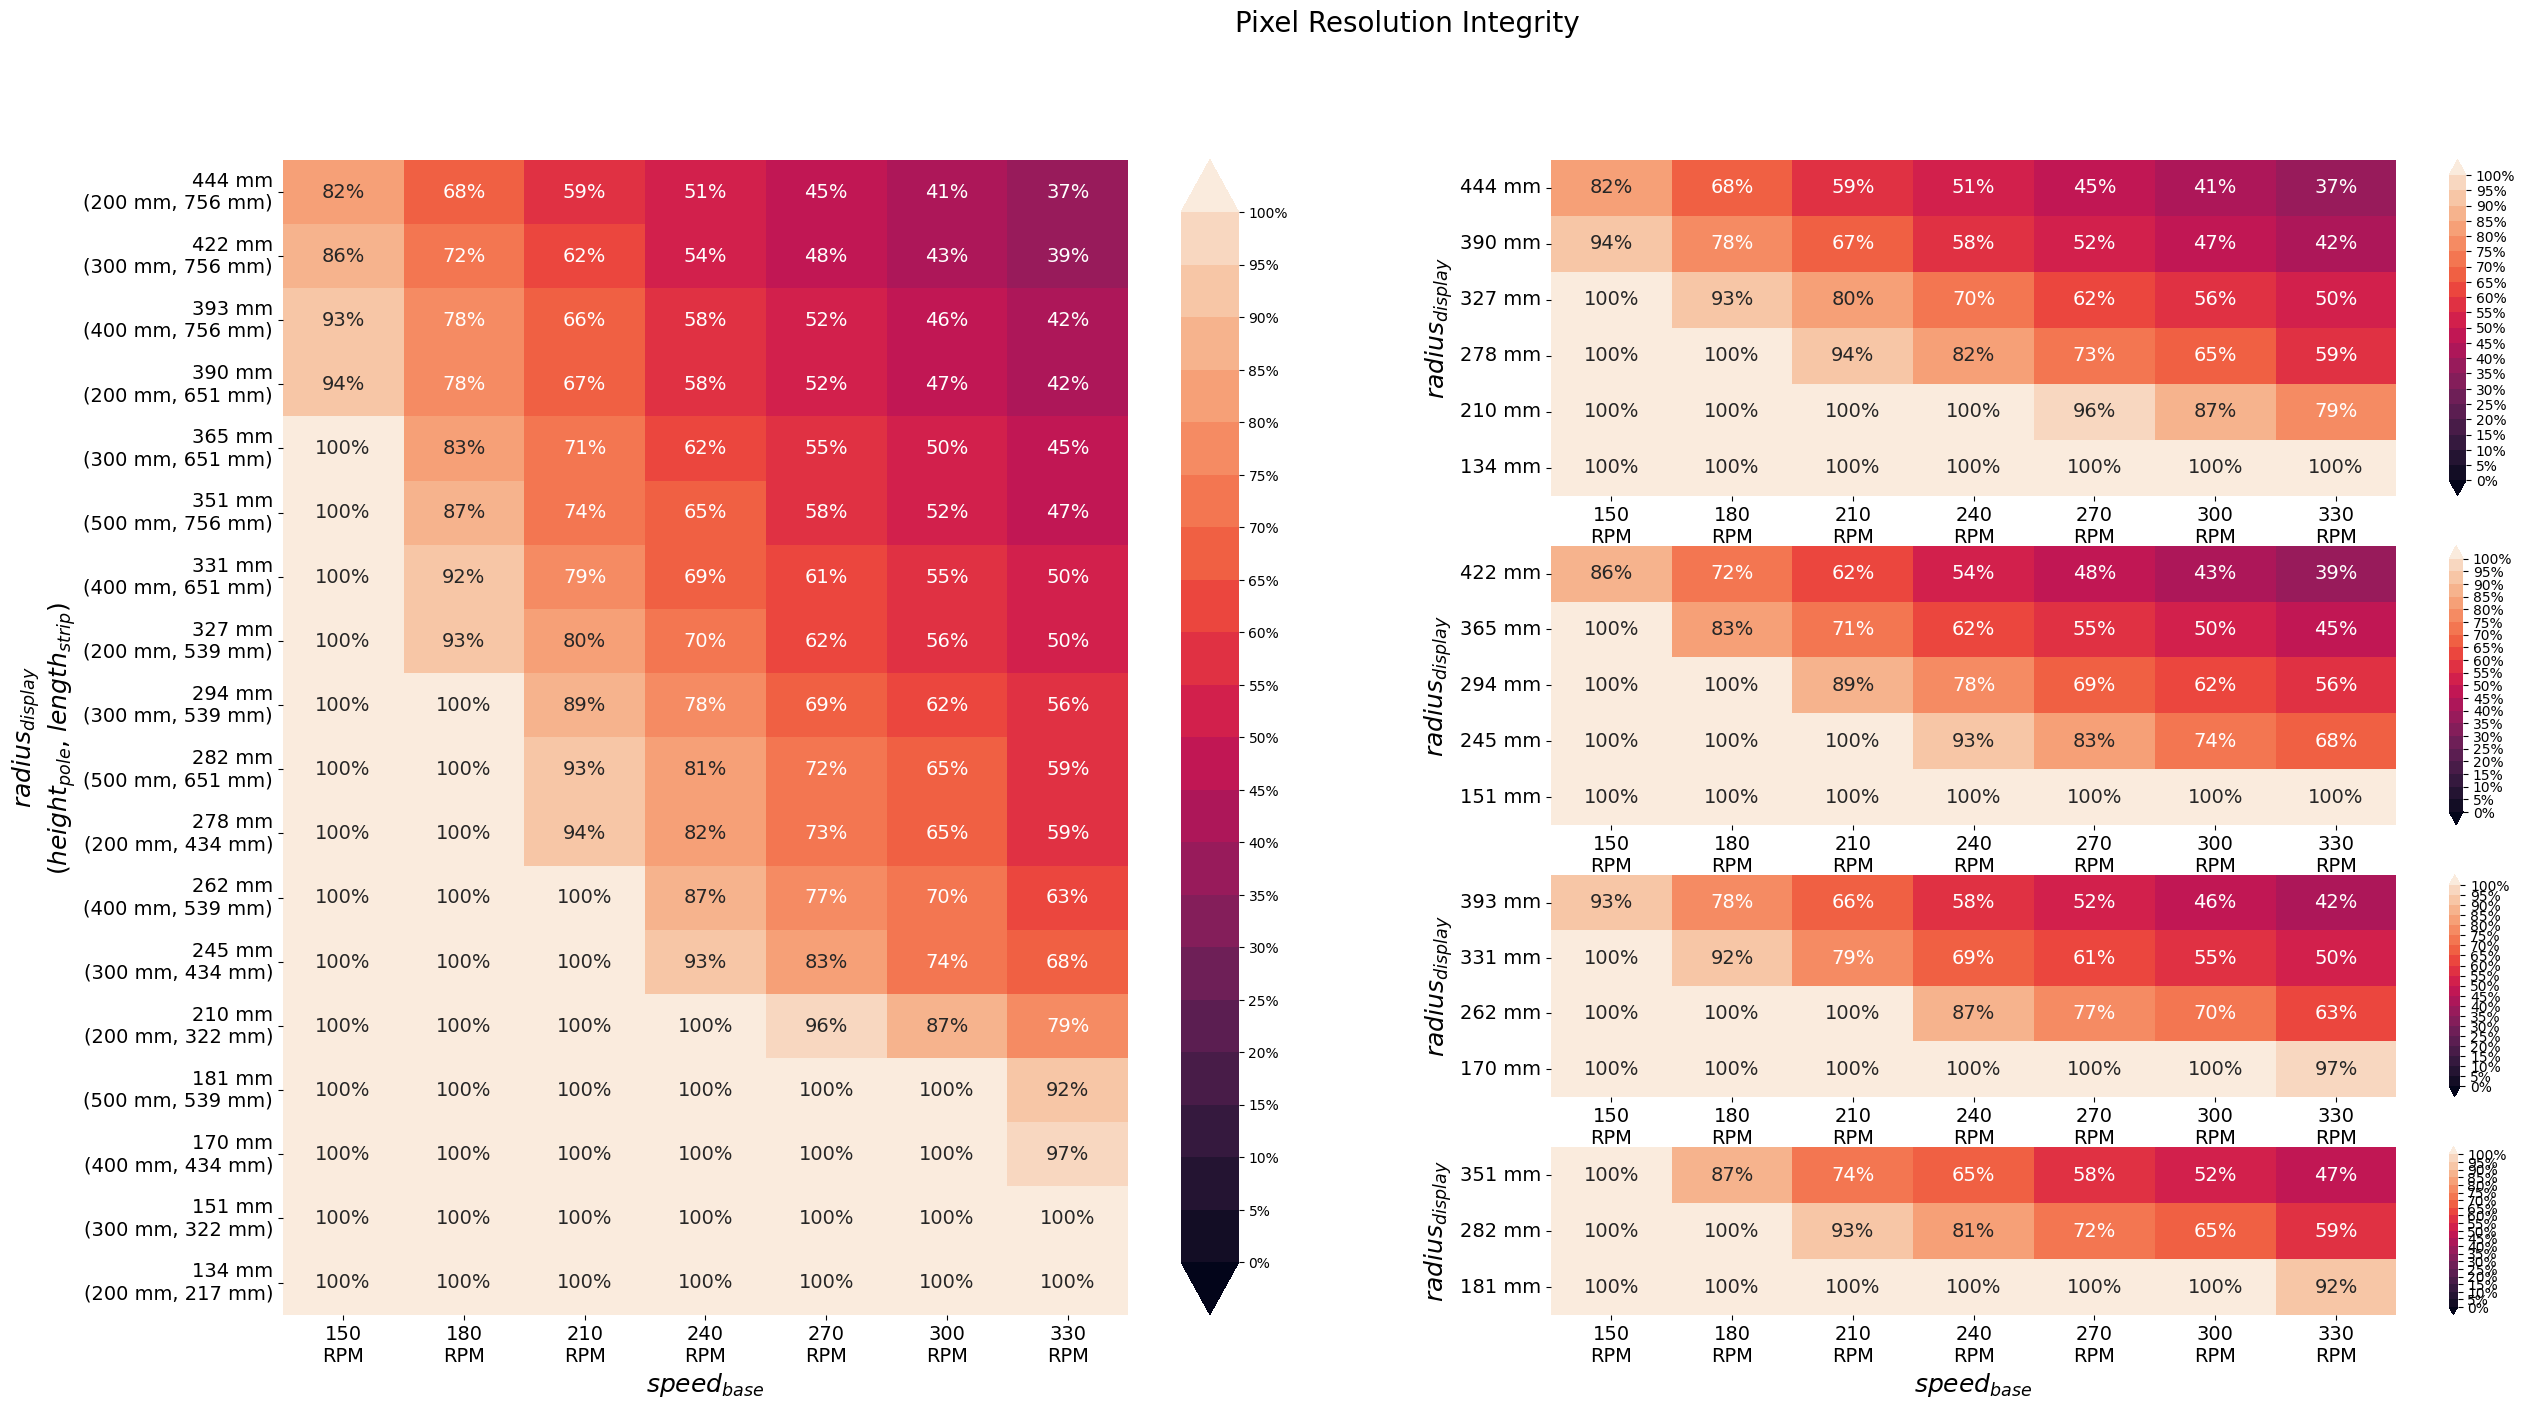

In [4]:

stats_deltatime_without_pitch = statistics.Statistics.describePlus(df_logs.loc[:, ['deltatime_without_pitch']])
mean_deltatime_without_pitch  = stats_deltatime_without_pitch.loc['mean'].values[0]
std_deltatime_without_pitch  = stats_deltatime_without_pitch.loc['std'].values[0]
print(mean_deltatime_without_pitch, "+/-", std_deltatime_without_pitch, "ns")
def compute_missed_pixel_columns(row):
    global mean_deltatime_without_pitch
    required_deltatime = int(1 / (row['speed']/60.0 * row['est_horizontal_resolution']) * 1000000000)
    missed_pixel_columns = 1 - max(0.0, (1 - required_deltatime/mean_deltatime_without_pitch))
    return missed_pixel_columns
df_curves['missed_pixel_columns'] =  df_curves.apply(compute_missed_pixel_columns, axis=1)
df_curves['prob_missed_pixel_column'] = 1 - np.power(1 - df_curves['missed_pixel_columns'], 4)
analyze(df=df_curves, 
        all_factors = all_factors_columns, 
        factor = 'width', 
        variable = 'missed_pixel_columns', 
        suptitle = 'Pixel Resolution Integrity', 
        title = "",
        fmt = ".3f",
        vmin = 0.0,
        vmax = 1.0,
        cmap = "rocket",
        facecolor="white",
        fontcolor="black",
        kwargs={'norm':norm}
        )


# SHAPE INTERPOLATION

In [ ]:


# plt.rcParams['figure.figsize'] = [20, 10]

# y_offset = 550

NROWS = 2
NCOLS = 4
PLOT = False


df_fidelities = pd.DataFrame({
    'speed': pd.Series(dtype='int'),
    'height': pd.Series(dtype='int'),
    'length': pd.Series(dtype='int'),
    'width' : pd.Series(dtype='int'),
    'strip': pd.Series(dtype='int'),
    'orientation': pd.Series(dtype='int'),
    'trial': pd.Series(dtype='int'),
    'x': pd.Series(dtype='float'),
    'y': pd.Series(dtype='float'),
    'simx': pd.Series(dtype='float'),
    'simy': pd.Series(dtype='float'),
})

current_trial = 0
curve_column = 'obs_xy_curve'
#df_width_curves = df_curves[(df_curves.height == 400) & (df_curves.speed == 330)].groupby(['height', 'length'])
df_width_curves = df_curves.groupby(['height', 'length'])
with tqdm(total=len(df_width_curves), desc="Interpolating curves from frames", unit="curves") as pbar:
    for width_curve_name, with_curve_data in df_width_curves:
        current_height = width_curve_name[0]
        current_length = width_curve_name[1]
        current_width = int(with_curve_data.iloc[0]['est_x_width'])

        # get min and max arg
        y = np.arange(0, current_length, 1) # every mm
        yFinalMask = np.full(y.shape, True)
        # for i, r in speed_curve_group.iterrows():
        #     curve = r[curve_column]
        #     yOld = curve[:, 1]
        #     yMask = (y > min(yOld)) & (y < max(yOld))
        #     yFinalMask &= yMask
        yNew = y[yFinalMask]

        sim_curve = with_curve_data.iloc[0]['est_xy_curve']
        yOldSim = sim_curve[:, 1]
        yOldSimMin = min(yOldSim)
        yOldSimMax = max(yOldSim)
        xOldSim = sim_curve[:, 0]
        interp_func = interp1d(yOldSim, xOldSim)

        yMaskSim = (yNew >= yOldSimMin) & (yNew <= yOldSimMax)
        ySim = yNew[yMaskSim]
        xSim = interp_func(ySim)
        
        
        df_speed_curves = with_curve_data.groupby(['speed'])
        for speed_curve_name, speed_curve_data in df_speed_curves:
            current_speed = speed_curve_name
            speed_curve_widths = speed_curve_data.loc[:, 'obs_x_width'].unique()
            mean_width = speed_curve_widths.mean()
            std_width = speed_curve_widths.std()
            #speed_curve_group = speed_curve_data.loc[(speed_curve_data.obs_x_width > mean_width - filter_factor * std_width) & (speed_curve_data.obs_x_width  < mean_width + filter_factor * std_width),:] 
            speed_curve_group = speed_curve_data.loc[:,:] 

            df_strip_curves = speed_curve_group.groupby(['strip', 'orientation'])
            for df_strip_name, df_strip_data in df_strip_curves:
                current_strip = df_strip_name[0]
                current_orientation = df_strip_name[1]
                #print(" speed: %d, strip:%d, orientation:%d, len:%d" %(current_speed, current_strip, current_orientation, len(df_speed_strip_data)))
                xNewStrip = None
                yNewStrip = None
                assert (len(df_strip_data) == 1)
                for i, r in df_strip_data.iterrows():
                    curve = r[curve_column]
                    yOld = curve[:, 1]
                    xOld = curve[:, 0]
                    interp_func = interp1d(yOld, xOld)
                    yMask = (yNew >= min(yOld)) & (yNew <= max(yOld))
                    yNewStrip = yNew[yMask]
                    xNewStrip = interp_func(yNewStrip)
                    #xNewStrip = xNew if xNewStrip is None else xNewStrip+xNew
                #xNewStrip /= float(len(df_speed_strip_data))
                simMaskStrip  = (yNewStrip  >= min(ySim))  & (yNewStrip <= max(ySim))
                yNewStrip = yNewStrip[simMaskStrip]
                xNewStrip = xNewStrip[simMaskStrip]

                stripMaskSim  = (ySim  >= min(yNewStrip))  & (ySim <= max(yNewStrip))
                yNewSim = ySim[stripMaskSim]
                xNewSim = xSim[stripMaskSim]
                try:
                    assert (xNewSim.shape == xNewStrip.shape) and (yNewSim.shape == yNewStrip.shape)
                except AssertionError:
                    print("yNewSim.shape: ", yNewSim.shape)
                    print(yNewSim)
                    print("yNewStrip.shape: ", yNewStrip.shape)
                    print(yNewStrip)
                    
                    assert False
                # insert mean curve
                for i in range(len(xNewStrip)):
                    _x = xNewStrip[i]
                    _y = yNewStrip[i]
                    _simx = xNewSim[i]
                    _simy = yNewSim[i]
                #for _x, _y in zip(xNewStrip, yNewStrip):
                    new_row = pd.DataFrame({
                        'speed': [current_speed], 
                        'height': [current_height],
                        'length': [current_length],
                        'width' : [current_width],
                        'strip': [current_strip],
                        'trial': [current_trial],
                        'orientation': [current_orientation],
                        'x': [_x],
                        'y': [_y],
                        'simx': [_simx],
                        'simy': [_simy],
                        })
                    df_fidelities = pd.concat([df_fidelities, new_row], ignore_index=True)
                current_trial+=1
        pbar.update(1)
    df_fidelities.to_pickle('../results/interpolates.pkl')        
        # g = sns.lineplot(data=df_fidelities, x='y', y= 'x')
        # plt.show()
        # assert False

In [5]:

df_interpolates = pd.read_pickle('../results/interpolates.pkl')
df_interpolates['height'] = df_interpolates['height'].astype(int)
df_interpolates['length'] = df_interpolates['length'].astype(int)
df_interpolates['width'] = df_interpolates['width'].astype(int)
df_interpolates['speed'] = df_interpolates['speed'].astype(int)
df_interpolates['strip'] = df_interpolates['strip'].astype(int)
df_interpolates['trial'] = df_interpolates['trial'].astype(int)
df_interpolates['orientation'] = df_interpolates['orientation'].astype(int)
df_interpolates['x'] = df_interpolates['x'].astype(float)
df_interpolates['y'] = df_interpolates['y'].astype(float)
df_interpolates['simx'] = df_interpolates['simx'].astype(float)
df_interpolates['simy'] = df_interpolates['simy'].astype(float)
display(df_interpolates)
# sns.relplot(data=df_fidelities, x='y', y='x', row='width', col='speed', hue='trial', kind='line') #, facet_kws={'sharey': False, 'sharex': False})
# plt.show()

speed  height  length  width  strip  orientation  trial        x  \
0         150     200     217    134      0            0      0  102.517   
1         150     200     217    134      0            0      0  102.517   
2         150     200     217    134      0            0      0  102.517   
3         150     200     217    134      0            0      0  102.517   
4         150     200     217    134      0            0      0  102.774   
...       ...     ...     ...    ...    ...          ...    ...      ...   
307792    330     500     756    351      3            1   1007  115.068   
307793    330     500     756    351      3            1   1007  113.617   
307794    330     500     756    351      3            1   1007  110.575   
307795    330     500     756    351      3            1   1007  108.492   
307796    330     500     756    351      3            1   1007  106.154   

            y     simx   simy  
0        25.0  109.283   25.0  
1        26.0  109.950   26.0  
2        27.0  110.616   27.0  
3        28.0  111.283   28.0  
4        29.0  111.950   29.0  
...       ...      ...    ...  
307792  493.0  107.497  493.0  
307793  494.0  105.522  494.0  
307794  495.0  103.772  495.0  
307795  496.0  102.022  496.0  
307796  497.0  100.272  497.0  

[307797 rows x 11 columns]

# FIDELITY EXTRACTION

Interpolating curves from frames:   0%|          | 0/18 [00:00<?, ?curves/s]

Group Name: (200, 217), Group Size: 9576
    Group Name: 150, Group Size: 1368


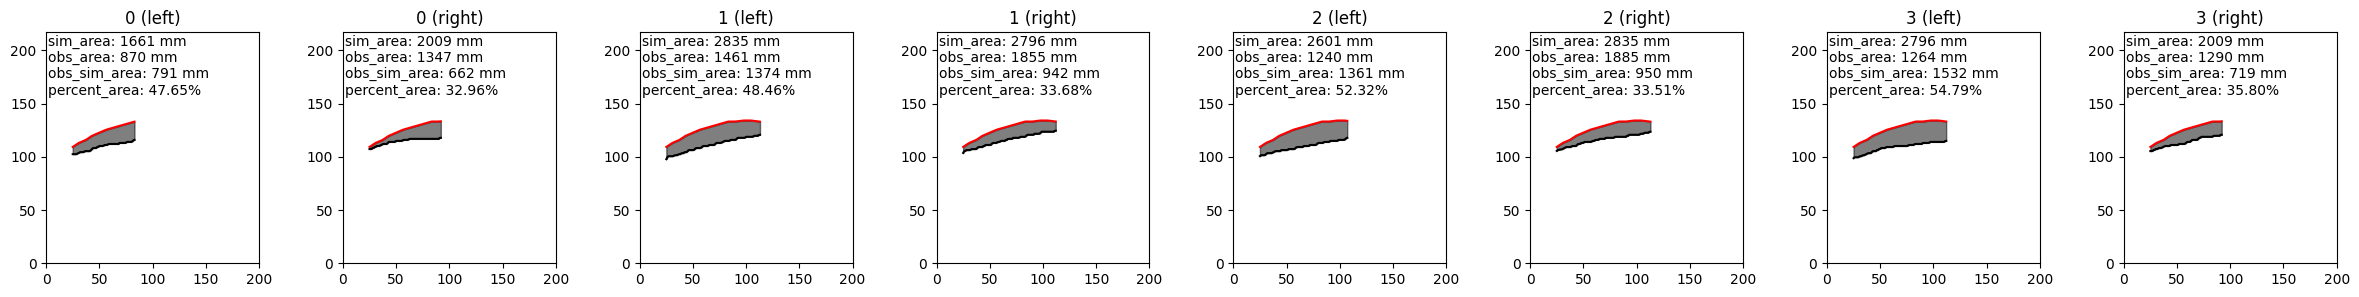

    Group Name: 180, Group Size: 1368


KeyboardInterrupt: 

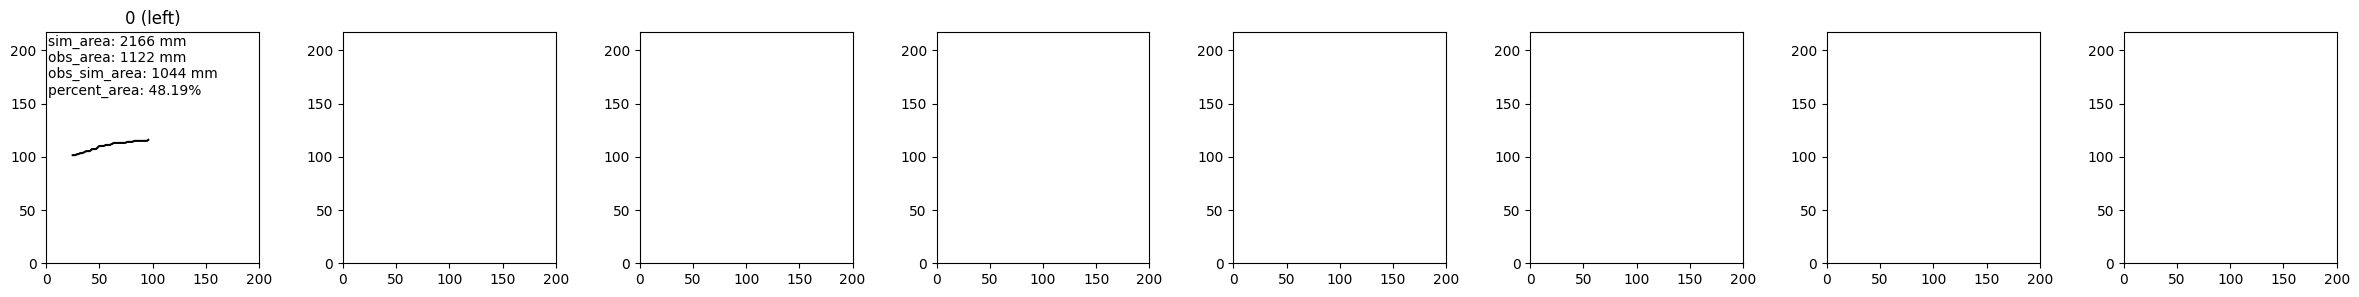

In [7]:
df_fidelities = pd.DataFrame({
    'speed': pd.Series(dtype='int'),
    'height': pd.Series(dtype='int'),
    'length': pd.Series(dtype='int'),
    'width': pd.Series(dtype='int'),
    'strip': pd.Series(dtype='int'),
    'orientation': pd.Series(dtype='int'),
    'area': pd.Series(dtype='float'),
    'pcm': pd.Series(dtype='float'),
    'df': pd.Series(dtype='float'),
    'cl': pd.Series(dtype='float'),
    'mae': pd.Series(dtype='float'),
    'mape': pd.Series(dtype='float'),
    'mse': pd.Series(dtype='float'),
})


df_width_interpolates = df_interpolates.groupby(['height', 'length'])
with tqdm(total=len(df_width_interpolates), desc="Interpolating curves from frames", unit="curves") as pbar:
    for width_interpolate_name, width_interpolate_data in df_width_interpolates:
        print(f"Group Name: {width_interpolate_name}, Group Size: {len(width_interpolate_data)}")
        current_height = width_interpolate_name[0]
        current_length = width_interpolate_name[1]
        current_width = int(width_interpolate_data.iloc[0]['width'])
        
        # get 
        # print("min_width: ", min_width)
        df_speed_interpolates = width_interpolate_data.groupby(['speed'])
        for speed_interpolate_name, speed_interpolate_data in df_speed_interpolates:
            print(f"    Group Name: {speed_interpolate_name}, Group Size: {len(speed_interpolate_data)}")
            current_speed = speed_interpolate_name
            df_trials_interpolates = speed_interpolate_data.groupby(['strip', 'orientation'])
            n = 0
            fig, axes = plt.subplots(nrows=1,  ncols=8, figsize=(30,3))
            for ax in axes.flatten():
                yMaxValue = current_height * current_length/current_height 
                xMaxValue = current_height
                aspect_ratio = yMaxValue/xMaxValue
                ax.set_box_aspect(aspect_ratio)
                ax.set_ylim([0, yMaxValue])
                ax.set_xlim([0, xMaxValue])

            for trial_name, trial_data in df_trials_interpolates:
                current_strip = trial_name[0]
                current_orientation = trial_name[1]
                #print(f"        Group Name: {trial_name}, Group Size: {len(trial_data)}")
                obs_curve = trial_data[['x', 'y']].values
                sim_curve = trial_data[['simx', 'simy']].values

                # crop obs_curve and sim_curve to the highest value of x
                max_x_idx = np.argmax(obs_curve[:, 0])
                obs_curve = obs_curve[0:max_x_idx+1, :]
                sim_curve = sim_curve[0:max_x_idx+1, :]
                ref_curve = sim_curve.copy()
                ref_curve[:, 0] = c.DEFAULT_HOLE_RADIUS
                assert np.array_equal(obs_curve[:, 1], sim_curve[:, 1])


                pcm = sm.pcm(obs_curve, sim_curve)
                df = sm.frechet_dist(obs_curve, sim_curve)
                obs_area = sm.area_between_two_curves(ref_curve, obs_curve)
                sim_area = sm.area_between_two_curves(ref_curve, sim_curve)
                max_area = max(obs_area, sim_area)
                obs_sim_area = sm.area_between_two_curves(obs_curve, sim_curve)
                areaa = obs_sim_area/max_area
                #print(areaa)
                cl = sm.curve_length_measure(obs_curve, sim_curve)
                mse = sm.mse(obs_curve, sim_curve)
                
                corrected_obs_curve = obs_curve.copy()
                corrected_sim_curve = sim_curve.copy()
                corrected_obs_curve[:, 0] -= c.DEFAULT_HOLE_RADIUS
                corrected_sim_curve[:, 0] -= c.DEFAULT_HOLE_RADIUS
                abs_errors = np.abs(corrected_sim_curve [:, 0] - corrected_obs_curve[:, 0])
                max_values = np.max([corrected_sim_curve [:, 0], corrected_obs_curve[:, 0]], axis = 0) # or mean, min
                abs_errors_over_mean_values = abs_errors/max_values
                mape = np.mean(abs_errors_over_mean_values)
                mae = np.mean(abs_errors)
                new_row = pd.DataFrame({
                    'speed': [current_speed], 
                    'height': [current_height],
                    'length': [current_length],
                    'width': [current_width],
                    'strip': [current_strip],
                    'orientation': [current_orientation],
                    'area':[areaa],
                    'pcm':[pcm],
                    'df': [df],
                    'cl': [cl],
                    'mae': [mae],
                    'mape': [mape],
                    'mse': [mse],
                })
                df_fidelities = pd.concat([df_fidelities, new_row], ignore_index=True)

                c_ax = axes[n]
                c_ax.set_title("%s (%s)" %(current_strip, 'left' if current_orientation == 0 else 'right'))
                c_ax.annotate(f'sim_area: {sim_area:.0f} mm\nobs_area: {obs_area:.0f} mm\nobs_sim_area: {obs_sim_area:.0f} mm\npercent_area: {(areaa*100):.2f}%', xycoords ="axes fraction", xy=(0.01, 0.99), fontsize=10, horizontalalignment='left', verticalalignment='top')
                sns.lineplot(x=obs_curve[:, 1], y=obs_curve[:, 0], color='black', ax=c_ax)
                sns.lineplot(x=sim_curve[:, 1], y=sim_curve[:, 0], color='red', ax=c_ax)
                c_ax.fill_between(obs_curve[:, 1], obs_curve[:, 0], sim_curve[:, 0], color='black', alpha=0.5)
                n+=1
            plt.show()
        pbar.update(1)
df_fidelities.to_pickle('../results/fidelities.pkl')        
                #print(f"            pcm: {pcm}, df: {df}, areaa: {areaa}, cl: {cl}, mse: {mse}, mae: {mae}, my_mae: {my_mae}")
                

# AXISYMMETRIC SHAPE ACCURACY

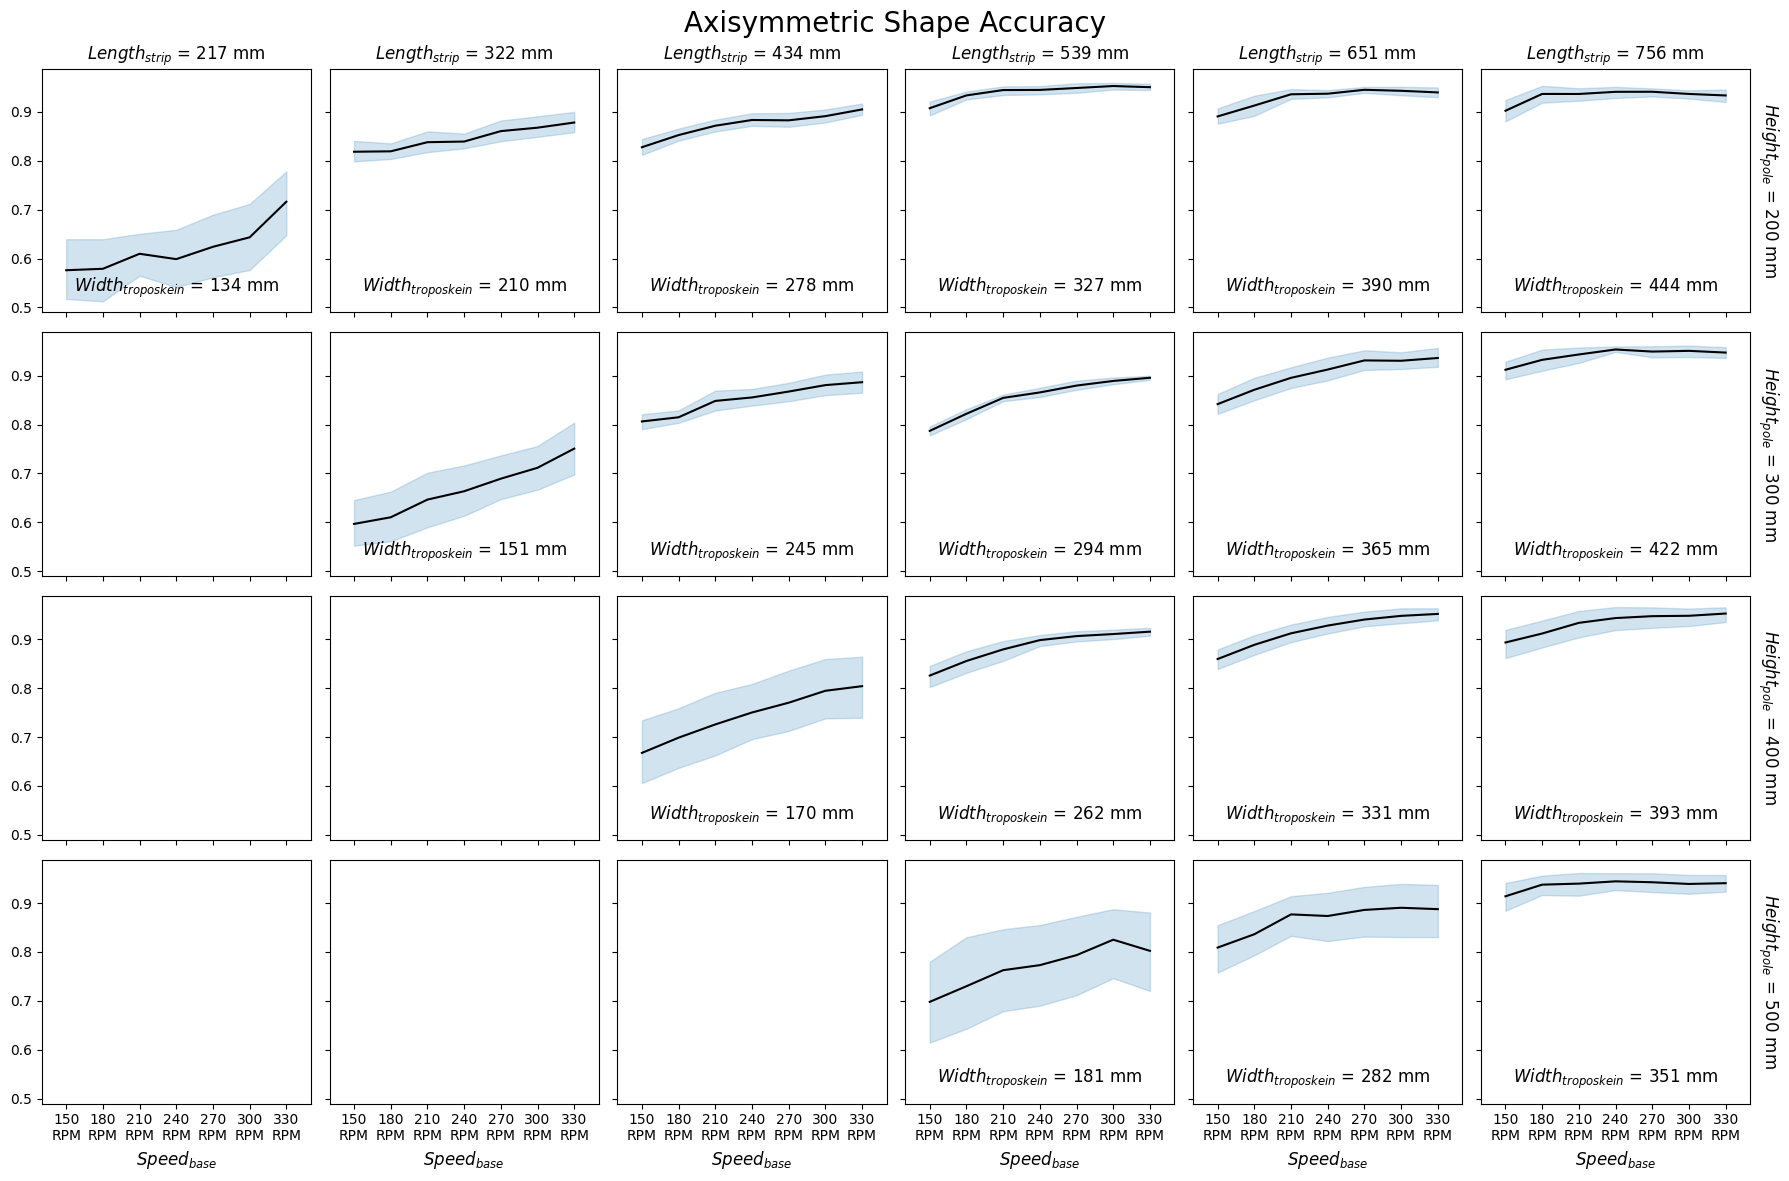

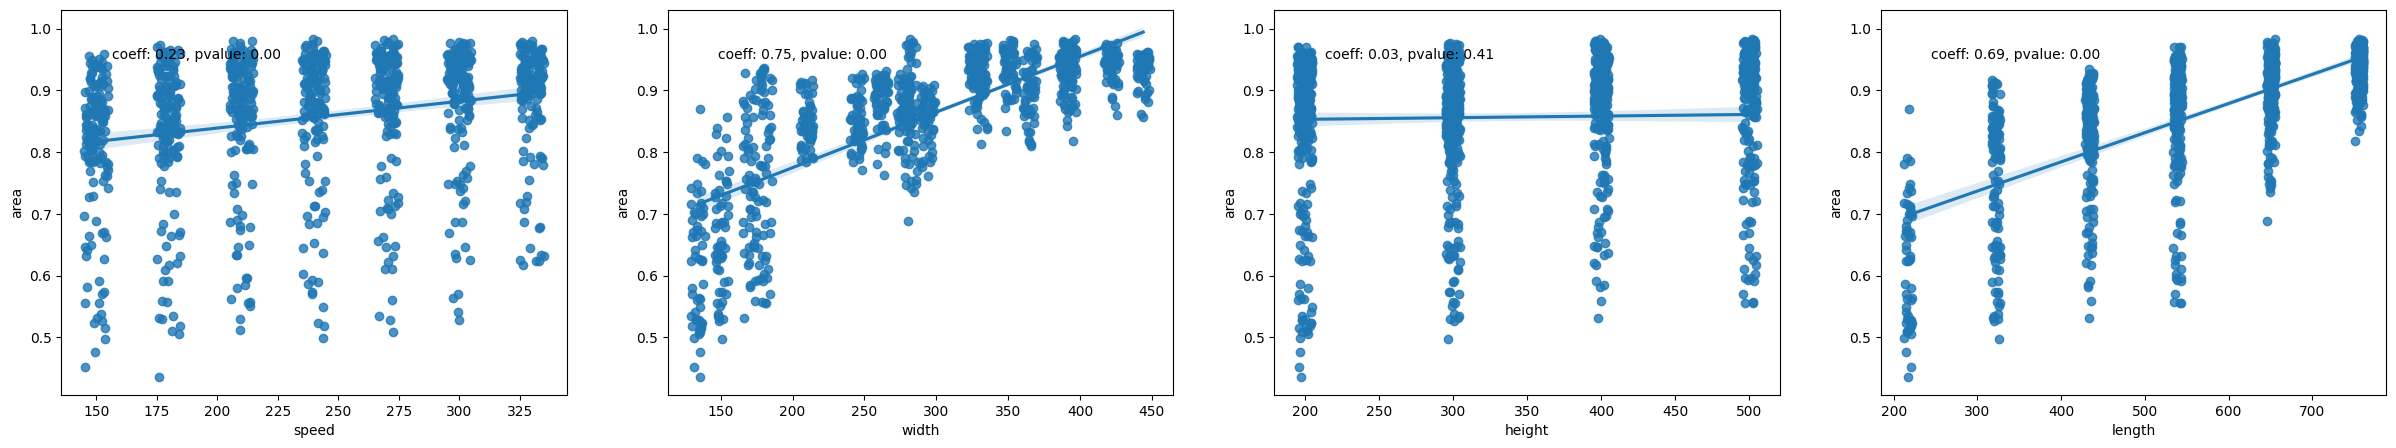

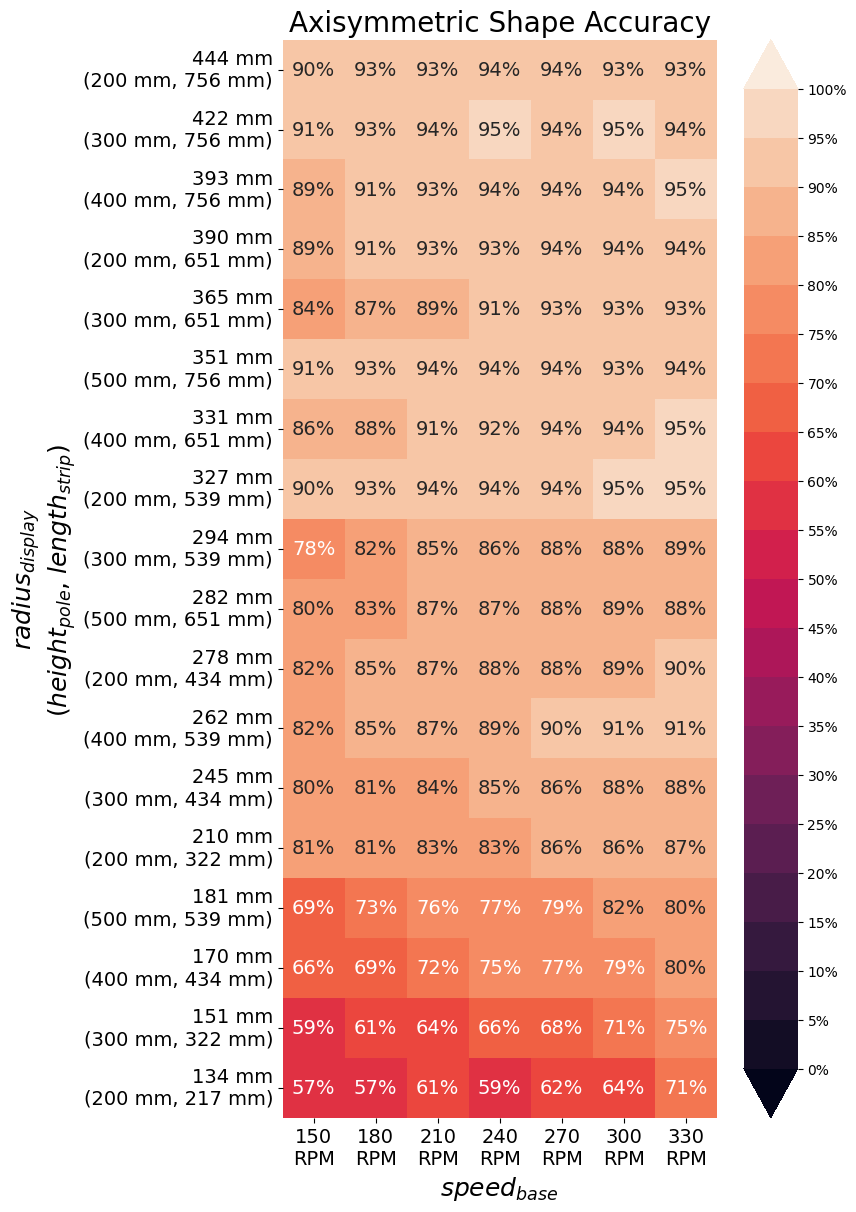

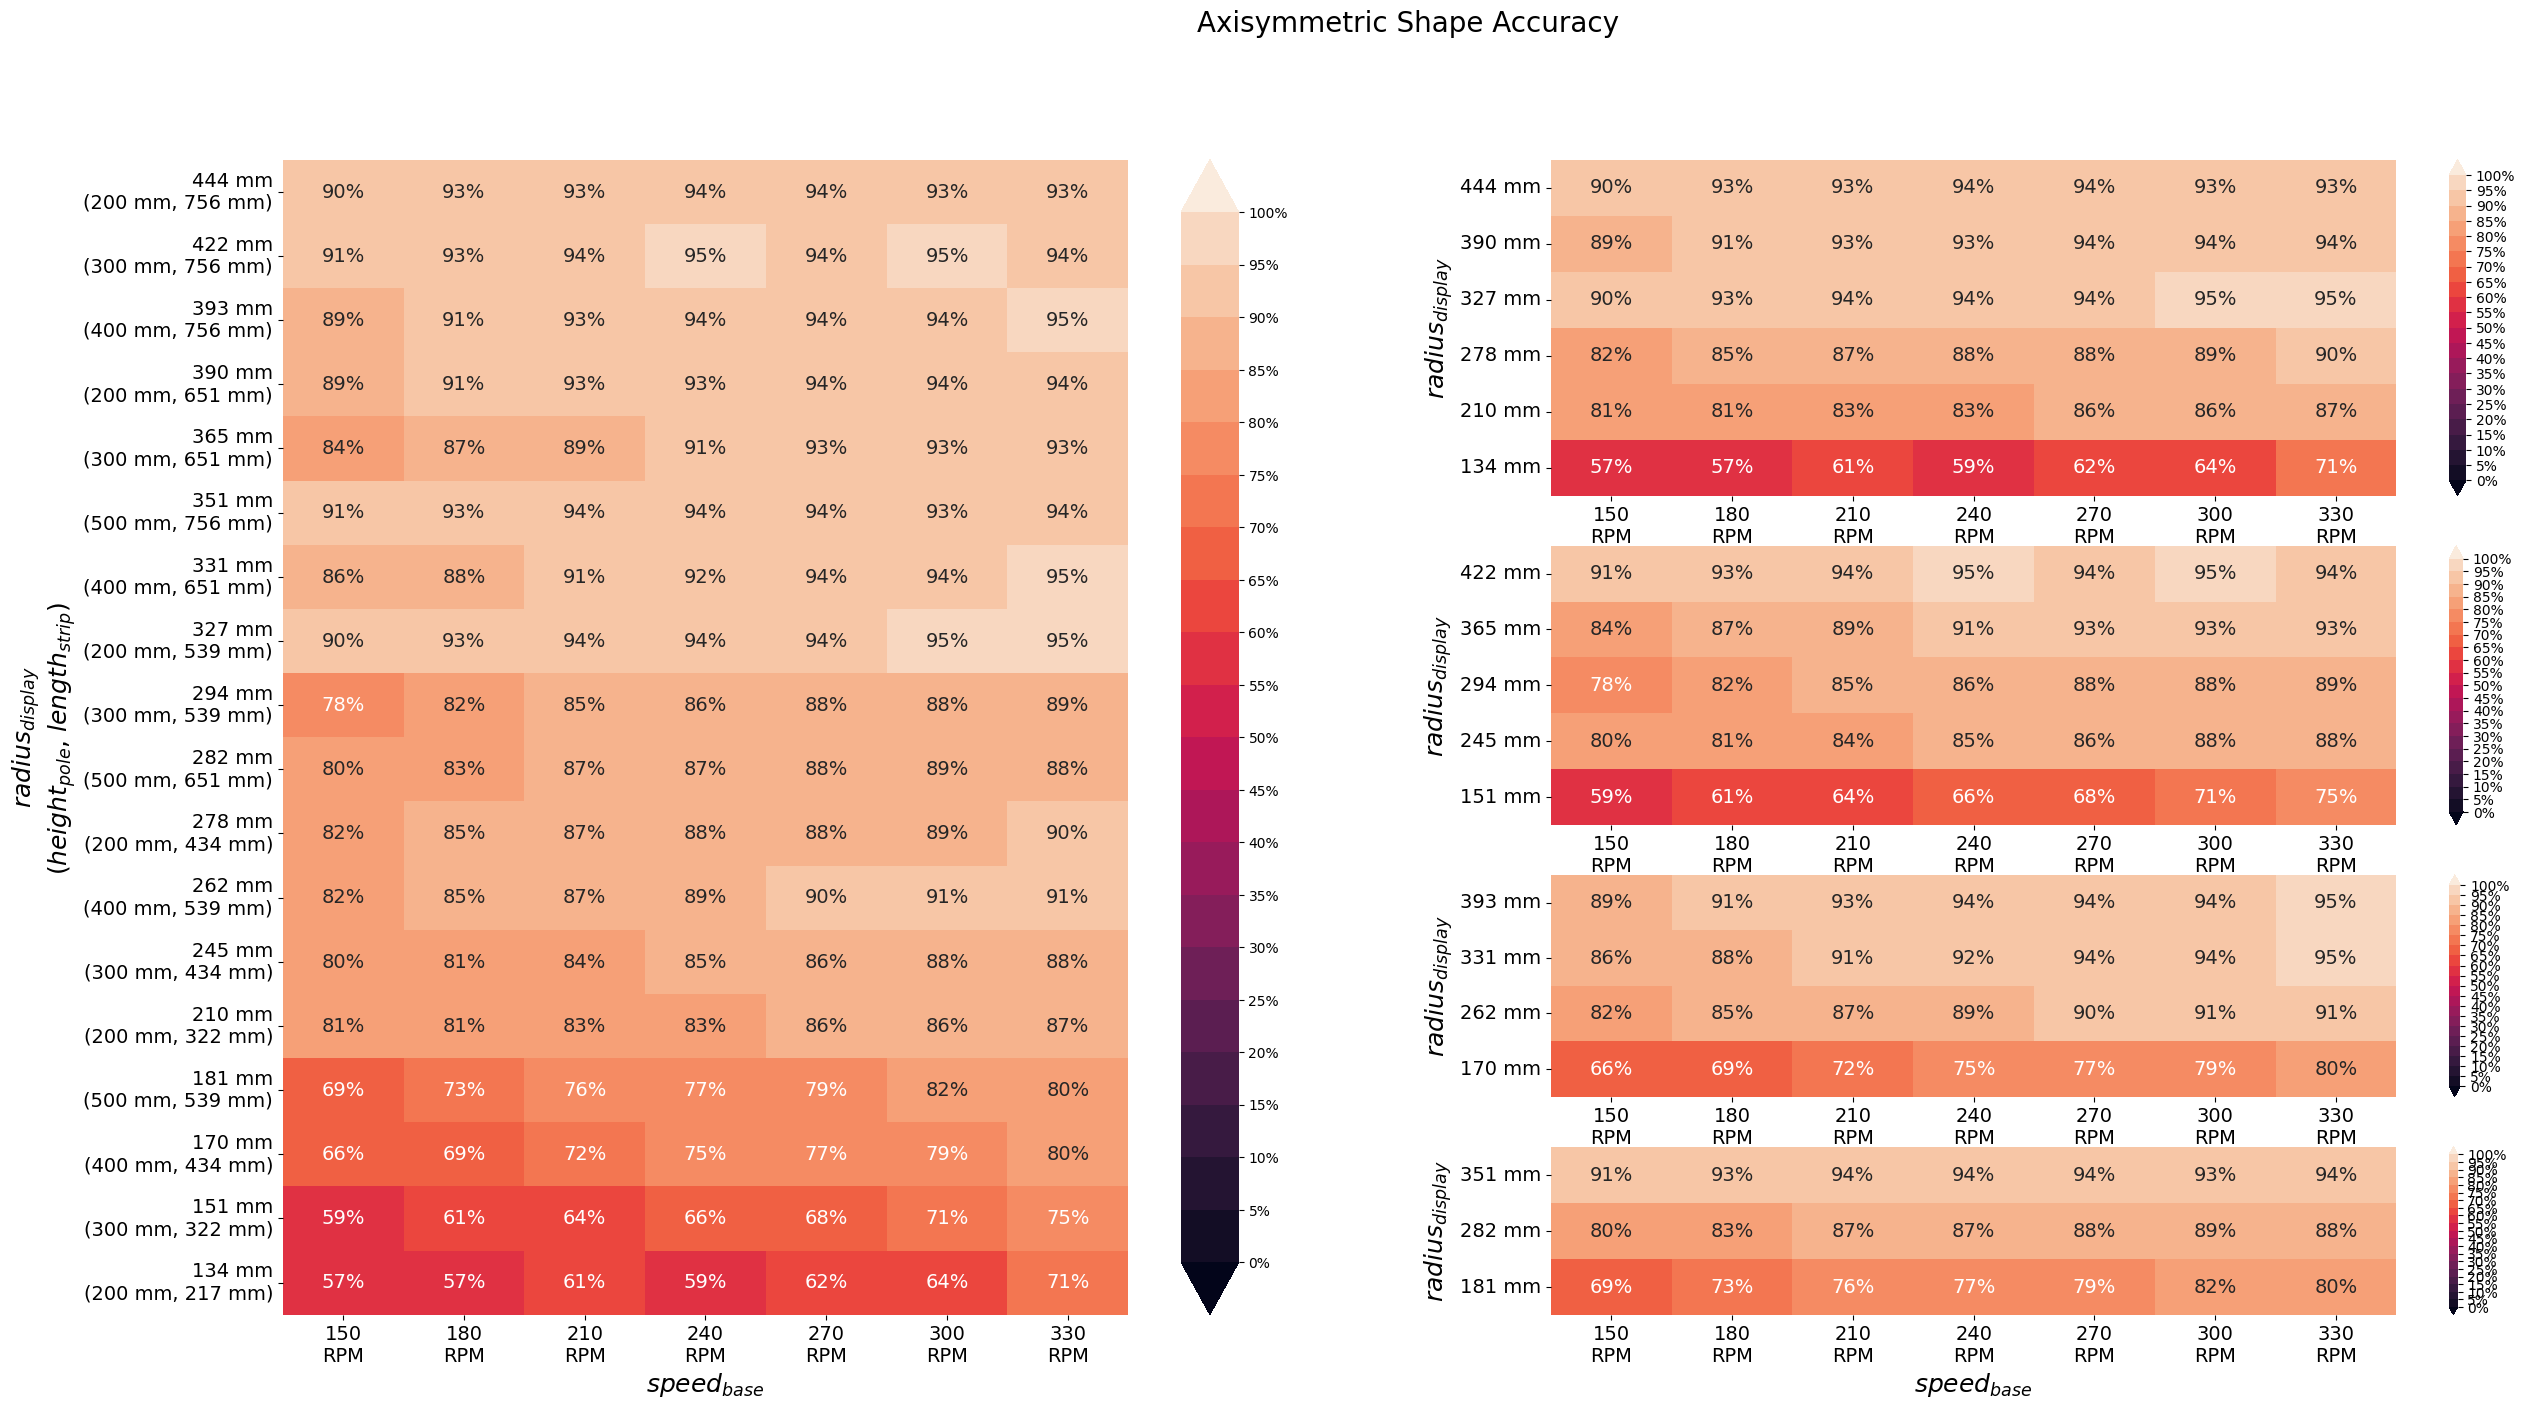

In [6]:
df_fidelities = pd.read_pickle('../results/fidelities.pkl')
df_fidelities['speed'] = df_fidelities['speed'].astype(int)
df_fidelities['height'] = df_fidelities['height'].astype(int)
df_fidelities['length'] = df_fidelities['length'].astype(int)
df_fidelities['width'] = df_fidelities['width'].astype(int)
df_fidelities['strip'] = df_fidelities['strip'].astype(int)
df_fidelities['orientation'] = df_fidelities['orientation'].astype(int)
#df_fidelities.loc[df_fidelities['area'] > 1.0, 'area'] = 1.0 
df_fidelities['area'] = 1 - df_fidelities['area'].astype(float)
df_fidelities['pcm'] = df_fidelities['pcm'].astype(float)
df_fidelities['df'] = df_fidelities['df'].astype(float)
df_fidelities['cl'] = df_fidelities['cl'].astype(float)
df_fidelities['mae'] = df_fidelities['mae'].astype(float)
df_fidelities['mape'] = 1 - df_fidelities['mape'].astype(float)
df_fidelities['mse'] = df_fidelities['mse'].astype(float)


all_factors_columns = ['speed',  'width', 'height', 'length']
analyze(df=df_fidelities,
        all_factors = all_factors_columns,
        factor = "width",
        variable = "area",
        suptitle = "Axisymmetric Shape Accuracy",
        title = "",
        fmt = ".3f",
        vmin = 0.0,
        vmax = 1.0,
        cmap = "rocket",
        facecolor="white",
        fontcolor="black",
        kwargs={'norm':norm})


# STABILITY EXTRACTION

In [9]:
from tqdm.notebook import tqdm
df_similarities = pd.DataFrame({
    'speed': pd.Series(dtype='int'),
    'height': pd.Series(dtype='int'),
    'length': pd.Series(dtype='int'),
    'width': pd.Series(dtype='int'),
    'comparison': pd.Series(dtype='str'),
    'area': pd.Series(dtype='float'),
    'pcm': pd.Series(dtype='float'),
    'raw_pcm': pd.Series(dtype='float'),
    'df': pd.Series(dtype='float'),
    'cl': pd.Series(dtype='float'),
    'mae': pd.Series(dtype='float'),
    'mape': pd.Series(dtype='float'),
    'mse': pd.Series(dtype='float'),
    'area_per_mm': pd.Series(dtype='float'),
    'pcm_per_mm': pd.Series(dtype='float'),
    'raw_pcm_per_mm': pd.Series(dtype='float'),
    'df_per_mm': pd.Series(dtype='float'),
    'cl_per_mm': pd.Series(dtype='float'),
    'mae_per_mm': pd.Series(dtype='float'),
    'mse_per_mm': pd.Series(dtype='float'),
})
# df_width_interpolates = df_fidelities.groupby(['height', 'length'])
# for width_interpolate_name, width_interpolate_data in df_width_interpolates:
#     current_height = width_interpolate_name[0]
#     current_length = width_interpolate_name[1]
#     max_width_index = width_interpolate_data['x'].argmax()
#     df_trials_interpolates = width_interpolate_data.groupby(['trial'])
#     for trial_name_1, trial_data_1 in df_trials_interpolates:
#         x_offset = max_width - trial_data_1['x'].max()
#         df_fidelities.loc[trial_data_1.index, 'x'] = df_fidelities.loc[trial_data_1.index].apply(lambda row: row['x'] + x_offset, axis=1)

def outliersToNan(np_array, m=2.0, side="both"):
    filtered_array = np_array.copy()

    if side == "both":
        filtered_array[abs(filtered_array - np.mean(filtered_array)) > m * np.std(filtered_array)] = np.nan
    elif side == "up":
        filtered_array[filtered_array - np.mean(filtered_array) > m * np.std(filtered_array)] = np.nan
    elif side == "down":
        filtered_array[filtered_array - np.mean(filtered_array) < -m * np.std(filtered_array)] = np.nan
    else:
        print("no side specified")
    return filtered_array


def removeOutliers(df, columnName):
        # Calculate the IQR (Interquartile Range)
    Q1 = df[columnName].quantile(0.25)
    Q3 = df[columnName].quantile(0.75)
    IQR = Q3 - Q1

    # Define the upper and lower bounds to identify outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the DataFrame to remove outliers
    return df.loc[(df[columnName] >= lower_bound) & (df[columnName] <= upper_bound), :]


df_width_interpolates = df_interpolates.groupby(['height', 'length'])
with tqdm(total=len(df_width_interpolates), desc="Interpolating curves from frames", unit="curves") as pbar:
    for width_interpolate_name, width_interpolate_data in df_width_interpolates:
        print(f"Group Name: {width_interpolate_name}, Group Size: {len(width_interpolate_data)}")
        current_height = width_interpolate_name[0]
        current_length = width_interpolate_name[1]
        current_width = int(width_interpolate_data.iloc[0]['width'])
        # print("min_width: ", min_width)
        df_speed_interpolates = width_interpolate_data.groupby(['speed'])
        
        for speed_interpolate_name, speed_interpolate_data in df_speed_interpolates:
            print(f"    Group Name: {speed_interpolate_name}, Group Size: {len(speed_interpolate_data)}")
            current_speed = speed_interpolate_name
            area_series =  np.array([])
            pcm_series = np.array([])
            raw_pcm_series = np.array([])
            df_series = np.array([])
            cl_series =  np.array([])
            mae_series =  np.array([])
            mape_series =  np.array([])
            mse_series = np.array([])
            area_per_mm_series =  np.array([])
            pcm_per_mm_series = np.array([])
            raw_pcm_per_mm_series = np.array([])
            df_per_mm_series = np.array([])
            cl_per_mm_series =  np.array([])
            mae_per_mm_series =  np.array([])
            mse_per_mm_series = np.array([])
            i = 0
            
            df_trials_interpolates = speed_interpolate_data.groupby(['trial'])
            
            # fig, axes = plt.subplots(nrows=3,  ncols=10, figsize=(30,10))
            # for ax in axes.flatten():
            #     ax.set_ylim([90, current_height * current_length/current_height])
            #     ax.set_xlim([0, current_height])

            first_xy_curve = None
            second_xy_curve = None
            nb_comparison = 0
            for first_trial_name, first_trial_data in df_trials_interpolates:
                first_strip = first_trial_data['strip'].values[0]
                first_orientation = first_trial_data['orientation'].values[0]
                raw_first_xy_curve = first_trial_data[['x', 'y']].values
                for second_trial_name, second_trial_data in df_trials_interpolates:
                    second_strip = second_trial_data['strip'].values[0]
                    second_orientation = second_trial_data['orientation'].values[0]
                    raw_second_xy_curve = second_trial_data[['x', 'y']].values
                    if first_trial_name < second_trial_name and first_orientation == second_orientation:
                        if current_height == 200 and current_length == 756 and (first_strip == 1 or second_strip == 1):
                            print("skipping strip comparison %d <> %d" %(first_strip, second_strip))
                        elif current_height == 300 and current_length == 756 and (first_strip == 1 or second_strip == 1):
                            print("skipping strip comparison %d <> %d" %(first_strip, second_strip))
                        elif current_height == 400 and current_length == 756 and (first_strip == 1 or second_strip == 1):
                            print("skipping strip comparison %d <> %d" %(first_strip, second_strip))
                        else:
                            # clipping
                            max_min_y_point = np.max([raw_first_xy_curve[:, 1].min(), raw_second_xy_curve[:, 1].min()])
                            min_max_y_point = np.min([raw_first_xy_curve[:, 1].max(), raw_second_xy_curve[:, 1].max()])
                            first_xy_curve = raw_first_xy_curve[(raw_first_xy_curve[:, 1] >= max_min_y_point) & (raw_first_xy_curve[:, 1] <= min_max_y_point)]
                            second_xy_curve = raw_second_xy_curve[(raw_second_xy_curve[:, 1] >= max_min_y_point) & (raw_second_xy_curve[:, 1] <= min_max_y_point)]

                            # crop bad curve extraction
                            first_max_height_arg = np.argmax(first_xy_curve[:, 0])
                            second_max_height_arg = np.argmax(second_xy_curve[:, 0])
                            max_height_arg = np.max([first_max_height_arg, second_max_height_arg]) #np.min([first_max_height_arg, second_max_height_arg])
                            first_xy_curve = first_xy_curve[(first_xy_curve[:, 1] >= 50)]
                            second_xy_curve = second_xy_curve[(second_xy_curve[:, 1] >= 50)]
                            # first_xy_curve = first_xy_curve[(first_xy_curve[:, 1] >= 50) & (first_xy_curve[:, 1] <= current_height - 50)]
                            # second_xy_curve = second_xy_curve[(second_xy_curve[:, 1] >= 50) & (second_xy_curve[:, 1] <= current_height - 50)]
                            
                            sub_xy_curve = np.copy(first_xy_curve)
                            sub_xy_curve[:, 0] = c.DEFAULT_HOLE_RADIUS
                            # first_xy_curve = first_xy_curve [:max_height_arg, :]
                            # second_xy_curve = second_xy_curve [:max_height_arg, :]


                            # #print(first_trial_name, "<> ", second_trial_name)
                            # if first_xy_curve.shape != raw_first_xy_curve.shape:
                            #     print(raw_first_xy_curve.shape, "->", first_xy_curve.shape, end=", ")
                            # if second_xy_curve.shape != raw_second_xy_curve.shape:
                            #     print(raw_second_xy_curve.shape, "->", second_xy_curve.shape, end=", ")
                            area_first_xy_curve = sm.area_between_two_curves(first_xy_curve, sub_xy_curve)
                            area_second_xy_curve = sm.area_between_two_curves(second_xy_curve, sub_xy_curve)
                            area_mean_xy_curve = np.mean([area_first_xy_curve, area_second_xy_curve])
                            first_magnitude = totalLength(first_xy_curve)
                            second_magnitude = totalLength(second_xy_curve)
                            
                            # mean absolute percentage error 
                            magnitude = np.mean([first_magnitude, second_magnitude])
                            #display(abs_errors_over_mean_values)
                            #display(my_mean_abs_errors)
                            
                            # WARNING FOR PCM FETCH RAW CURVES?
                            #print(first_trial_data)
                            raw_first_curve = df_curves.loc[(df_curves['height'] == current_height) & (df_curves['length'] == current_length) & (df_curves['speed'] == current_speed) & (df_curves['strip'] == first_strip) & (df_curves['orientation'] == first_orientation), 'obs_xy_curve'].to_numpy()[0]
                            raw_second_curve = df_curves.loc[(df_curves['height'] == current_height) & (df_curves['length'] == current_length) & (df_curves['speed'] == current_speed) & (df_curves['strip'] == second_strip) & (df_curves['orientation'] == second_orientation), 'obs_xy_curve'].to_numpy()[0]
                            raw_pcm = sm.pcm(raw_first_curve, raw_second_curve)
                            raw_pcm_series = np.append(raw_pcm_series, raw_pcm)
                            raw_pcm_per_mm_series = np.append(raw_pcm_per_mm_series, raw_pcm/magnitude)

                            pcm = sm.pcm(first_xy_curve, second_xy_curve)
                            pcm_series = np.append(pcm_series, pcm)
                            pcm_per_mm_series = np.append(pcm_per_mm_series, pcm/magnitude)
                            
                            df = sm.frechet_dist(first_xy_curve, second_xy_curve)
                            df_series = np.append(df_series, df)
                            df_per_mm_series = np.append(df_per_mm_series, df/magnitude)
                            
                            # WARNING
                            areaa = sm.area_between_two_curves(first_xy_curve, second_xy_curve)
                            area_series = np.append(area_series, areaa)
                            area_per_mm_series = np.append(area_per_mm_series, areaa/area_mean_xy_curve) # CAREFUL
                            #print(areaa, sub_area, areaa/sub_area)

                            cl = sm.curve_length_measure(first_xy_curve, second_xy_curve)
                            cl_series = np.append(cl_series, cl)
                            cl_per_mm_series = np.append(cl_per_mm_series, cl/magnitude)

                            #MY MEAN ABSOLUTE PERCENTAGE ERROR (MAPE)
                            assert np.array_equal(first_xy_curve[:, 1], second_xy_curve[:, 1])
                            abs_errors = np.abs(second_xy_curve [:, 0] - first_xy_curve[:, 0])
                            max_values = np.max([second_xy_curve [:, 0], first_xy_curve[:, 0]], axis = 0) # or mean, min
                            abs_errors_over_mean_values = abs_errors/max_values
                            mape = np.mean(abs_errors_over_mean_values)
                            mape_series = np.append(mape_series, mape)
                            
                            mae = np.mean(abs_errors)
                            mae_series = np.append(mae_series, mae) 
                            mae_per_mm_series = np.append(mae_per_mm_series, mae/magnitude) 

                            mse = sm.mse(first_xy_curve, second_xy_curve)
                            mse_series = np.append(mse_series, mse)
                            mse_per_mm_series = np.append(mse_per_mm_series, mse/magnitude)
                                    
                            # c_ax = axes[nb_comparison//10, nb_comparison%10]
                            # c_ax.set_title("%s <> %s (%s)" %(first_strip, second_strip, 'left' if first_orientation == 0 else 'right'))
                            # c_ax.annotate(f'mae: {mae:.2f} mm', xycoords ="axes fraction", xy=(0.1, 0.9), fontsize=10, horizontalalignment='left', verticalalignment='top')
                            # #c_ax.annotate(f'pcm: {pcm:.2f}\ndf: {df:.2f}\ncl: {cl:.2f}\nmae: {mae:.2f}\nmse: {mse:.2f}', xycoords ="axes fraction", xy=(0.1, 0.9), fontsize=10, horizontalalignment='left', verticalalignment='top')
                            # sns.lineplot(x=first_xy_curve[:, 1], y=first_xy_curve[:, 0], color='black', ax=c_ax)
                            # sns.lineplot(x=second_xy_curve[:, 1], y=second_xy_curve[:, 0], color='black', ax=c_ax)
                            # c_ax.fill_between(first_xy_curve[:, 1], first_xy_curve[:, 0], second_xy_curve[:, 0], color='black', alpha=0.5)

                            # new_row = pd.DataFrame({
                            #     'speed': [current_speed], 
                            #     'height': [current_height],
                            #     'length': [current_length],
                            #     'width': [current_width],
                            #     'comparison':[str(first_strip) + "<>" + str(second_strip)],
                            #     'pcm': [pcm], 
                            #     'df': [df],
                            #     'area': [areaa],
                            #     'cl': [cl],
                            #     'mae': [mae],
                            #     'mse': [mse]
                            # })
                            # df_similarities = pd.concat([df_similarities, new_row], ignore_index=True)
                            nb_comparison +=1
            #plt.show()
            #assert False
                        #print("[%d<>%d]" %(first_trial, second_trial), end='') 
            #print("N: %d, comparisons: %d" %(len(df_trials_interpolates), nb_comparison))
            
            # m = 1.5
            # side = "up"
            # pcm_series = outliersToNan(pcm_series, m, side)
            # raw_pcm_series = outliersToNan(raw_pcm_series, m, side)
            # df_series = outliersToNan(df_series, m, side)
            # cl_series = outliersToNan(cl_series, m, side)
            # area_series = outliersToNan(area_series, m, side)
            # mae_series = outliersToNan(mae_series, m, side)
            # mse_series = outliersToNan(mse_series, m, side)

            # pcm_per_mm_series = outliersToNan(pcm_per_mm_series, m, side)
            # raw_pcm_per_mm_series = outliersToNan(raw_pcm_per_mm_series, m, side)
            # df_per_mm_series = outliersToNan(df_per_mm_series, m, side)
            # cl_per_mm_series = outliersToNan(cl_per_mm_series, m, side)
            # area_per_mm_series = outliersToNan(area_per_mm_series, m, side)
            # mae_per_mm_series = outliersToNan(mae_per_mm_series, m, side)
            # mse_per_mm_series = outliersToNan(mse_per_mm_series, m, side)

            for i in range(len(pcm_series)):
                new_row = pd.DataFrame({
                    'speed': [current_speed], 
                    'height': [current_height],
                    'length': [current_length],
                    'width': [current_width],
                    'pcm': [pcm_series[i]], 
                    'raw_pcm': [raw_pcm_series[i]],
                    'df': [df_series[i]],
                    'area': [area_series[i]],
                    'cl': [cl_series[i]],
                    'mae': [mae_series[i]],
                    'mape': [mape_series[i]],
                    'mse': [mse_series[i]],
                    'pcm_per_mm': [pcm_per_mm_series[i]], 
                    'raw_pcm_per_mm': [raw_pcm_per_mm_series[i]],
                    'df_per_mm': [df_per_mm_series[i]],
                    'area_per_mm': [area_per_mm_series[i]],
                    'cl_per_mm': [cl_per_mm_series[i]],
                    'mae_per_mm': [mae_per_mm_series[i]],
                    'mse_per_mm': [mse_per_mm_series[i]]
                })
                df_similarities = pd.concat([df_similarities, new_row], ignore_index=True)

        df_current_interpolates = df_interpolates[(df_interpolates['height'] == current_height) & (df_interpolates['length'] == current_length)]
        df_current_similarities = df_similarities[(df_similarities['height'] == current_height) & (df_similarities['length'] == current_length)]
        fig = plt.figure(figsize=(30,10))
        widths = [1, 1, 1, 1, 1]
        heights = [1.0, 1.0, 1.0]
        gs = fig.add_gridspec(3,5, width_ratios=widths, height_ratios=heights)
        ax1 = fig.add_subplot(gs[0, :])
        ax2 = fig.add_subplot(gs[1, 0])
        ax3 = fig.add_subplot(gs[1, 1])
        ax4 = fig.add_subplot(gs[1, 2])
        ax5 = fig.add_subplot(gs[1, 3])
        ax6 = fig.add_subplot(gs[1, 4])
        ax7 = fig.add_subplot(gs[2, 0])
        ax8 = fig.add_subplot(gs[2, 1])
        ax9 = fig.add_subplot(gs[2, 2])
        ax10 = fig.add_subplot(gs[2, 3])
        ax11 = fig.add_subplot(gs[2, 4])
        sns.lineplot(data=df_current_interpolates, x='y', y= 'x', hue='speed', ax=ax1)
        sns.lineplot(data=df_current_similarities, x='speed', y= 'pcm', ax=ax2)
        sns.lineplot(data=df_current_similarities, x='speed', y= 'area', ax=ax3)
        sns.lineplot(data=df_current_similarities, x='speed', y= 'cl', ax=ax4)
        sns.lineplot(data=df_current_similarities, x='speed', y= 'mae', ax=ax5)
        sns.lineplot(data=df_current_similarities, x='speed', y= 'mse', ax=ax6)
        sns.regplot(data=df_current_similarities, x='speed', y= 'pcm', ax=ax7)
        sns.regplot(data=df_current_similarities, x='speed', y= 'area', ax=ax8)
        sns.regplot(data=df_current_similarities, x='speed', y= 'cl', ax=ax9)
        sns.regplot(data=df_current_similarities, x='speed', y= 'mae', ax=ax10)
        sns.regplot(data=df_current_similarities, x='speed', y= 'mse', ax=ax11)
        plt.show()
        pbar.update(1)
df_similarities.to_pickle('../results/similarities.pkl')        

Interpolating curves from frames:   0%|          | 0/18 [00:00<?, ?curves/s]

Group Name: (200, 217), Group Size: 9576
    Group Name: 150, Group Size: 1368
    Group Name: 180, Group Size: 1368


KeyboardInterrupt: 

# AXISYMMETRIC SHAPE STABILITY

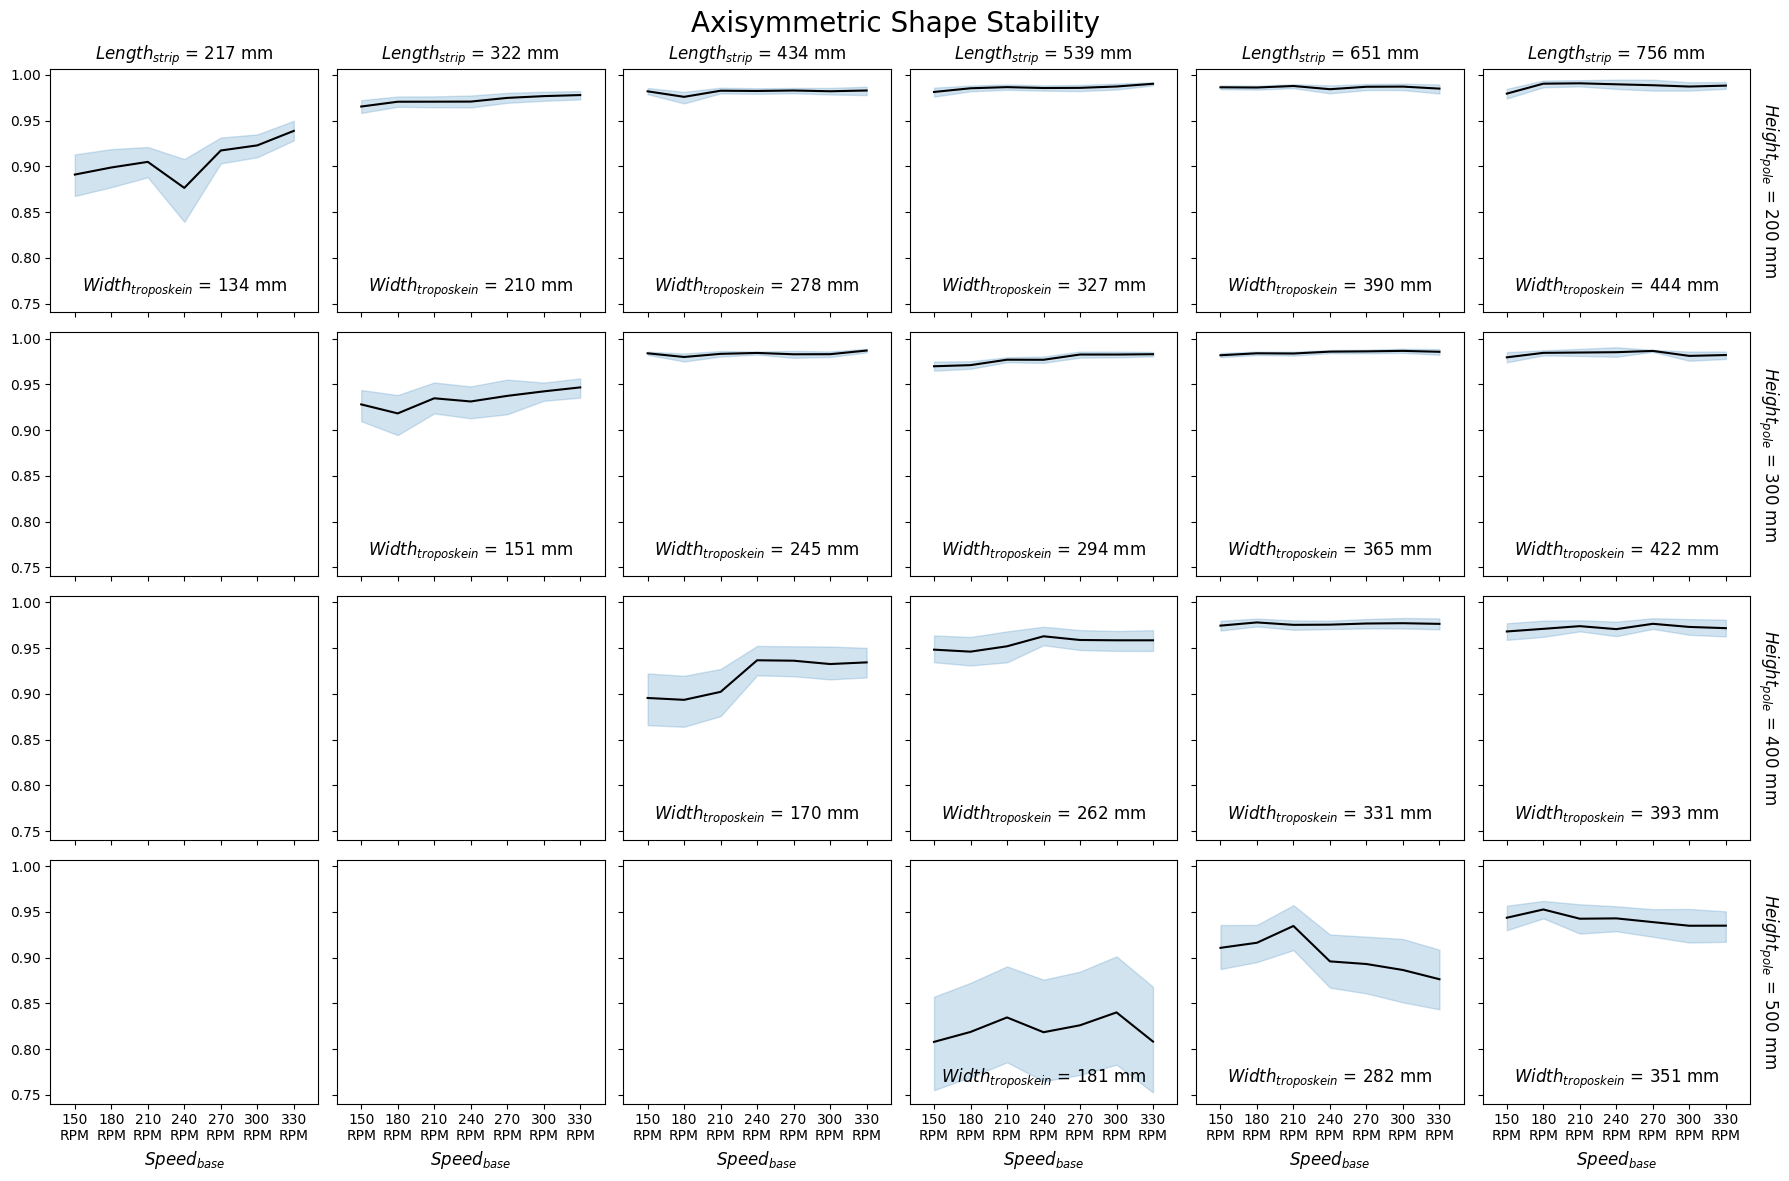

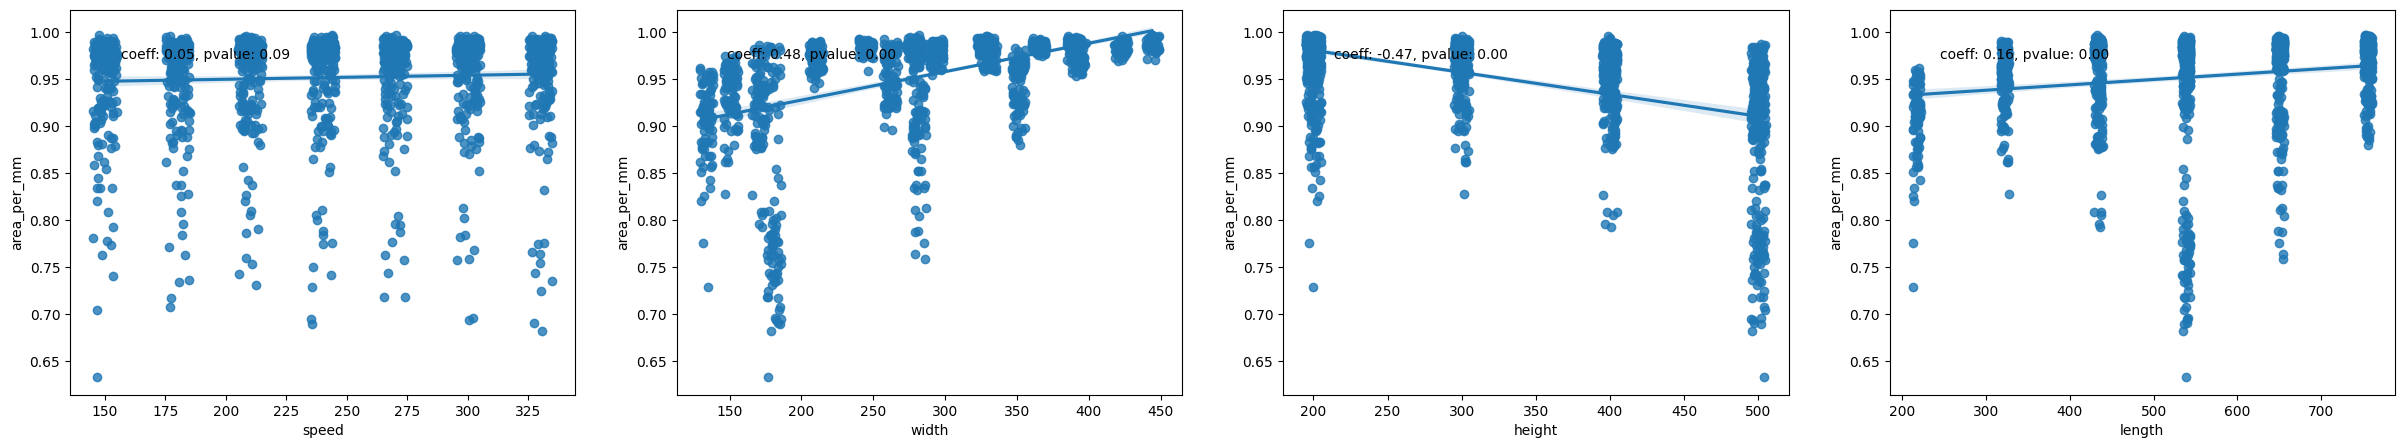

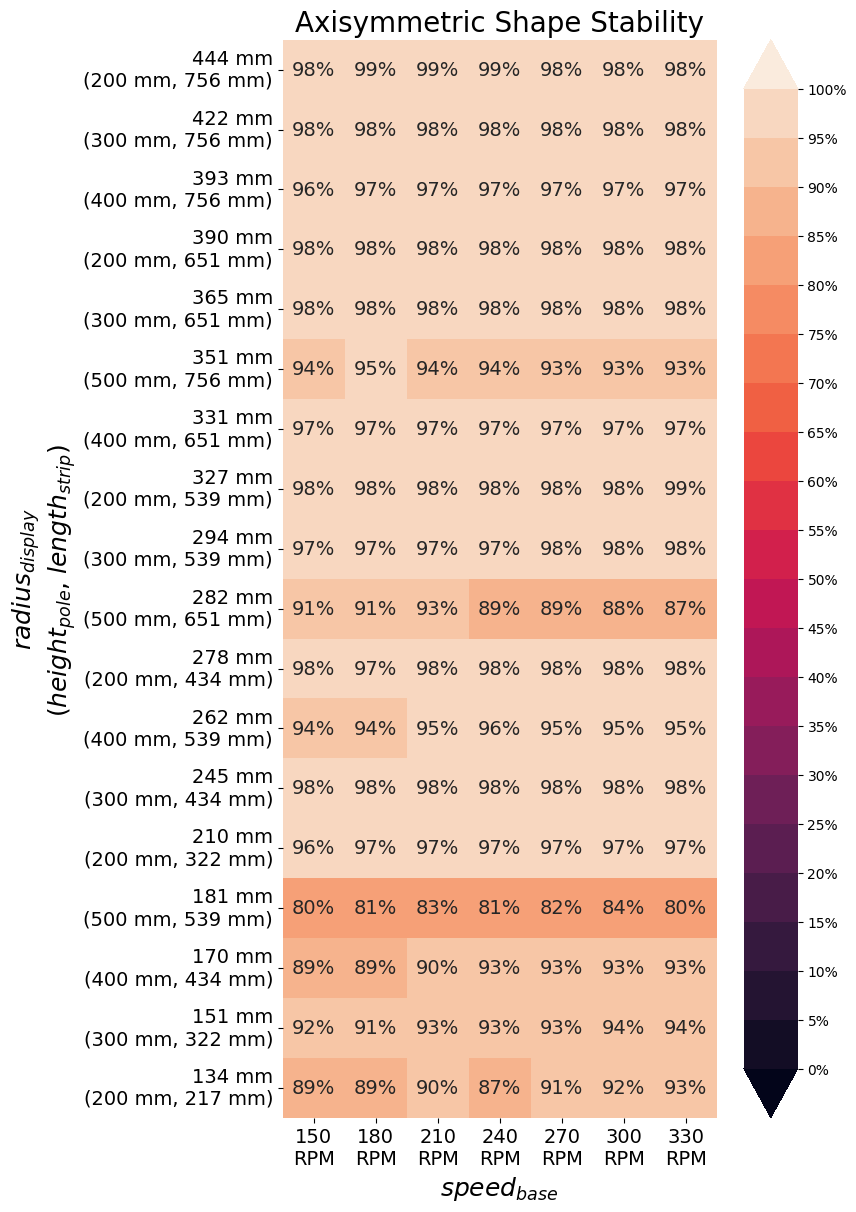

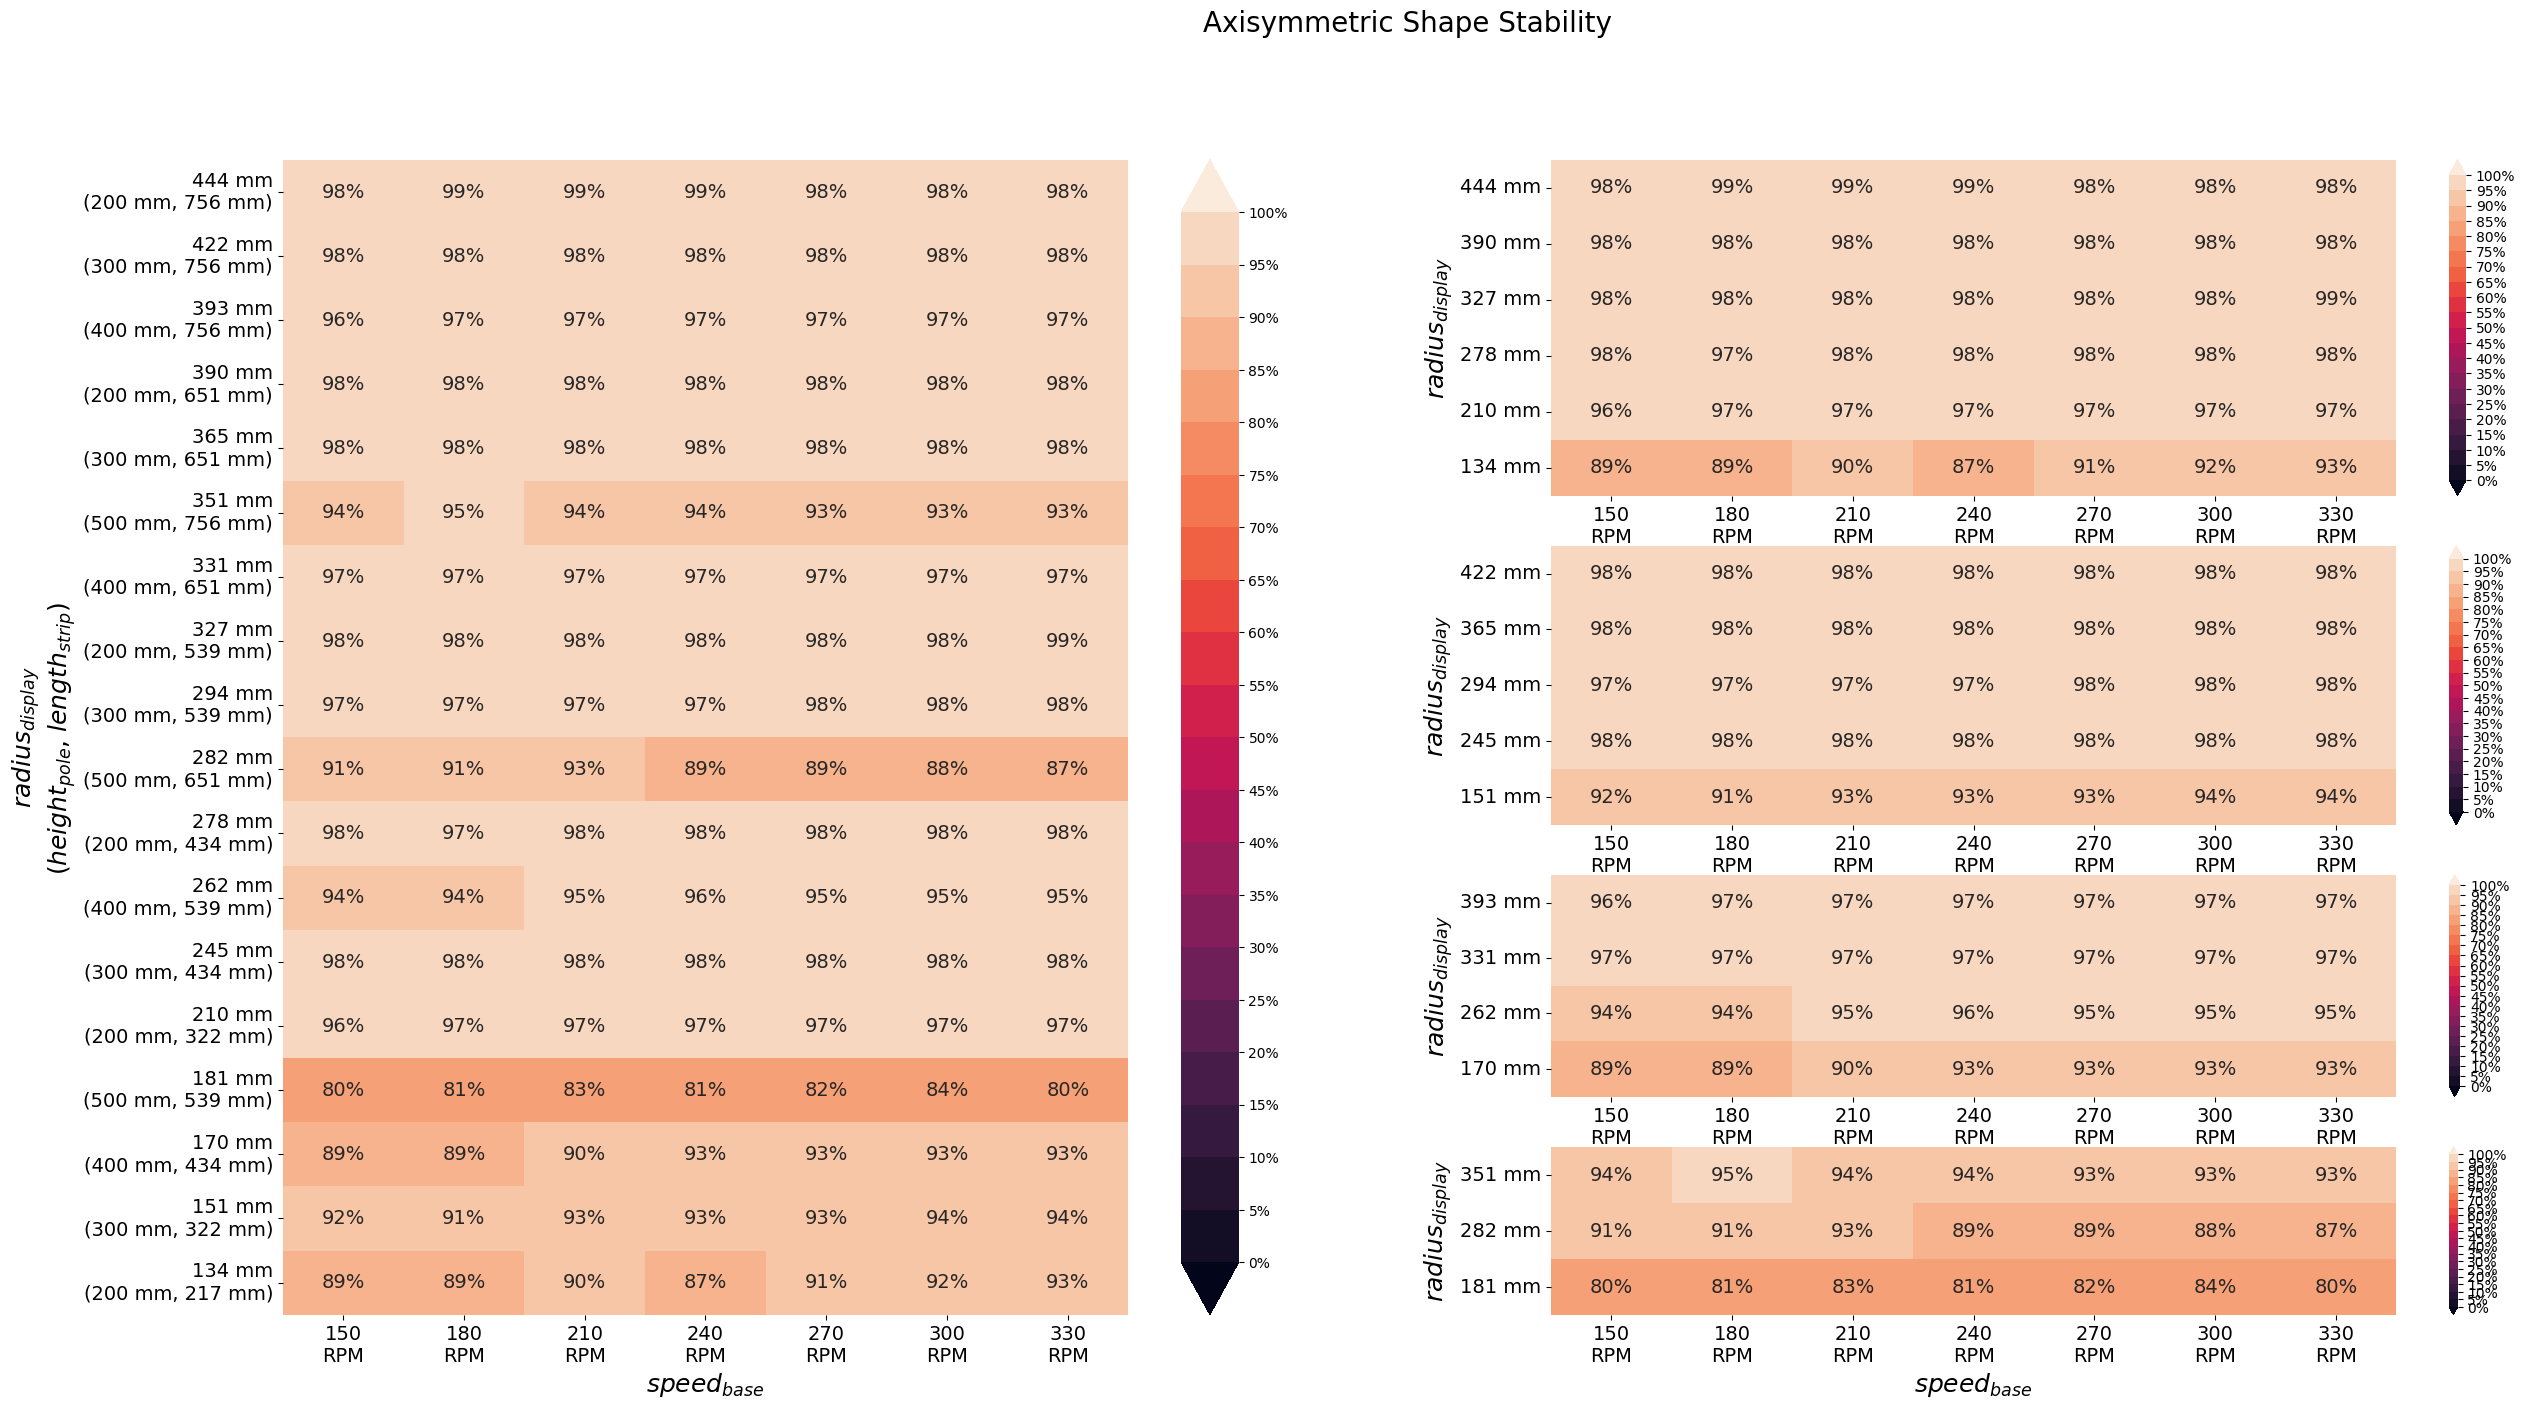

In [7]:

df_similarities = pd.read_pickle('../results/similarities.pkl')
df_similarities['height'] = df_similarities['height'].astype(int)
df_similarities['length'] = df_similarities['length'].astype(int)
df_similarities['width'] = df_similarities['width'].astype(int)
df_similarities['speed'] = df_similarities['speed'].astype(int)
df_similarities['area'] = df_similarities['area'].astype(float)
df_similarities['pcm'] = df_similarities['pcm'].astype(float)
df_similarities['df'] = df_similarities['df'].astype(float)
df_similarities['cl'] = df_similarities['cl'].astype(float)
df_similarities['mae'] = df_similarities['mae'].astype(float)
df_similarities['mape'] = 1 - df_similarities['mape'].astype(float)
df_similarities['mse'] = df_similarities['mse'].astype(float)
df_similarities['area_per_mm'] =  1 - df_similarities['area_per_mm'].astype(float)
df_similarities['pcm_per_mm'] = df_similarities['pcm_per_mm'].astype(float)
df_similarities['df_per_mm'] = df_similarities['df_per_mm'].astype(float)
df_similarities['cl_per_mm'] = df_similarities['cl_per_mm'].astype(float)
df_similarities['mae_per_mm'] = df_similarities['mae_per_mm'].astype(float)
df_similarities['mse_per_mm'] = df_similarities['mse_per_mm'].astype(float)
analyze(df=df_similarities,
        all_factors = all_factors_columns,
        factor = "width",
        variable = "area_per_mm",
        suptitle = "Axisymmetric Shape Stability",
        title = "", # mape
        fmt = ".3f",
        vmin = 0.0,
        vmax = 1.0,
        cmap = "rocket",
        facecolor="white",
        fontcolor="black",
        kwargs={'norm':norm})

# OVERALL DISPLAY QUALITY

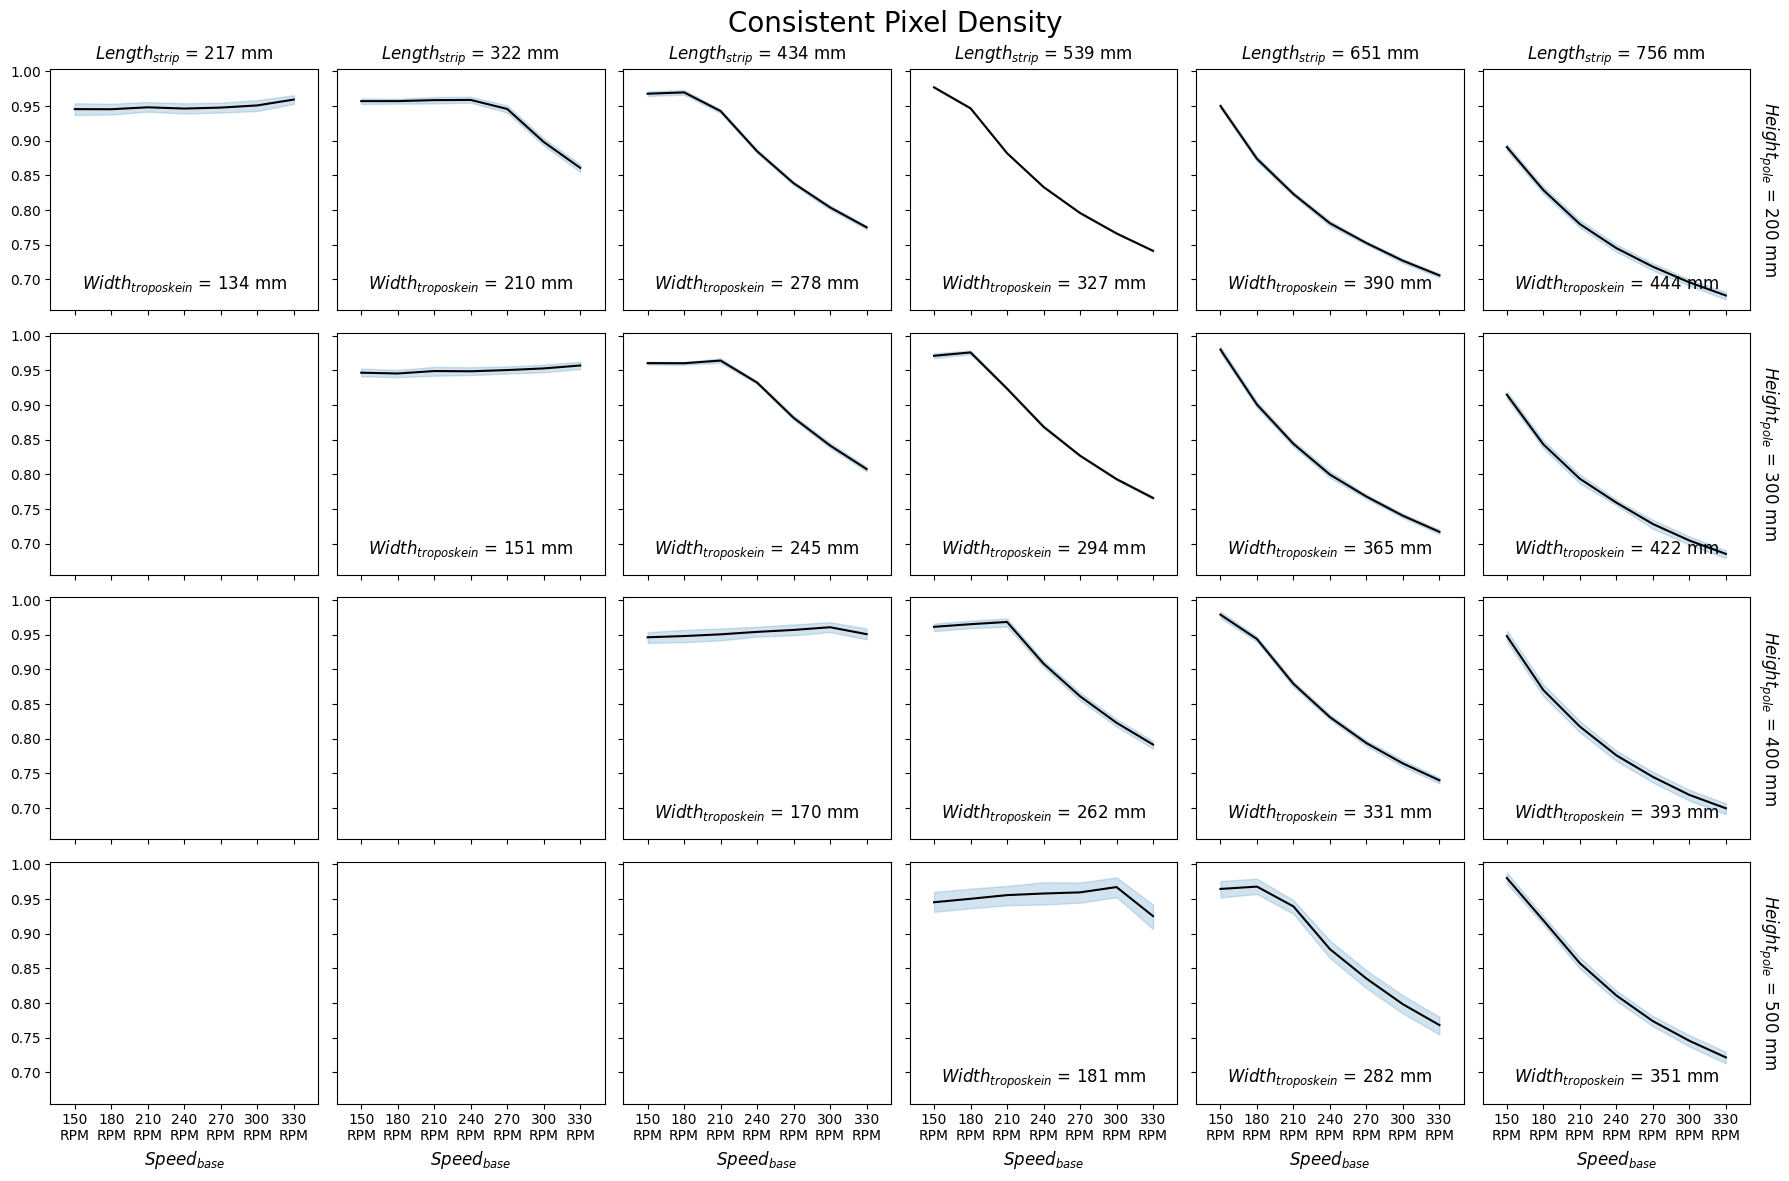

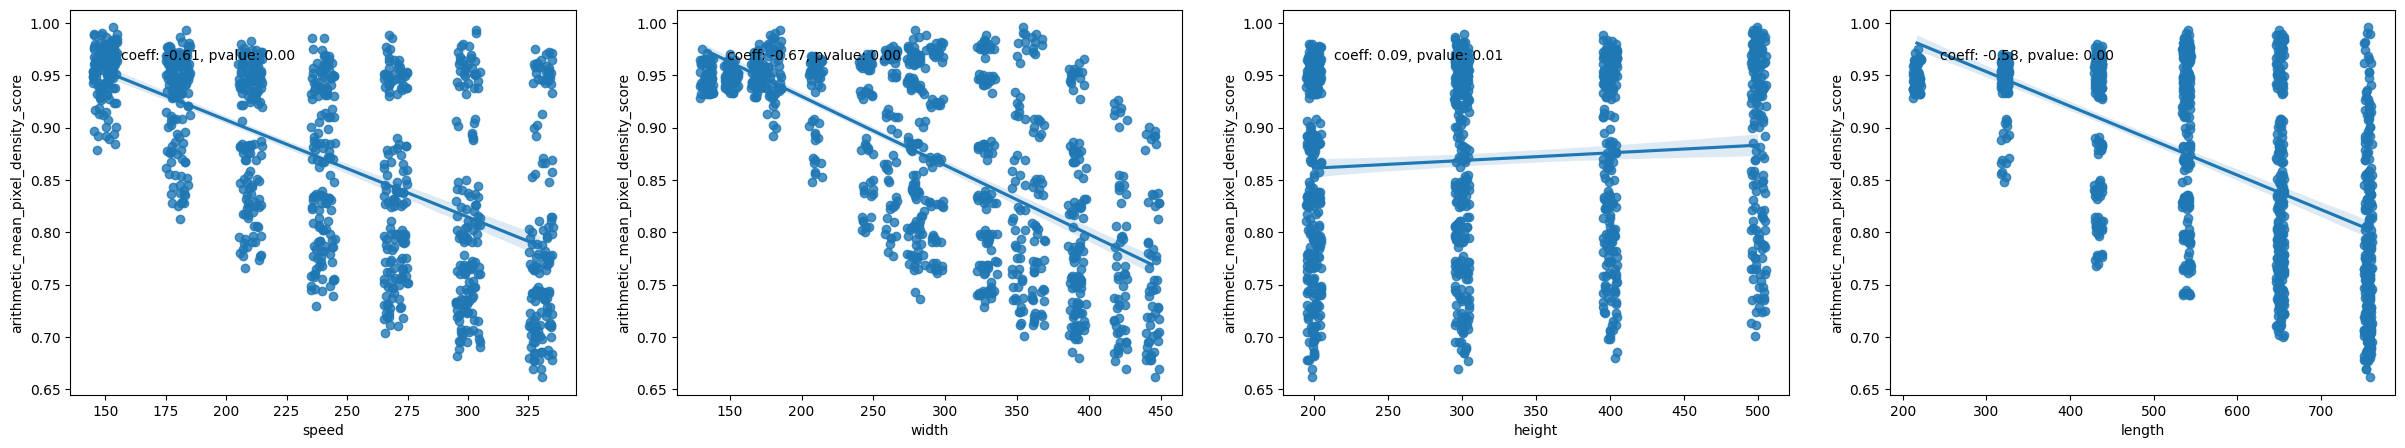

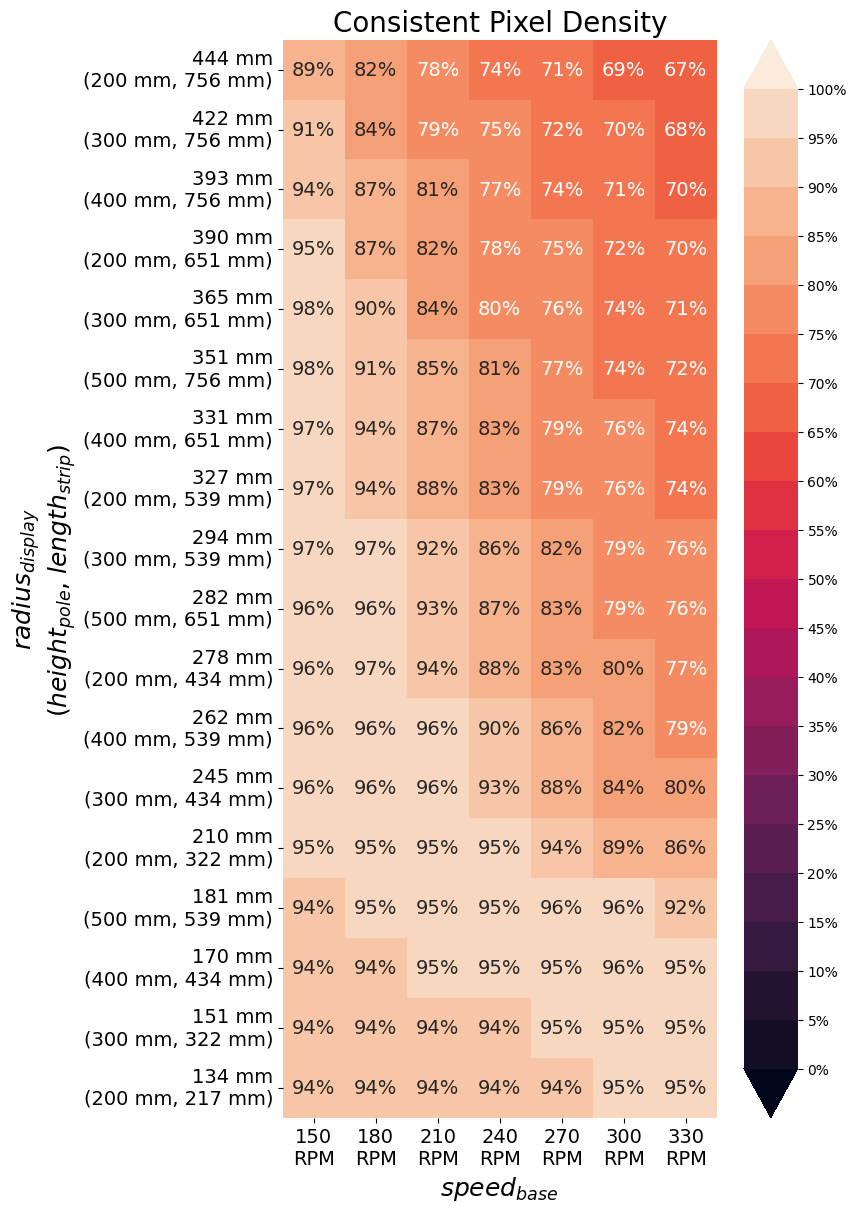

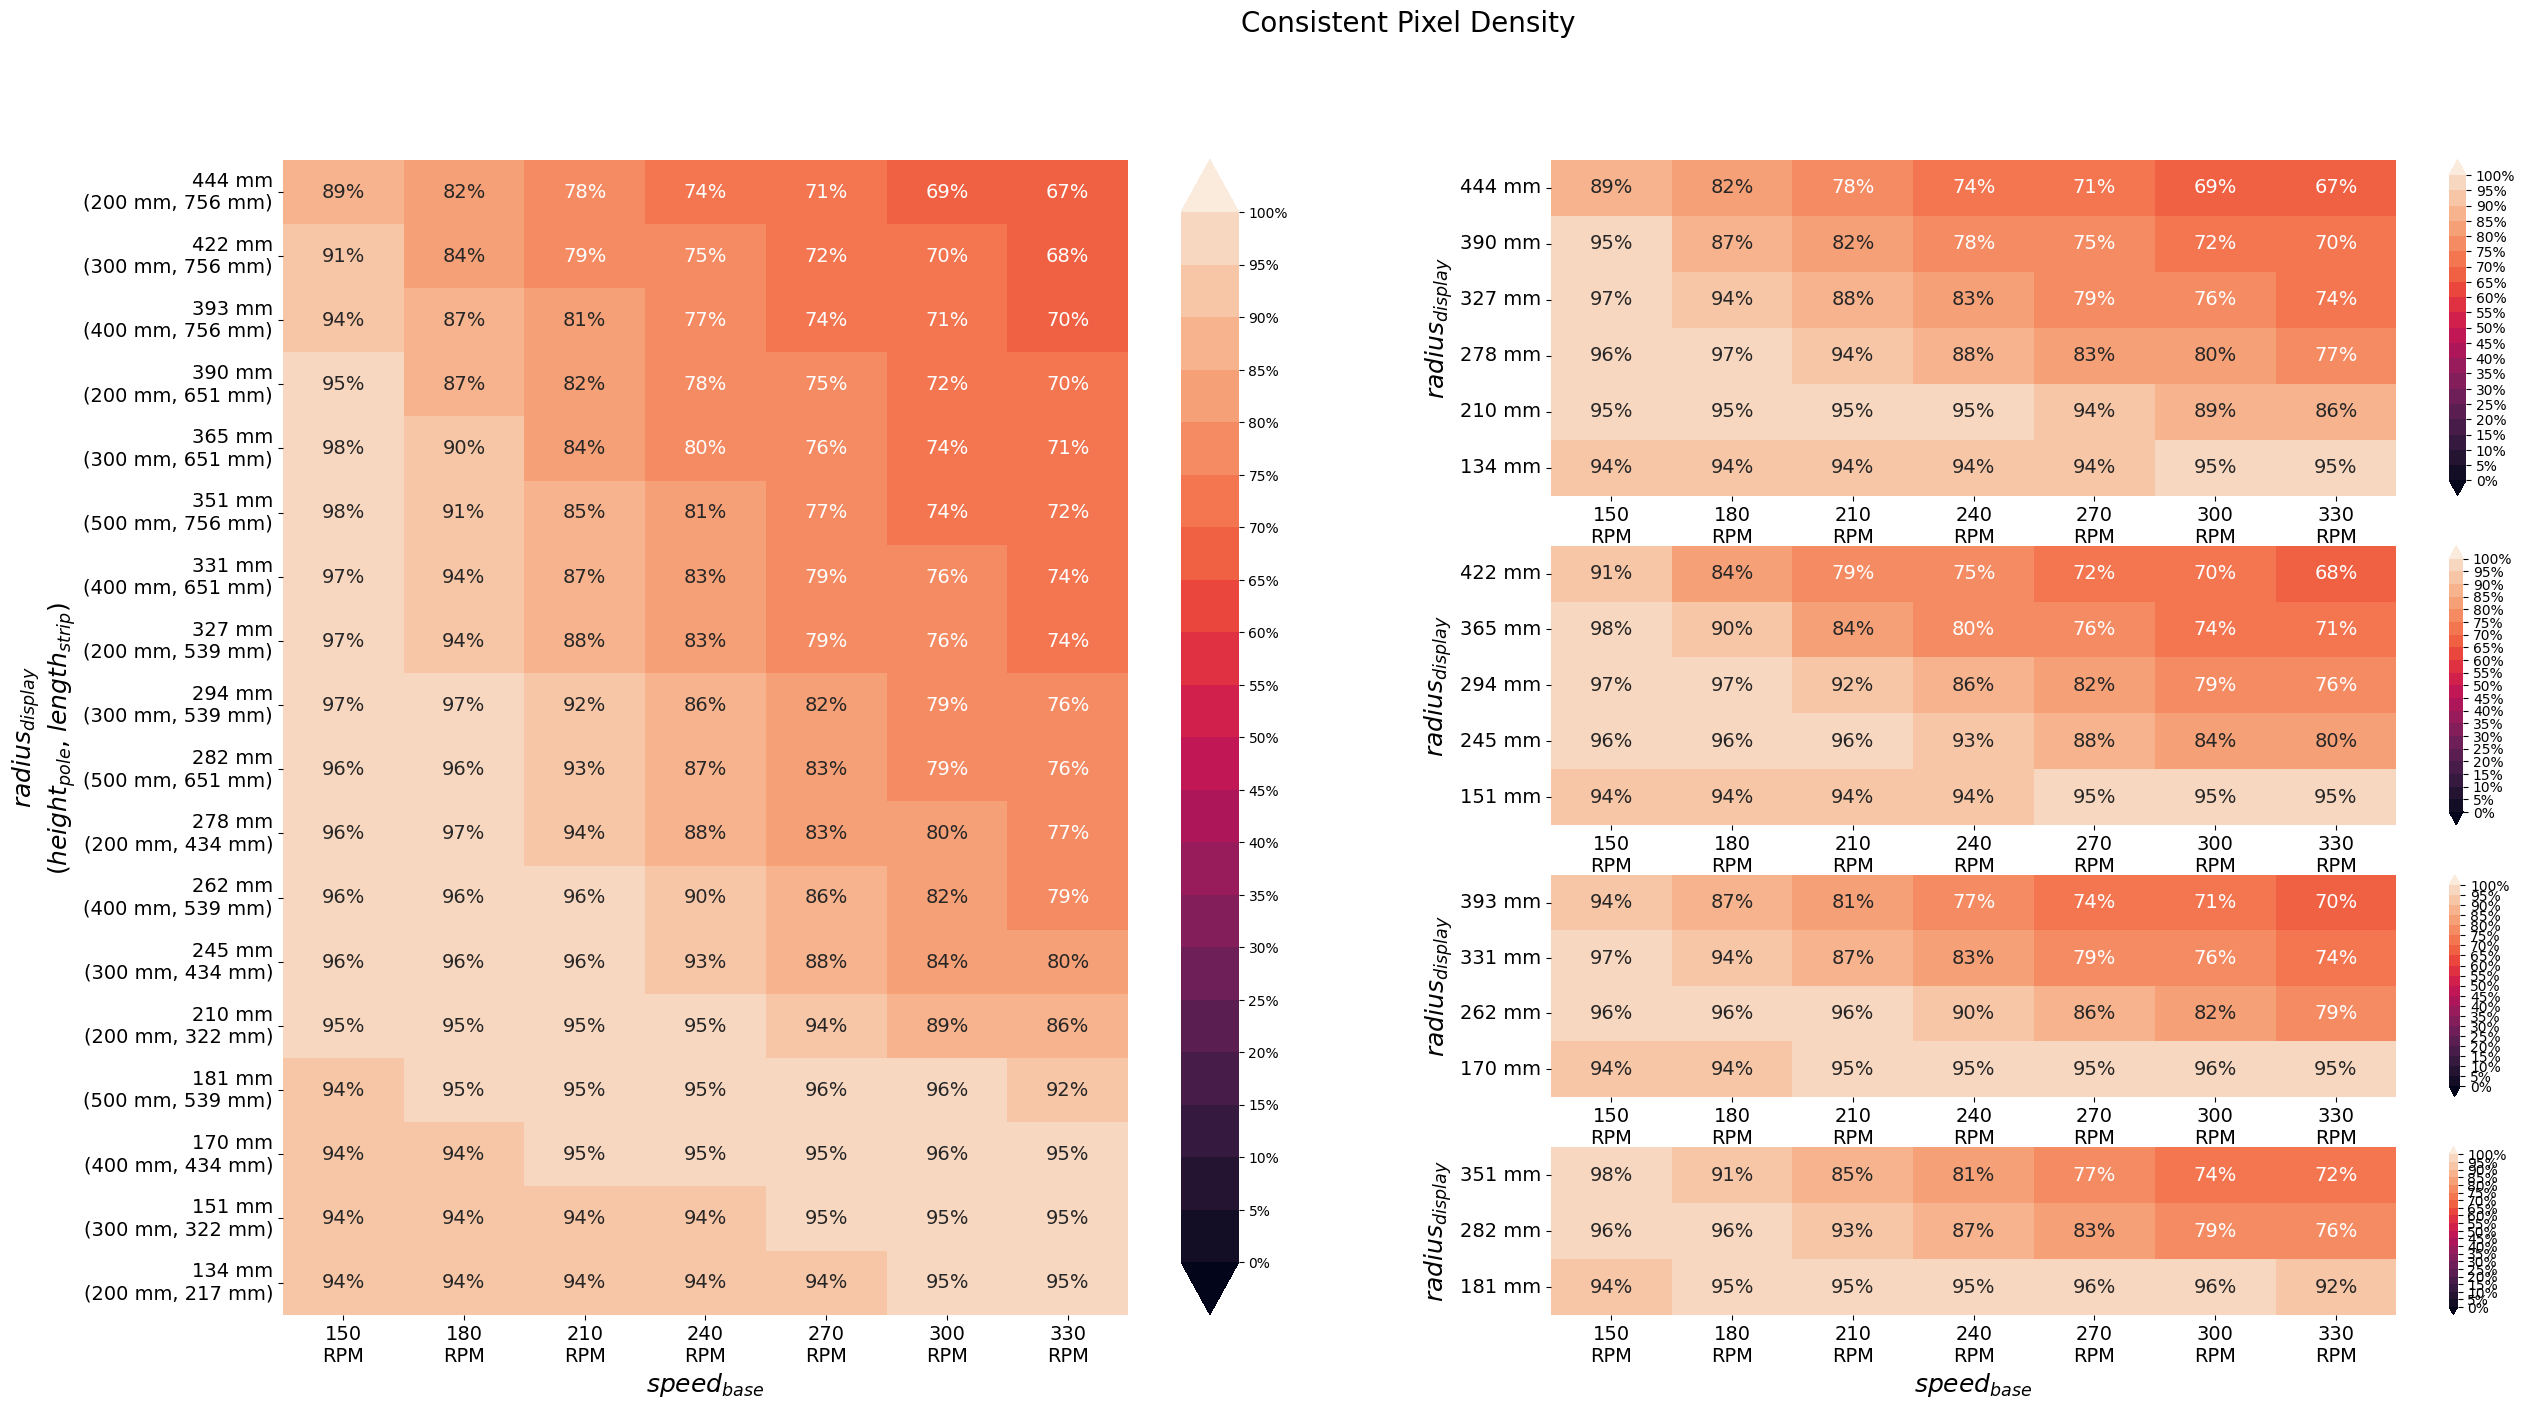

arithmetic_mean_pixel_density_score -> mean: 0.870, std: 0.091, min:0.661, max:0.996 95% CI: [0.865, 0.876]


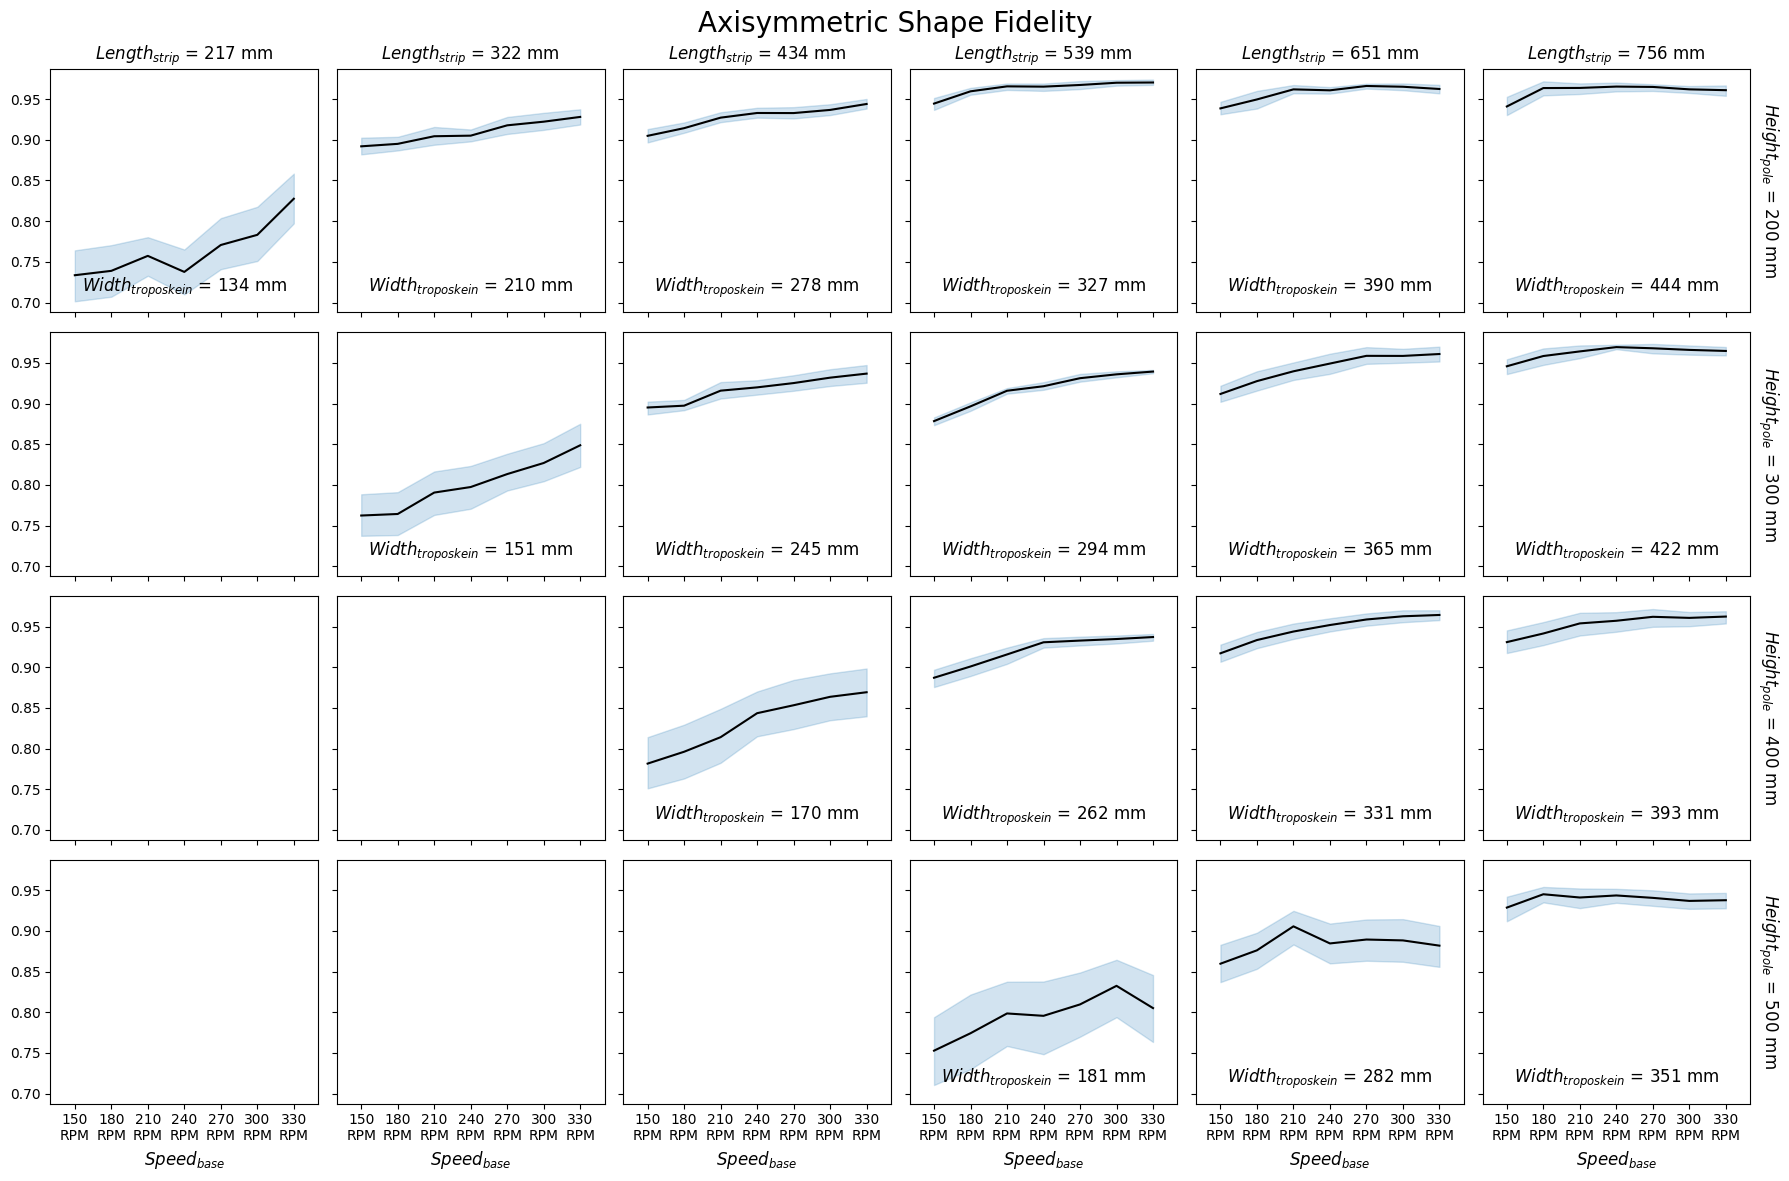

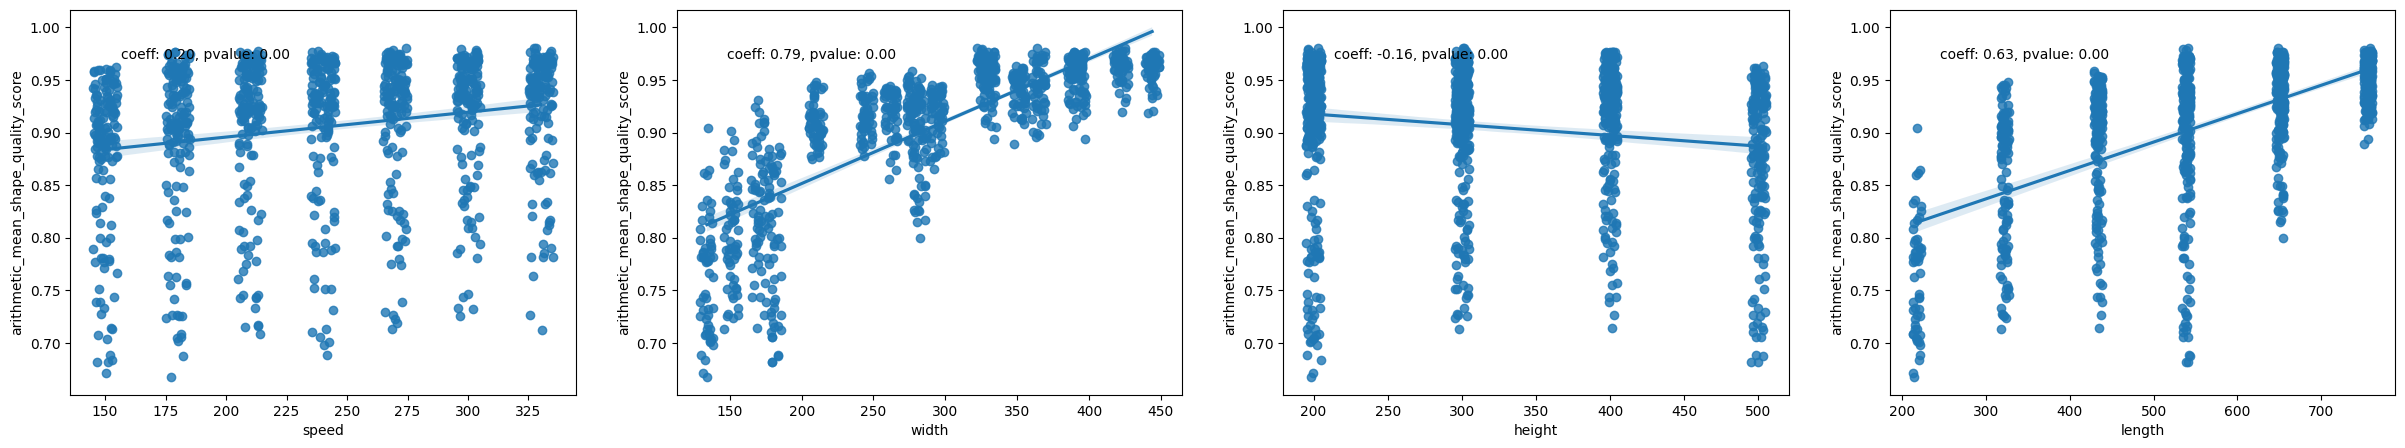

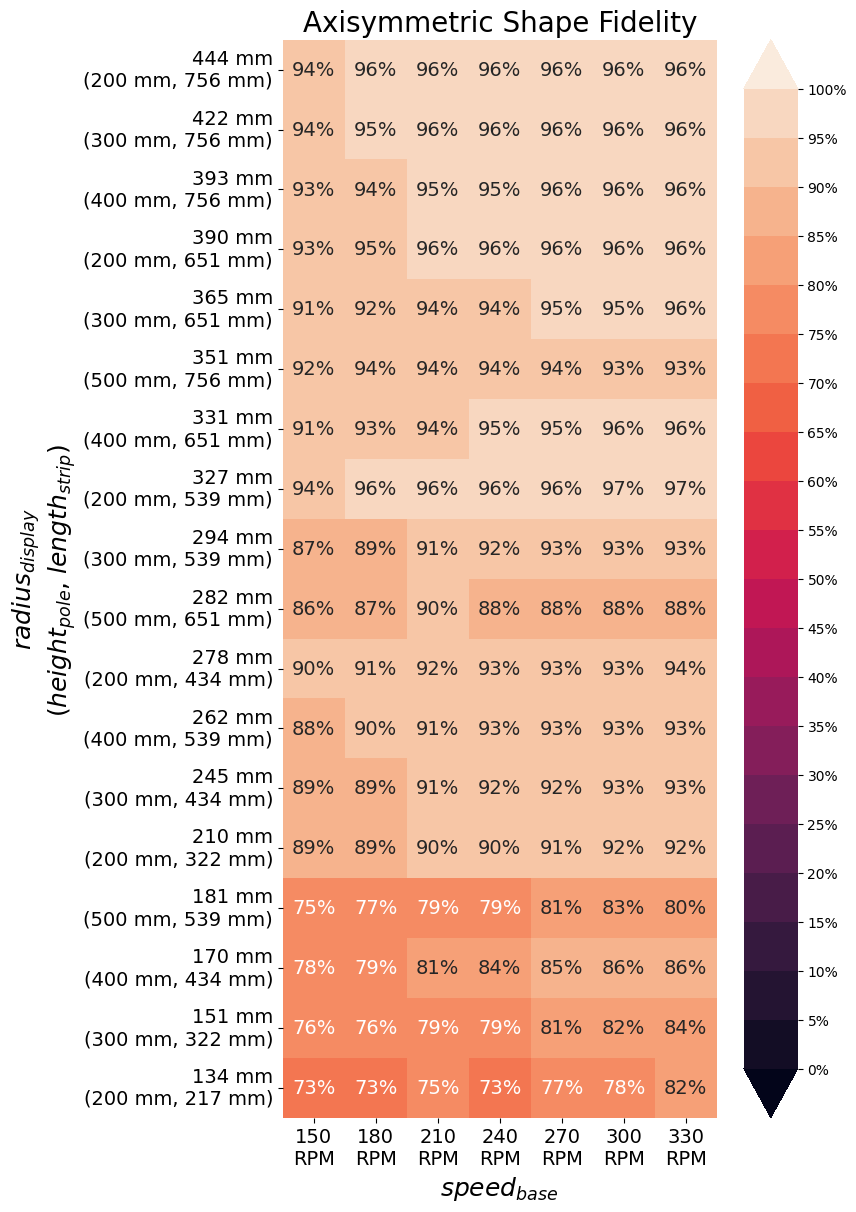

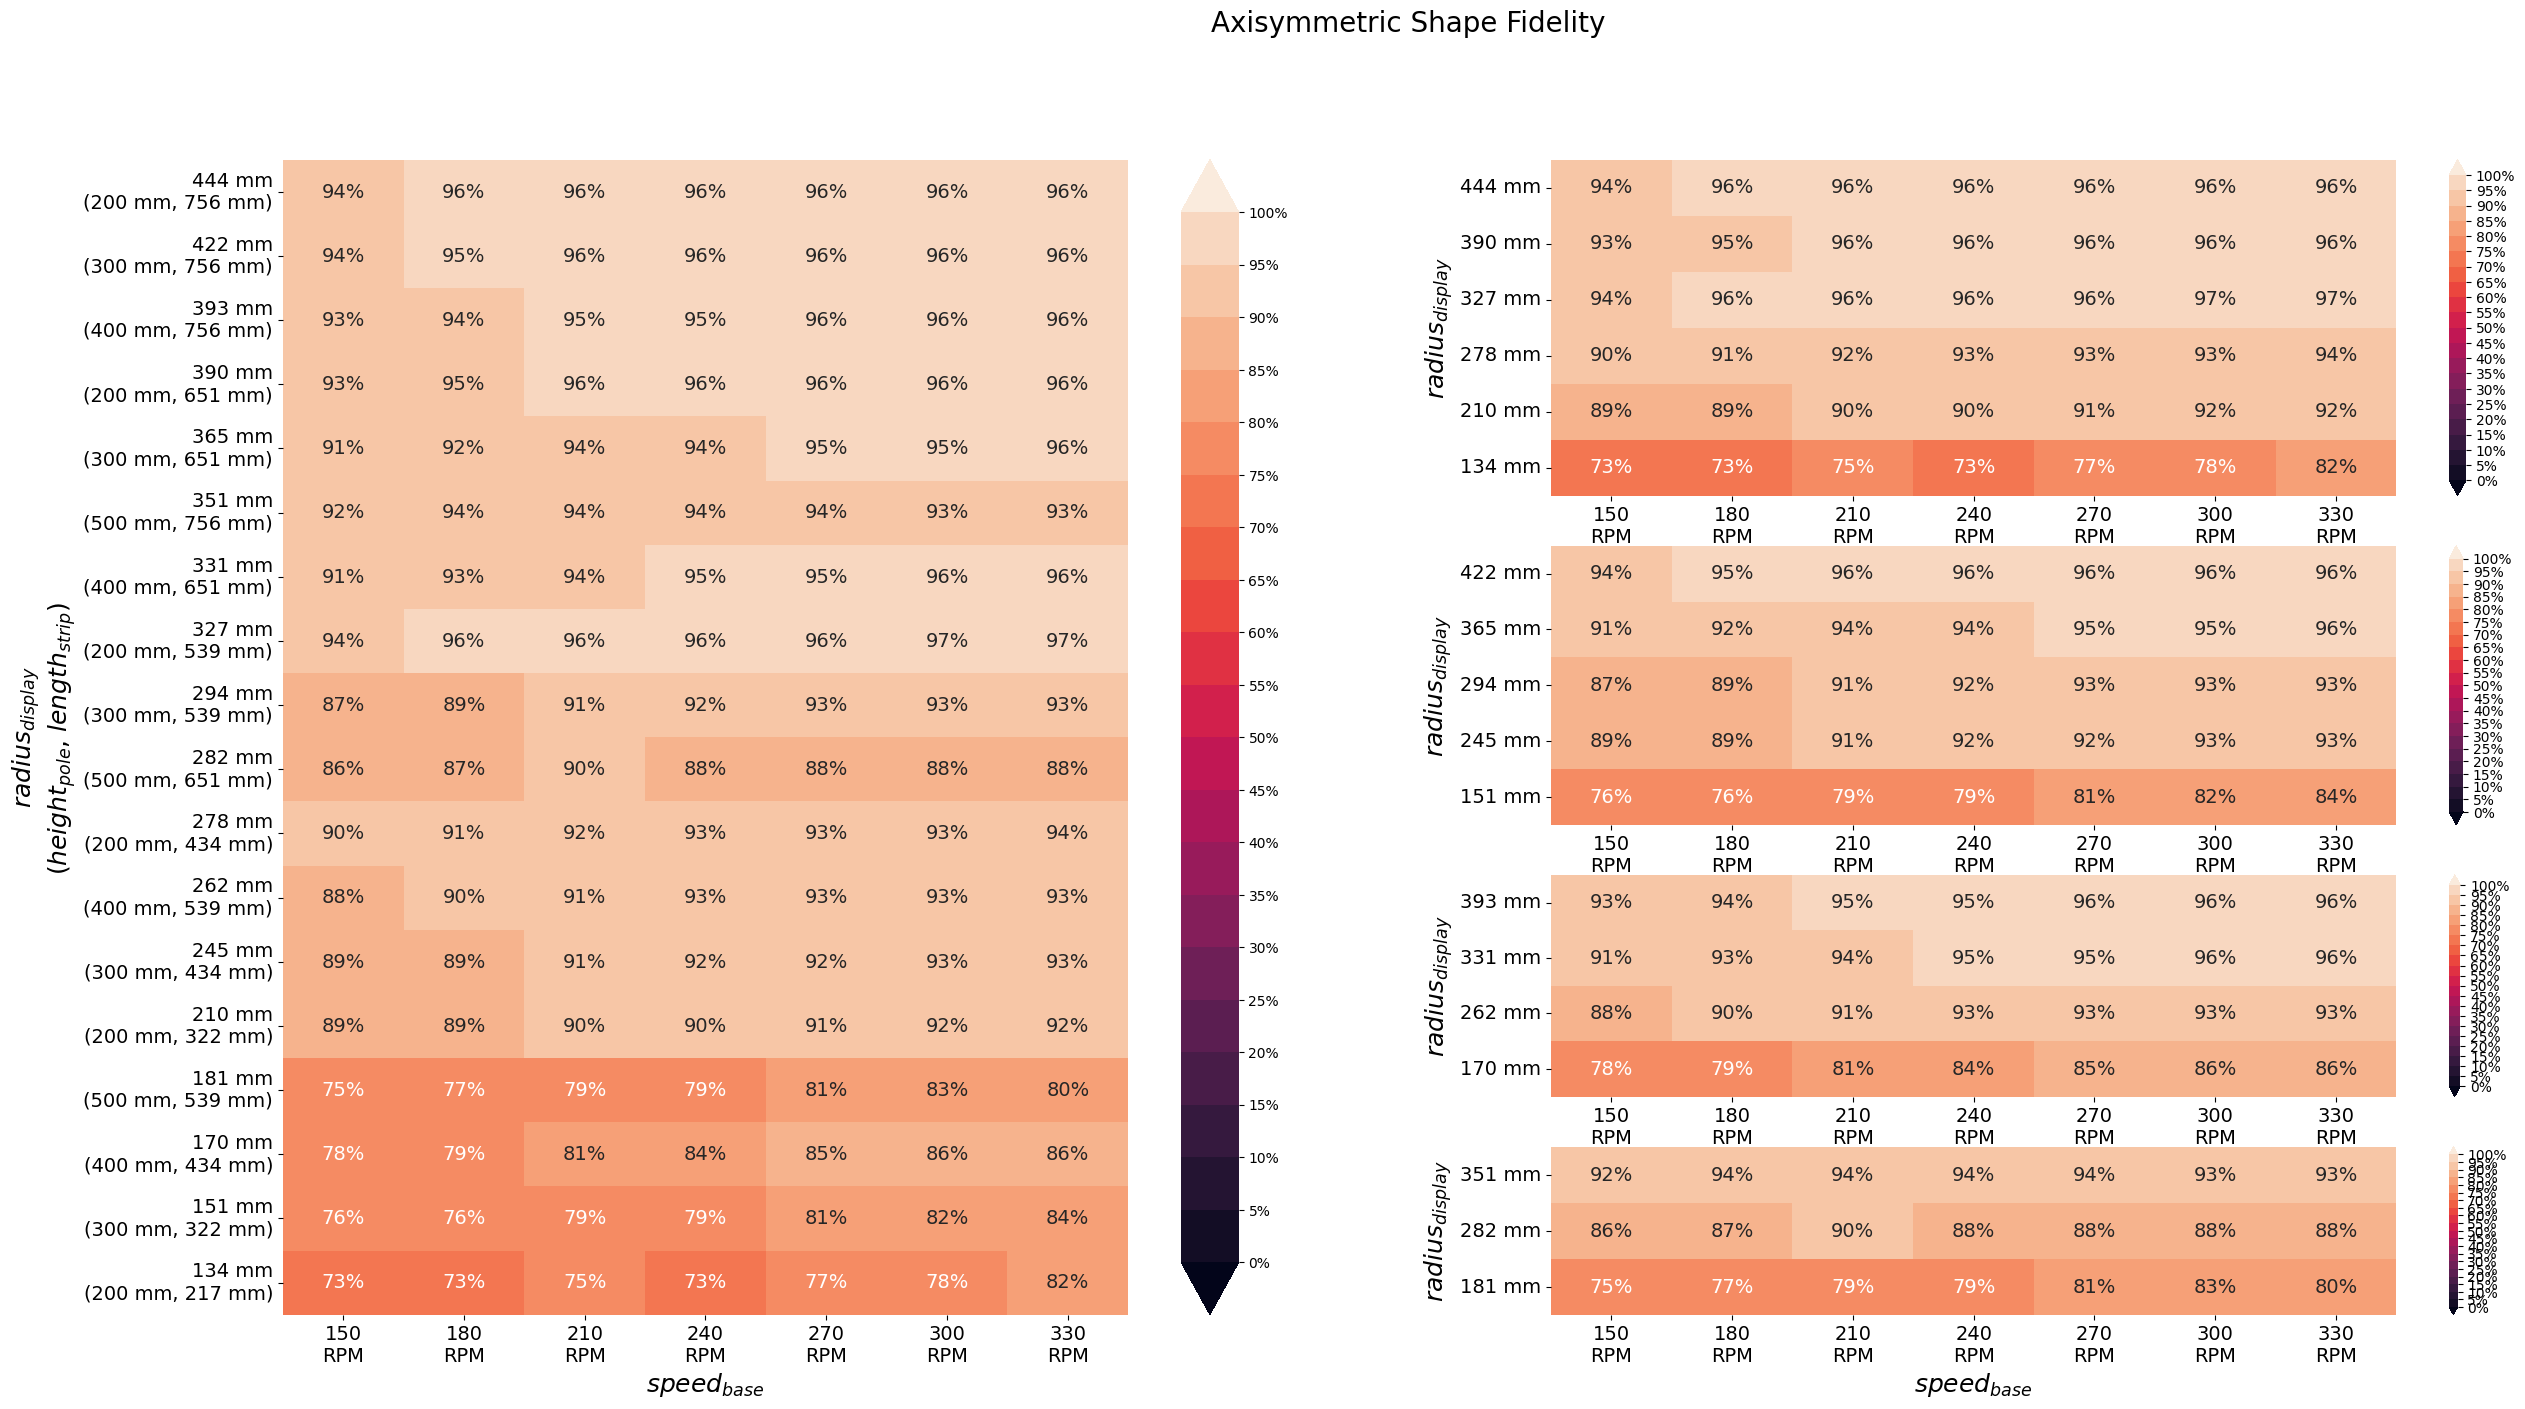

arithmetic_mean_shape_quality_score -> mean: 0.905, std: 0.069, min:0.667, max:0.981 95% CI: [0.901, 0.909]


In [8]:

import statsmodels.stats as sms
(df_curves.shape, df_fidelities.shape, df_similarities.shape)
def similarity_score(row):
    return df_similarities.loc[(df_similarities['speed'] == row['speed']) & (df_similarities['width'] == row['width']), 'area_per_mm'].mean()

s_similarities = df_curves.apply(similarity_score, axis=1)
# simple mean
df_curves['arithmetic_mean_pixel_density_score'] = (df_curves['x_width_success_rate'] + df_curves['missed_pixel_columns'])/2.0
df_curves['geometric_mean_pixel_density_score'] =  np.sqrt(df_curves['x_width_success_rate']) * np.sqrt(df_curves['missed_pixel_columns'])
df_curves['harmonic_mean_pixel_density_score'] = 2/( 1/df_curves['x_width_success_rate'] + 1/df_curves['missed_pixel_columns'])
current_variable = 'arithmetic_mean_pixel_density_score'
analyze(df=df_curves,
        all_factors = all_factors_columns,
        factor = "width",
        variable = current_variable,
        #suptitle = "Pixel Density Score (${\overline{X}}_{geometric}$)",
        suptitle = "Consistent Pixel Density",
        title = "", # mape
        fmt = ".3f",
        vmin = 0.0,
        vmax = 1.0,
        cmap = "rocket",
        facecolor="white",
        fontcolor="black",
        kwargs={'norm':norm})

current_variable_mean = np.mean(df_curves[current_variable])
current_variable_std = np.std(df_curves[current_variable])
current_variable_min = np.min(df_curves[current_variable])
current_variable_max = np.max(df_curves[current_variable])
current_variable_lci, current_variable_hci = sms.weightstats.DescrStatsW(df_curves[current_variable]).tconfint_mean()
print("%s -> mean: %.3f, std: %.3f, min:%.3f, max:%.3f 95%% CI: [%.3f, %.3f]"  %(current_variable, current_variable_mean, current_variable_std, current_variable_min, current_variable_max, current_variable_lci, current_variable_hci))



df_curves['arithmetic_mean_shape_quality_score'] = (s_similarities + df_fidelities['area'])/2.0
df_curves['geometric_mean_shape_quality_score'] =  np.sqrt(s_similarities) * np.sqrt(df_fidelities['area'])
df_curves['harmonic_mean_shape_quality_score'] = 2/( 1/s_similarities + 1/df_fidelities['area'])
current_variable = 'arithmetic_mean_shape_quality_score'
analyze(df=df_curves,
        all_factors = all_factors_columns,
        factor = "width",
        variable = current_variable,
        #suptitle = "Shape Quality Score (${\overline{X}}_{geometric}$)",
        suptitle = "Axisymmetric Shape Fidelity",
        title = "", # mape
        fmt = ".3f",
        vmin = 0.0,
        vmax = 1.0,
        cmap = "rocket",
        facecolor="white",
        fontcolor="black",
        kwargs={'norm':norm})

current_variable_mean = np.mean(df_curves[current_variable])
current_variable_std = np.std(df_curves[current_variable])
current_variable_min = np.min(df_curves[current_variable])
current_variable_max = np.max(df_curves[current_variable])
current_variable_lci, current_variable_hci = sms.weightstats.DescrStatsW(df_curves[current_variable]).tconfint_mean()
print("%s -> mean: %.3f, std: %.3f, min:%.3f, max:%.3f 95%% CI: [%.3f, %.3f]"  %(current_variable, current_variable_mean, current_variable_std, current_variable_min, current_variable_max, current_variable_lci, current_variable_hci))

# df_curves['arithmetic_mean_score'] = (s_similarities + df_curves['x_width_success_rate'] + df_curves['missed_pixel_columns'] + df_fidelities['area'])/4.0
# df_curves['geometric_mean_score'] = np.sqrt(s_similarities) * np.sqrt(df_curves['x_width_success_rate']) * np.sqrt(df_curves['missed_pixel_columns']) * np.sqrt(df_fidelities['area'])
# df_curves['harmonic_mean_score'] = 4/(1/s_similarities + 1/df_curves['x_width_success_rate'] + 1/df_curves['missed_pixel_columns'] + 1/df_fidelities['area'])

# analyze(df=df_curves,
#         all_factors = all_factors_columns,
#         factor = "width",
#         variable = "geometric_mean_score",
#         suptitle = "Shape Display Quality Score (${\overline{X}}_{geometric}$)",
#         title = "", # mape
#         fmt = ".3f",
#         vmin = 0.0,
#         vmax = 1.0,
#         cmap = "rocket",
#         facecolor="black",
#         fontcolor="white",
#         kwargs={'norm':norm})

# REGRESSION AND CORRELATION

<module 'matplotlib._version' from 'C:\\Users\\maxd5\\AppData\\Roaming\\Python\\Python38\\site-packages\\matplotlib\\_version.py'>
['speed', 'width', 'height', 'length']
missed_pixel_columns -> mean: 0.795, std: 0.202, min:0.375, max:1.000 95% CI: [0.783, 0.808]


n      r           CI95%      p-val       BF10  power
pearson  1008 -0.583  [-0.62, -0.54]  1.145e-92  9.828e+88    1.0

speed x missed_pixel_columns: -0.001964y - 1.266948 [r(1008)=-0.582593, p=0.000000]
x_width_success_rate -> mean: 0.945, std: 0.034, min:0.825, max:1.000 95% CI: [0.943, 0.947]


n      r         CI95%      p-val       BF10  power
pearson  1008  0.196  [0.14, 0.25]  3.715e-10  1.283e+07    1.0

speed x x_width_success_rate: 0.000110y - 0.918476 [r(1008)=0.195679, p=0.000000]
area -> mean: 0.856, std: 0.111, min:0.436, max:0.983 95% CI: [0.849, 0.863]


n      r         CI95%      p-val       BF10  power
pearson  1008  0.235  [0.18, 0.29]  4.554e-14  8.639e+10    1.0

speed x area: 0.000434y - 0.752304 [r(1008)=0.234585, p=0.000000]
area_per_mm -> mean: 0.952, std: 0.055, min:0.633, max:0.997 95% CI: [0.949, 0.954]


n      r         CI95%  p-val   BF10  power
pearson  1386  0.046  [-0.01, 0.1]  0.085  0.148  0.406

speed x area_per_mm: 0.000043y - 0.941314 [r(1386)=0.046234, p=0.085319]
missed_pixel_columns -> mean: 0.795, std: 0.202, min:0.375, max:1.000 95% CI: [0.783, 0.808]


n      r          CI95%       p-val        BF10  power
pearson  1008 -0.727  [-0.75, -0.7]  1.936e-166  3.331e+162    1.0

width x missed_pixel_columns: -0.001593y - 1.258242 [r(1008)=-0.727000, p=0.000000]
x_width_success_rate -> mean: 0.945, std: 0.034, min:0.825, max:1.000 95% CI: [0.943, 0.947]


n      r         CI95%       p-val        BF10  power
pearson  1008  0.753  [0.73, 0.78]  4.110e-185  1.391e+181    1.0

width x x_width_success_rate: 0.000275y - 0.865056 [r(1008)=0.753077, p=0.000000]
area -> mean: 0.856, std: 0.111, min:0.436, max:0.983 95% CI: [0.849, 0.863]


n     r         CI95%       p-val        BF10  power
pearson  1008  0.75  [0.72, 0.78]  1.631e-182  3.561e+178    1.0

width x area: 0.000900y - 0.594818 [r(1008)=0.749632, p=0.000000]
area_per_mm -> mean: 0.952, std: 0.055, min:0.633, max:0.997 95% CI: [0.949, 0.954]


n      r         CI95%      p-val       BF10  power
pearson  1386  0.477  [0.44, 0.52]  1.334e-79  8.754e+75    1.0

width x area_per_mm: 0.000302y - 0.867302 [r(1386)=0.476842, p=0.000000]
missed_pixel_columns -> mean: 0.795, std: 0.202, min:0.375, max:1.000 95% CI: [0.783, 0.808]


n      r         CI95%      p-val       BF10  power
pearson  672  0.359  [0.29, 0.42]  6.241e-22  5.728e+18    1.0

height x missed_pixel_columns: 0.000638y - 0.499017 [r(672)=0.359496, p=0.000000]
x_width_success_rate -> mean: 0.945, std: 0.034, min:0.825, max:1.000 95% CI: [0.943, 0.947]


n      r           CI95%      p-val       BF10  power
pearson  672 -0.384  [-0.45, -0.32]  5.550e-25  5.922e+21    1.0

height x x_width_success_rate: -0.000097y - 0.993038 [r(672)=-0.383596, p=0.000000]
area -> mean: 0.856, std: 0.111, min:0.436, max:0.983 95% CI: [0.849, 0.863]


n      r           CI95%      p-val       BF10  power
pearson  672 -0.341  [-0.41, -0.27]  8.367e-20  4.559e+16    1.0

height x area: -0.000219y - 0.977545 [r(672)=-0.341386, p=0.000000]
area_per_mm -> mean: 0.952, std: 0.055, min:0.633, max:0.997 95% CI: [0.949, 0.954]


n     r           CI95%      p-val       BF10  power
pearson  882 -0.59  [-0.63, -0.55]  7.030e-84  1.781e+80    1.0

height x area_per_mm: -0.000320y - 1.067019 [r(882)=-0.590146, p=0.000000]
missed_pixel_columns -> mean: 0.795, std: 0.202, min:0.375, max:1.000 95% CI: [0.783, 0.808]


n      r           CI95%      p-val       BF10  power
pearson  672 -0.473  [-0.53, -0.41]  8.207e-39  2.964e+35    1.0

length x missed_pixel_columns: -0.001060y - 1.409509 [r(672)=-0.473291, p=0.000000]
x_width_success_rate -> mean: 0.945, std: 0.034, min:0.825, max:1.000 95% CI: [0.943, 0.947]


n      r        CI95%      p-val       BF10  power
pearson  672  0.369  [0.3, 0.43]  3.631e-23  9.506e+19    1.0

length x x_width_success_rate: 0.000118y - 0.882195 [r(672)=0.369500, p=0.000000]
area -> mean: 0.856, std: 0.111, min:0.436, max:0.983 95% CI: [0.849, 0.863]


n      r         CI95%      p-val       BF10  power
pearson  672  0.418  [0.35, 0.48]  8.488e-30  3.445e+26    1.0

length x area: 0.000338y - 0.681504 [r(672)=0.417977, p=0.000000]
area_per_mm -> mean: 0.952, std: 0.055, min:0.633, max:0.997 95% CI: [0.949, 0.954]


n      r         CI95%      p-val       BF10  power
pearson  882  0.204  [0.14, 0.27]  9.138e-10  5.683e+06    1.0

length x area_per_mm: 0.000150y - 0.857848 [r(882)=0.204310, p=0.000000]


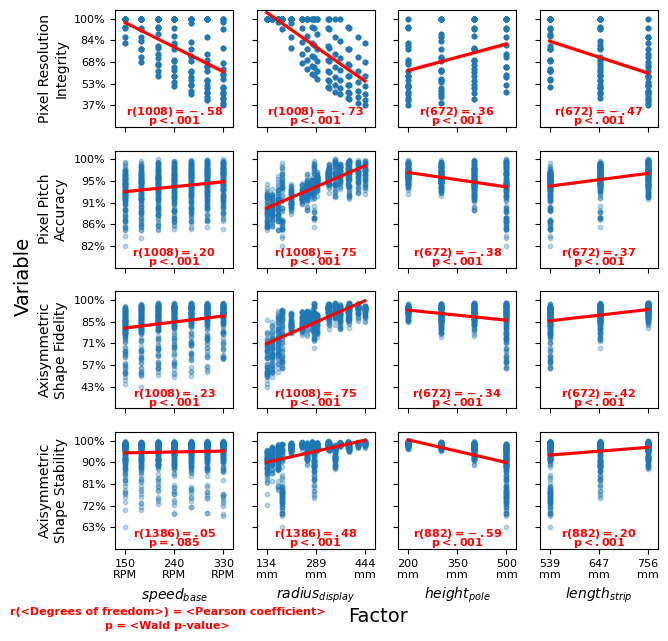

factor                         speed  width  height  length
variable                                                   
Pixel Resolution\nIntegrity   -0.583 -0.727   0.359  -0.473
Pixel Pitch\nAccuracy          0.196  0.753  -0.384   0.369
Axisymmetric\nShape Fidelity   0.235  0.750  -0.341   0.418
Axisymmetric\nShape Stability  0.046  0.477  -0.590   0.204


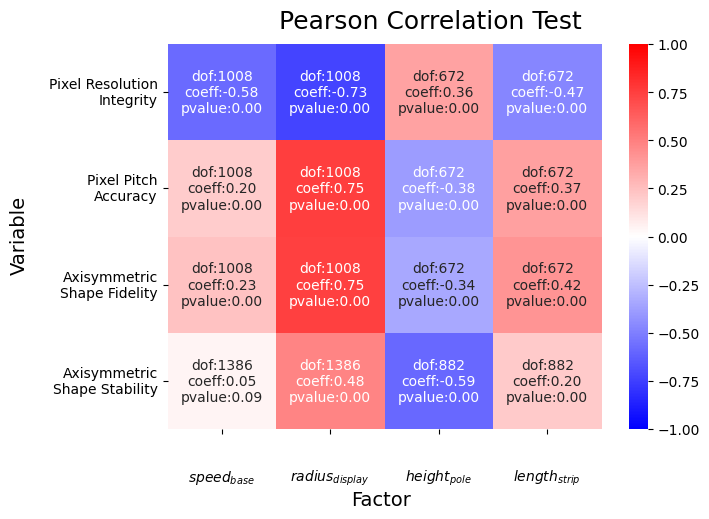

In [9]:
from pandas.api.types import CategoricalDtype
import matplotlib.patheffects as pe
import matplotlib.ticker as mtick
import statsmodels.api as sma
import statsmodels.stats as sms

print(mplt._version)
print(all_factors_columns)
#factors_category = CategoricalDtype(categories=all_factors_columns, ordered=True)
names = ['Pixel Resolution\nIntegrity', 'Pixel Pitch\nAccuracy', 'Axisymmetric\nShape Accuracy', 'Axisymmetric\nShape Stability']
#variables = ['missed_pixel_columns', 'x_width_success_rate', 'mape', 'mape']
variables = ['missed_pixel_columns', 'x_width_success_rate', 'area', 'area_per_mm']
dfs = [df_curves, df_curves, df_fidelities, df_similarities]
#names_category = CategoricalDtype(categories=names, ordered=True)

df_corrs = pd.DataFrame({
    'factor': CategoricalDtype(categories=all_factors_columns, ordered=True),
    'variable': CategoricalDtype(categories=names, ordered=True),
    'dof': pd.Series(dtype='int'),
    'coeff': pd.Series(dtype='float'),
    'pvalue': pd.Series(dtype='float'),
})


corr_method = "spearman"
fig, axes = plt.subplots(figsize=(7,7), nrows=len(variables), ncols=len(all_factors_columns), sharey='row', sharex='col')
for i in range(len(all_factors_columns)):
    current_factor = all_factors_columns[i]
    current_factor_postfix = factor_postfixes[i]
    current_factor_label = factor_labels[i]
    for j in range(len(variables)):
        current_df = dfs[j].copy()
        current_variable = variables[j]
        # factor_model = ols('%s ~ width + speed + height + length' %(current_variable), data=current_df).fit()
        # print(factor_model.summary())
        # factor_table = sma.stats.anova_lm(factor_model, typ=2) # Type 2 Anova DataFrame
        # print(factor_table)
        current_variable_mean = np.mean(current_df[current_variable])
        current_variable_std = np.std(current_df[current_variable])
        current_variable_min = np.min(current_df[current_variable])
        current_variable_max = np.max(current_df[current_variable])
        current_variable_lci, current_variable_hci = sms.weightstats.DescrStatsW(current_df[current_variable]).tconfint_mean()
        print("%s -> mean: %.3f, std: %.3f, min:%.3f, max:%.3f 95%% CI: [%.3f, %.3f]"
               %(current_variable, current_variable_mean, current_variable_std, current_variable_min, current_variable_max, current_variable_lci, current_variable_hci))


        current_name = names[j]
        current_ax = axes[j, i]
        # delta_y_lim = 0.1
        # y_min = 0.3 #current_df[current_variable].min()
        # y_max = 1.0 #current_df[variable].max()
        # y_range = y_max - y_min
        # y_lim_min = y_min - delta_y_lim * y_range
        # y_lim_max = y_max + delta_y_lim * y_range
        # current_ax.set(ylim=(y_lim_min, y_lim_max))
        delta_y_lim_high = 0.1
        delta_y_lim_low = 0.25
        delta_x_lim = 0.1
        x_min = current_df[current_factor].min()
        x_max = current_df[current_factor].max()
        x_range = x_max - x_min
        x_lim_min = x_min - delta_x_lim * x_range
        x_lim_max = x_max + delta_x_lim * x_range
        current_ax.set(xlim=(x_lim_min, x_lim_max))
        #current_ax.set(xlabel="factor")
        #corr_coef, corr_pvalue = scipy.stats.pearsonr(current_df[current_factor], current_df[current_variable])

        # current_ax.set_facecolor(current_color)
        # current_ax.spines[['left', 'right', 'top', 'bottom']].set_visible(False)
        
        X = current_df[current_factor]
        Y = current_df[current_variable]
        X_grouped = current_df.groupby(current_factor)
        X_group_names = X_grouped.groups.keys()
        X_group_sizes = X_grouped.size()
        #print(X_group_sizes)
        X_smallest_group_idx = X_group_sizes.argmin()
        X_largest_group_idx = X_group_sizes.argmax()
        if current_factor not in ['speed', 'width'] and (X_smallest_group_idx != X_largest_group_idx):
            #print("SQUARING SAMPLE SIZES") 
            X_smallest_group_row = X_group_sizes.iloc[[X_smallest_group_idx]]
            X_smallest_group_size = X_smallest_group_row.values[0]
            X_smallest_group_name = X_group_sizes.iloc[[X_smallest_group_idx]].index.values[0]
            #print("X_smallest_group_name: %s, X_smallest_group_size: %d" %(X_smallest_group_name, X_smallest_group_size))
            X_reduced_group_idx = np.argwhere(X_group_sizes.values > X_smallest_group_size)
            #print(current_df['length'].unique())
            X_smallest_group_lengths = [539, 651, 756]
            #print(X_smallest_group_lengths)
            current_df = current_df.loc[(current_df['length'].isin(X_smallest_group_lengths)), :]
            X = current_df[current_factor]
            Y = current_df[current_variable]
            X_grouped = current_df.groupby(current_factor)
            X_group_names = X_grouped.groups.keys()
            X_group_sizes = X_grouped.size()
            #print(X_group_sizes)
        
        corr_pg = pg.corr(X, Y, alternative='two-sided', method='pearson')
        display(corr_pg)
        corr_dof = corr_pg['n'].values[0]

        slope, intercept, corr_coef, corr_pvalue, sterr = scipy.stats.linregress(
            x=X,
            y=Y
        )
        map_color = mplt.colormaps.get_cmap('coolwarm')
        norm_color = mplt.colors.Normalize(vmin=-1.0, vmax=1.0)
        current_color = map_color(norm_color(corr_coef))
        # weltch_tstat, weltch_pvalue, weltch_df = sms.weightstats.ttest_ind(Y, X, alternative='two-sided', usevar='unequal')
        # print("weltch_tstat: %f, weltch_pvalue: %f, weltch_df: %f" %(weltch_tstat, weltch_pvalue, weltch_df))

        # X = sma.add_constant(X)
        # model = sma.OLS(Y, X)
        # results = model.fit()
        # print(results.summary())
        # print(print(results.f_test(np.identity(2))))
        print("%s x %s: %fy - %f [r(%d)=%f, p=%f]" %(current_factor, current_variable, slope, intercept, corr_dof, corr_coef, corr_pvalue))
        new_row = pd.DataFrame({
            'factor': [current_factor],
            'variable': [current_name],
            'dof': [corr_dof],
            'coeff': [corr_coef],
            'pvalue': [corr_pvalue],
        })
        df_corrs = pd.concat([df_corrs, new_row], ignore_index=True)


        sns.regplot(
            ax=current_ax, 
            data=current_df, 
            x=current_factor, 
            y=current_variable, 
            x_jitter=0, 
            scatter_kws=dict(alpha=0.3, s=10), 
            line_kws=dict(color="red"),
            )
        
        # math_exp_str = "%.2e+%.2e" %(slope, intercept)
        # mathex_str = ""
        # math_exp_left_and_right_str = math_exp_str.split("+")
        # math_exp_left_str = math_exp_left_and_right_str[0] #1.6e-03
        # math_exp_left_split_str = math_exp_left_str.split("e")
        # math_exp_left_coeff_str = float(math_exp_left_split_str[0])
        # math_exp_left_exposant_str = int(math_exp_left_split_str[1]) if math_exp_left_split_str[1] != "" else 0
        # if math_exp_left_exposant_str == 0:
        #     mathex_str += "%.2fx" %(math_exp_left_coeff_str)
        # else:
        #     if math_exp_left_exposant_str > -3:
        #         mathex_str += "%.2fx" %(math_exp_left_coeff_str/abs(math_exp_left_exposant_str * 10))
        #     else:    
        #         mathex_str += "%.2fe^{%d}x" %(math_exp_left_coeff_str, math_exp_left_exposant_str)
        
        # math_exp_right_str = math_exp_left_and_right_str[1] #0.4e-03
        # math_exp_right_split_str = math_exp_right_str.split("e")
        # math_exp_right_coeff_str = float(math_exp_right_split_str[0])
        # math_exp_right_exposant_str = int(math_exp_right_split_str[1]) if math_exp_right_split_str[1] != "" else 0
        # if math_exp_right_exposant_str == 0:
        #     mathex_str += "+%.2f" %(math_exp_right_coeff_str)
        # else:
        #     if math_exp_right_exposant_str > -3:
        #         mathex_str += "+%.2f" %(math_exp_right_coeff_str/abs(math_exp_right_exposant_str * 10))
        #     else:    
        #         mathex_str += "+%.2fe^{%d}" %(math_exp_right_coeff_str, math_exp_right_exposant_str)

        # current_ax.annotate(
        #      r"$\bf{%s}$" %(mathex_str),
        #      xycoords ="axes fraction", 
        #      xy=(0.5, 0.01), 
        #      fontsize=8, 
        #      horizontalalignment='center', 
        #      verticalalignment='bottom',
        #      color="red",
        # )
        #mathex_str = "r(%d)=%.2f\np=%.2f" %(corr_df, corr_coef, corr_pvalue)

        annotation_text_correlation = "r(" + "%d"%corr_dof + ")=" + ("-" if corr_coef < 0.0 else "")  + ("%.2f" %abs(corr_coef)).lstrip('0')
        annotation_text_pvalue = "p=" + ("%.3f" %corr_pvalue).lstrip('0')
        current_ax.annotate(
             (r"$\bf{%s}$" + f"\n" + r"$\bf{%s}$") %(annotation_text_correlation, annotation_text_pvalue) if corr_pvalue >0.001 else (r"$\bf{%s}$" + f"\n" + r"$\bf{p<.001}$") %(annotation_text_correlation),
             xycoords ="axes fraction", 
             xy=(0.5, -0.01), 
             fontsize=8, 
             horizontalalignment='center', 
             verticalalignment='bottom',
             color="red",
             linespacing=0.5
        )
        if i == 0:
            current_ax.set_ylabel(current_name, rotation=90, ha='center', va='bottom', size=10)
            current_y_min = current_df[current_variable].min()
            current_y_max = 1.0
            current_y_range = current_y_max - current_y_min
            current_ax_yticks = np.linspace(current_y_min, current_y_max, 5) #current_ax.get_yticks() 
            current_ax_ytickslabels = ["%d%%" %(x*100) for x in current_ax_yticks] #current_ax.get_yticks() 
            current_ax.set_yticks(current_ax_yticks)
            current_ax.set_yticklabels(current_ax_ytickslabels, size=8)
            current_y_lim_min = current_y_min - delta_y_lim_low * current_y_range
            current_y_lim_max = current_y_max + delta_y_lim_high * current_y_range
            current_ax.set(ylim=(current_y_lim_min, current_y_lim_max))
        else:
           current_ax.set_ylabel("")
        if j == (len(variables) - 1):
            current_ax.set_xlabel(current_factor_label, rotation=0, ha='center', va='top', size=10)
            current_x_min = current_df[current_factor].min()
            current_x_max = current_df[current_factor].max()
            current_x_range = current_x_max - current_x_min
            current_ax_xticks = np.linspace(current_x_min, current_x_max, 3) #current_ax.get_yticks() 
            current_ax_xtickslabels = ["%d\n%s" %(x, current_factor_postfix) for x in current_ax_xticks] #current_ax.get_yticks() 
            current_ax.set_xticks(current_ax_xticks)
            current_ax.set_xticklabels(current_ax_xtickslabels, size=8)
            current_x_lim_min = current_x_min - delta_x_lim * current_x_range
            current_x_lim_max = current_x_max + delta_x_lim * current_x_range
            current_ax.set(xlim=(current_x_lim_min, current_x_lim_max))
        else:
           current_ax.set_xlabel("")

# add annotation on the top of the figure
fig.text(0.20, 0.02, "r(<Degrees of freedom>) = <Pearson coefficient>", ha='center', va='center', size=8, color="red", weight='bold')
fig.text(0.20, 0.00, "p = <Wald p-value>", ha='center', va='center', size=8, color="red", weight='bold')
           
# r(<sample size>) = <Pearson correlation coefficient>
# p = <Wald test p-value>
#plt.subplots_adjust(wspace=0, hspace=0)
fig.supxlabel('Factor', size=14, y=0.0)
fig.supylabel('Variable', size=14, x=-0.02) #x=-0.15
#fig.suptitle('Linear Regression Model', size=18, y=0.95)
plt.show()



# PEARSON CORRELATION TEST

pivot_corrs = df_corrs.pivot(index='factor', columns='variable', values='coeff')
pivot_corrs.index = pd.CategoricalIndex(pivot_corrs.index, categories=all_factors_columns)
pivot_corrs = pivot_corrs.reindex(columns=names)
pivot_corrs.sort_index(level=0, ascending=True, inplace=True)
pivot_corrs = pivot_corrs.T

labels = np.zeros(shape=pivot_corrs.shape, dtype=object)

i = 0
for current_variable, row in pivot_corrs.iterrows():
    for j in range(len(row.index)):
        current_factor = row.index[j]
        s_corr = df_corrs.loc[(df_corrs.factor == current_factor) & (df_corrs.variable == current_variable), :]
        labels[i, j] = "dof:%d\ncoeff:%.2f\npvalue:%.2f" %(s_corr.dof, s_corr.coeff, s_corr.pvalue)
        #labels[i, j] = "r(%d)=%.2f\np=%.2f" %(s_corr.df, s_corr.coeff, s_corr.pvalue)
        #labels[i, j] = "%.2f" %(s_corr.coeff)
    i += 1

print(pivot_corrs)

fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot()
g = sns.heatmap(pivot_corrs, annot=labels, cmap='bwr', vmin=-1.0, vmax=1.0, fmt='', ax=ax)

g.set_xticklabels([x for x in factor_labels], rotation=0, horizontalalignment='center', y=-0.075)
g.set_yticklabels(g.get_yticklabels(), rotation=0, horizontalalignment='right')
g.set_ylabel("")
g.set_xlabel("")

fig.supxlabel('Factor', size=14, y=-0.05, x=0.43)
fig.supylabel('Variable', size=14, x=-0.1)
fig.suptitle('Pearson Correlation Test', size=18, y=0.95)
plt.show()




In [ ]:
# Generate random experimental data

angles = np.linspace(0 * np.pi, 2 * np.pi, 100 )
x = np.cos(angles)
y = np.sin(angles)
exp_data = np.zeros((100, 2))
exp_data[:, 0] = x
exp_data[:, 1] = y

# Generate random numerical data
x *= 0.5
y *= 0.9
num_data = np.zeros((100, 2))
num_data[:, 0] = x
num_data[:, 1] = y
p = sm.pcm(exp_data, num_data)
sns.scatterplot(exp_data[:, 0], exp_data[:, 1], color="black")
sns.scatterplot(num_data[:, 0], num_data[:, 1], color="red")
plt.show()
print(p)


In [ ]:

import sklearn.preprocessing as preprocessing
#error_columns = ["area", "area_per_mm", "pcm", "pcm_per_mm", "df",  "df_per_mm", "cl", "cl_per_mm", "mae", "mae_per_mm", "mse", "mse_per_mm"]
error_column = 'mae'
global_normalized = False
local_normalized = False
norm = 'l2'
vmin = 5.0 # 0.0
vmax = 15.0 # 0.95
fmt = '.1f' # '.1%
cmap = "rocket_r"
df_norm_similarities = df_similarities.copy()
if global_normalized:
    df_width_similarities = df_norm_similarities.groupby(['height', 'length'])
    pcm_indexes = np.array([])
    pcm_values = np.array([])
    for df_width_name, df_width_data in df_width_similarities:
        is_not_nan = ~np.isnan(df_width_data[error_column])
        sub_width_data =  df_width_data.loc[is_not_nan, error_column]
        pcm_index = sub_width_data.index
        pcm_value = sub_width_data.to_numpy()
        df_norm_similarities.loc[pcm_index, error_column] = preprocessing.normalize([pcm_value], norm=norm)[0]

# fig = plt.figure(figsize=(15,15))
# widths = [1.0]
# heights = [1.0]
# gs = fig.add_gridspec(1,1, width_ratios=widths, height_ratios=heights)
# ax1 = fig.add_subplot(gs[:, :])
# ax1.set_title("Display Shape Fidelity", fontsize=30, x=0.5, horizontalalignment='center')
# heatmapRendering(df_norm_similarities, ax1, "width", error_column, fmt, vmin, vmax, cmap)
# plt.show()


fig = plt.figure(figsize=(30,15))
suptitle_str = "Display Shape Instability"
fig.suptitle(suptitle_str, fontsize=30, x=0.5, horizontalalignment='center')
widths = [1, 1]
heights = [1.0, 0.83, 0.66, 0.5]
gs = fig.add_gridspec(4,2, width_ratios=widths, height_ratios=heights)
ax1 = fig.add_subplot(gs[:, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 1])
ax4 = fig.add_subplot(gs[2, 1])
ax5 = fig.add_subplot(gs[3, 1])
axes = [ax2, ax3, ax4, ax5]
heatmapRendering(df_norm_similarities, ax1,  "width", error_column, fmt, vmin, vmax, cmap)
i = 0
df_height_similarities = df_norm_similarities.groupby(['height'])
for df_height_name, df_height_data in df_height_similarities:
    heatmapRendering(df_height_data, axes[i], "width", error_column, fmt, vmin, vmax, cmap)
# for factor_column in all_factors_columns:
#     g = sns.regplot(ax=axes[i], data=df_curves, x=factor_column, y="missed_pixel_columns")
#     g.set(ylim=(0, 1.0))
#     axes[i].set_xlabel(factor_column)
    i=i+1
plt.show()


for factor_column in all_factors_columns:
    corr_factor  = df_norm_similarities[[factor_column, error_column]].corr().iloc[0,1]
    print(f"Correlation between {factor_column} and {error_column}: {corr_factor}")
    #g = sns.lineplot(data=df_curves, x=factor_column, y=variable_column, palette="rocket")
    g =sns.regplot(data=df_norm_similarities, x=factor_column, y=error_column, x_jitter=5)
    #g = sns.boxplot(data=df_curves, x=factor_column, y=variable_column)
    g.set_title(factor_column)
    plt.show()
    i=i+1


# for error_column in error_columns:

#     fig = plt.figure(figsize=(30,15))
#     suptitle_str = "Partial Curve Matching"
#     if global_normalized:
#         suptitle_str = " Partial Curve Matching"
#     fig.suptitle(suptitle_str, fontsize=30)
    
#     widths = [1, 1]
#     heights = [1.0, 0.83, 0.66, 0.5]
#     gs = fig.add_gridspec(4,2, width_ratios=widths, height_ratios=heights)
#     ax1 = fig.add_subplot(gs[:, 0])
#     ax2 = fig.add_subplot(gs[0, 1])
#     ax3 = fig.add_subplot(gs[1, 1])
#     ax4 = fig.add_subplot(gs[2, 1])
#     ax5 = fig.add_subplot(gs[3, 1])
#     axes = [ax2, ax3, ax4, ax5]

#     vmin = None # 0 #5.000
#     vmax = None # 10 #10.000
#     # g = sns.lineplot(data=df_norm_similarities, x="speed", y=error_column, hue="height") #cmap = cmap)
#     # plt.show()
#     # g = sns.lineplot(data=df_norm_similarities, x="speed", y=error_column, hue="length") #cmap = cmap)
#     # plt.show()
#     #print(pivoted_similarities)
#     pivoted_similarities = df_norm_similarities.pivot_table(index="width", columns="speed", values=error_column)
#     pivoted_similarities.sort_index(axis=0, ascending=False, inplace=True)
#     if local_normalized:
#         pivoted_similarities = (pivoted_similarities.T.apply(lambda x: preprocessing.normalize([x], norm=norm)[0])).T
        
#     g = sns.heatmap(data=pivoted_similarities, cmap="rocket_r", vmin=vmin, vmax=vmax, annot=True, fmt='.3f', ax=ax1) #cmap = cmap)
#     # replace y labels
#     ytick_loc = g.get_yticks()
#     ytick_labels = g.get_yticklabels()
#     for i in range(len(ytick_labels)):
#         rounded_est_x_width = int(float(ytick_labels[i].get_text()))
#         df_closest = df_similarities.iloc[(df_similarities['width']-rounded_est_x_width).abs().argsort()[:1]]
#         closest_height = df_closest['height'].values[0]
#         closest_height_factor = c.height_factors[np.absolute(c.height_values-closest_height).argmin()]
#         closest_length = df_closest['length'].values[0]
#         closest_length_factor = c.length_factors[np.absolute(c.length_values-closest_length).argmin()]
#         ytick_labels[i].set_text("%d (%dmm, %dmm) (%dH, %dL)" %(rounded_est_x_width, closest_height, closest_length, closest_height_factor, closest_length_factor))
#     g.set_yticklabels(ytick_labels, rotation=0, ha='right')




#     df_height_similarities = df_norm_similarities.groupby(['height'])
#     j = 0
#     for df_height_name, df_height_data in df_height_similarities:
#         pivoted_height_similarities = df_height_data.pivot_table(index="width", columns="speed", values=error_column)
#         pivoted_height_similarities.sort_index(axis=0, ascending=False, inplace=True)
#         if local_normalized:
#             pivoted_height_similarities = (pivoted_height_similarities.T.apply(lambda x: preprocessing.normalize([x], norm=norm)[0])).T
#         g0 = sns.heatmap(data=pivoted_height_similarities, cmap="rocket_r", vmin=vmin, vmax=vmax, annot=True, fmt='.3f', ax=axes[j]) #cmap = cmap)
#         # replace y labels
#         ytick_loc = g0.get_yticks()
#         ytick_labels = g0.get_yticklabels()
#         for i in range(len(ytick_labels)):
#             rounded_est_x_width = int(float(ytick_labels[i].get_text()))
#             df_closest = df_similarities.iloc[(df_similarities['width']-rounded_est_x_width).abs().argsort()[:1]]
#             closest_height = df_closest['height'].values[0]
#             closest_height_factor = c.height_factors[np.absolute(c.height_values-closest_height).argmin()]
#             closest_length = df_closest['length'].values[0]
#             closest_length_factor = c.length_factors[np.absolute(c.length_values-closest_length).argmin()]
#             ytick_labels[i].set_text("%d (%dmm, %dmm) (%dH, %dL)" %(rounded_est_x_width, closest_height, closest_length, closest_height_factor, closest_length_factor))
#         g0.set_yticklabels(ytick_labels, rotation=0, ha='right')
#         j += 1
#     plt.show()
# df_speed_curves = df_curves.groupby(['height', 'length', 'speed'])
# for speed_curve_name, speed_curve_data in df_speed_curves:
#     current_height = speed_curve_name[0]
#     current_length = speed_curve_name[1]
#     current_speed = speed_curve_name[2]
#     if current_height == 500 and current_length == 651:
#         print(f"Group Name: {speed_curve_name}, Group Size: {len(speed_curve_data)}")
#         fig, ax = plt.subplots(figsize=(10,10))
#         ax.set_ylim([0, 500])
#         ax.set_xlim([0, 550])
#         ax.set_aspect('equal')
#         speed_curve_head = speed_curve_data.iloc[0]
#         ax.plot(speed_curve_head['est_x_curve'], speed_curve_head['est_y_curve'], c='black', label= "reference")
#         for index, row in speed_curve_data.iterrows():
#             ax.plot(row['obs_x_curve'], row['obs_y_curve'], label=row['result'])
#         ax.legend(loc="upper right")
#         plt.show()